In [460]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data, Choosing and Renaming Useful Columns

In [461]:
# Importing the raw data
trips = pd.read_csv('Data/trips',  delimiter='|')
consignments = pd.read_csv('Data/consignments',  delimiter='|')
vehicles = pd.read_csv('Data/vehicles',  delimiter='|')
goods = pd.read_csv('Data/goods',  delimiter='|')
trips_stops = pd.read_csv('Data/trips_stops',  delimiter='|')
trips_vehicles = pd.read_csv('Data/trips_vehicles',  delimiter='|')
trips_consignments = pd.read_csv('Data/trips_consignments',  delimiter='|')
locations = pd.read_excel('Data/locations.xlsx',  decimal = ',')

In [462]:
# Trips table
print(trips.shape)
trips.head()

(18365, 15)


id                                  uuid  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  5ebec6b5-bebb-4f63-bb6e-64cdd56ed31f   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  a65c08a4-74f1-47b6-8e0a-e2a2e7556743   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  b643042d-314e-4592-94a0-23fa29a99414   
3  000fa903-a8c7-49fe-801a-9828e9224efd  6c7ddb80-0d3d-4967-b21a-a97d815b07b1   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  82c55ace-ca6d-4815-a6f6-f0c3ef5538a6   

                     createdAt                    updatedAt      type  \
0  2023-10-10 17:05:18.0000000  2023-10-12 06:45:01.0000000  internal   
1  2023-05-09 11:20:24.0000000  2023-05-11 05:52:26.0000000  internal   
2  2023-05-15 11:14:08.0000000  2023-05-16 10:46:20.0000000  internal   
3  2023-01-12 14:27:16.0000000  2023-01-13 19:47:07.0000000  internal   
4  2023-08-11 12:43:18.0000000  2023-08-15 16:24:10.0000000  internal   

                  tripNr     status planStatus transportMode  linkedTrip  \
0     TR231010-2340-0002  completed         ok          road        True   
1  TR230509-112024-70769  completed  too_early          road        True   
2          TR230515-0008  completed         ok          road        True   
3                    NaN  completed         ok           NaN       False   
4     TR230811-9359-0004  completed   too_late          road        True   

                     startDate                      endDate   shareCode  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000  G2_b5CR3Ax   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000         NaN   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000         NaN   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000         NaN   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000  fq9j)xBPPA   

                             name  calculatedDistance  
0               vlafull112557302A              397.54  
1                         NSN1348              603.60  
2                      2300117371               25.30  
3  DFDSGENSET02-dclierf110950533A              412.53  
4    OT61NP 1137VZM2J Codo3 14.08            1,067.07

In [463]:
trips = trips[["id","status", "linkedTrip", "startDate", "endDate", "calculatedDistance"]]
trips = trips.rename(columns = {'id':'trip_id', 'linkedTrip':'linked_trip', 'startDate':'trip_start_date', 'endDate':'trip_end_date', 'calculatedDistance':'calculated_distance'})
print(trips.shape)
trips.head()

(18365, 6)


trip_id     status  linked_trip  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3  000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   

               trip_start_date                trip_end_date  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   

   calculated_distance  
0               397.54  
1               603.60  
2                25.30  
3               412.53  
4             1,067.07

In [464]:
# Consignments table
print(consignments.shape)
consignments.head()

(17068, 10)


id                                  uuid  \
0  57bb0a44-7e86-42d6-b4a6-b3345fec8946  b2bc368b-bde7-43f0-ae27-ed9fba2380ab   
1  ada354fe-30be-4f79-9eaf-d419b9ae01db  c9adc0cd-bb3e-4d44-bb7d-7d7028c42183   
2  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  c3275252-36be-4fba-a55d-f544a2d0d0ac   
3  73d21c7f-0a30-478f-9ece-8b493ce76663  df7b494c-b451-4b25-a214-c2969f12c976   
4  0408d4a0-6ab3-45d8-aede-4b41972d5d08  24954633-c291-47b2-9ec3-8c00c55d7425   

                     createdAt                    updatedAt  \
0  2023-10-10 09:47:12.0000000  2023-10-11 10:33:50.0000000   
1  2023-05-01 12:59:04.0000000  2023-05-01 12:59:04.0000000   
2  2023-04-12 10:14:15.0000000  2023-04-13 08:11:06.0000000   
3  2023-09-14 09:04:50.0000000  2023-09-15 10:35:54.0000000   
4  2023-08-29 14:39:40.0000000  2023-08-29 14:39:40.0000000   

                status                            name         consignmentNr  \
0  partially_completed  156666-141852-30 - 23107818-01  C231010-094714-45786   
1  partially_completed                  UTurn-70242981  C230501-125904-98137   
2  partially_completed  140157-124227-30 - 23041612-01                   NaN   
3  partially_completed  154495-139221-30 - 23095641-01  C230914-090450-10103   
4            completed              DTR03 - 2300202674  C230829-143940-64662   

  description  combined type  
0         NaN     False  NaN  
1         NaN      True  NaN  
2         NaN     False  NaN  
3         NaN     False  NaN  
4         NaN      True  NaN

In [465]:
consignments = consignments[["id","status", "combined"]]
consignments = consignments.rename(columns = {'id':'consignment_id', 'combined':'consignment_combined'})
print(consignments.shape)
consignments.head()

(17068, 3)


consignment_id               status  \
0  57bb0a44-7e86-42d6-b4a6-b3345fec8946  partially_completed   
1  ada354fe-30be-4f79-9eaf-d419b9ae01db  partially_completed   
2  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  partially_completed   
3  73d21c7f-0a30-478f-9ece-8b493ce76663  partially_completed   
4  0408d4a0-6ab3-45d8-aede-4b41972d5d08            completed   

   consignment_combined  
0                 False  
1                  True  
2                 False  
3                 False  
4                  True

In [466]:
# Vehicles table
print(vehicles.shape)
vehicles.head()

(99, 11)


id                                  uuid  \
0  f75daff4-19b5-412f-960f-d6bc1b39d3c9  d272e53d-23c3-4bd7-9216-05fc87503981   
1  f09db318-549e-4d51-a711-5c0a341a69a6  98a4d5ad-4873-4ead-bcc4-e80b835eaf50   
2  bd4e7a7c-bedc-4be0-89d1-24354215c7e4  a8f333e0-cd0e-4123-96b6-ab69de09431f   
3  ca4f57d7-7afb-49de-a2b8-24887dcb246f  5ddd5073-4a99-452a-be9a-b50be96cac61   
4  b2493d27-e3a1-4f59-9b56-656c322e303a  2993a11c-6e8b-46e4-bca2-fdfff1313a4d   

        name  description licensePlate vehicleType emissionStandard  \
0   PO 9HL65          NaN     PO 9HL65       truck            euro6   
1  WPR 7139P          NaN    WPR 7139P       truck            euro6   
2   PO 9HL75          NaN     PO 9HL75       truck            euro6   
3  PNT 87913          NaN    PNT 87913       truck            euro6   
4  WPR 7149P          NaN    WPR 7149P       truck            euro6   

    fuelType  operational  emptyWeightValue emptyWeightUnit  
0  liquidGas         True          8,013.00              kg  
1     diesel         True               NaN             NaN  
2  liquidGas         True          8,013.00             NaN  
3  liquidGas         True          8,157.00             NaN  
4     diesel         True               NaN             NaN

In [467]:
vehicles = vehicles[["id", "name","emissionStandard", 'fuelType', 'emptyWeightValue']]
vehicles = vehicles.rename(columns = {'id':'vehicle_id', 'name':'vehicle_name', 'emissionStandard':'emission_standard',
                                      'fuelType':'fuel_type', 'emptyWeightValue':'vehicle_empty_weight'})
print(vehicles.shape)
vehicles.head()

(99, 5)


vehicle_id vehicle_name emission_standard  \
0  f75daff4-19b5-412f-960f-d6bc1b39d3c9     PO 9HL65             euro6   
1  f09db318-549e-4d51-a711-5c0a341a69a6    WPR 7139P             euro6   
2  bd4e7a7c-bedc-4be0-89d1-24354215c7e4     PO 9HL75             euro6   
3  ca4f57d7-7afb-49de-a2b8-24887dcb246f    PNT 87913             euro6   
4  b2493d27-e3a1-4f59-9b56-656c322e303a    WPR 7149P             euro6   

   fuel_type  vehicle_empty_weight  
0  liquidGas              8,013.00  
1     diesel                   NaN  
2  liquidGas              8,013.00  
3  liquidGas              8,157.00  
4     diesel                   NaN

In [468]:
# Goods table
print(goods.shape)
goods.head()

(18331, 13)


consignmentId                       consignmentUuid  \
0  57bb0a44-7e86-42d6-b4a6-b3345fec8946  b2bc368b-bde7-43f0-ae27-ed9fba2380ab   
1  57bb0a44-7e86-42d6-b4a6-b3345fec8946  b2bc368b-bde7-43f0-ae27-ed9fba2380ab   
2  ada354fe-30be-4f79-9eaf-d419b9ae01db  c9adc0cd-bb3e-4d44-bb7d-7d7028c42183   
3  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  c3275252-36be-4fba-a55d-f544a2d0d0ac   
4  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  c3275252-36be-4fba-a55d-f544a2d0d0ac   

                                     id                                  uuid  \
0  5756c28d-dc95-4058-b793-98a36b23cac1  1cf58dce-46c2-41d7-b189-d205f1ab0f6e   
1  bdf1fc7a-471b-4279-9366-59f6f0a00d6c  f0f994ce-52f6-4534-af9d-10470c1af018   
2  7c746c46-0818-4165-9ef4-671d37fa5201  4bf935fc-0ab8-4a9a-82e1-31bd4d82b6f0   
3  8896b905-fbc5-447e-989d-64e0a967fed7  628450f9-39ec-422d-a9f4-17d9c1060f90   
4  39d8d966-9051-44d6-ab37-ac7392f42ad0  e076300a-50cd-4ede-a321-b3e4fb51feee   

                     createdAt                    updatedAt  \
0  2023-10-10 09:47:12.0000000  2023-10-10 09:47:12.0000000   
1  2023-10-10 09:47:12.0000000  2023-10-10 09:47:12.0000000   
2  2023-05-01 12:59:04.0000000  2023-05-01 12:59:04.0000000   
3  2023-04-12 10:14:15.0000000  2023-04-12 10:14:15.0000000   
4  2023-04-12 10:14:15.0000000  2023-04-12 10:14:15.0000000   

                         Name                    Description  quantity  \
0                 CNEU4558335  Container transport equipment         0   
1                    Whiskies                       Whiskies         0   
2                 TCLU4279247                            NaN         0   
3                 TLLU1596689  Container transport equipment         0   
4  Polyacetals, other polyeth     Polyacetals, other polyeth         0   

  equipmentType equipmentSubType unit   value  
0     container             LEG1  NaN     NaN  
1           NaN              NaN   KG   24781  
2     container             42G1   kg  17701   
3     container             LEG1  NaN     NaN  
4           NaN              NaN   KG   19000

In [469]:
goods = goods[["consignmentId", "id", 'Name', 'quantity', 'unit', 'value', 'equipmentType']]
goods = goods.rename(columns = {'consignmentId':'consignment_id', 'id':'goods_id', 'Name':'goods_name', 'quantity':'goods_quantity', 'value':'goods_weight', 'unit':'goods_weight_unit', 'equipmentType':'equipment_type'})
print(goods.shape)
goods.head()

(18331, 7)


consignment_id                              goods_id  \
0  57bb0a44-7e86-42d6-b4a6-b3345fec8946  5756c28d-dc95-4058-b793-98a36b23cac1   
1  57bb0a44-7e86-42d6-b4a6-b3345fec8946  bdf1fc7a-471b-4279-9366-59f6f0a00d6c   
2  ada354fe-30be-4f79-9eaf-d419b9ae01db  7c746c46-0818-4165-9ef4-671d37fa5201   
3  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  8896b905-fbc5-447e-989d-64e0a967fed7   
4  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  39d8d966-9051-44d6-ab37-ac7392f42ad0   

                   goods_name  goods_quantity goods_weight_unit goods_weight  \
0                 CNEU4558335               0               NaN          NaN   
1                    Whiskies               0                KG        24781   
2                 TCLU4279247               0                kg       17701    
3                 TLLU1596689               0               NaN          NaN   
4  Polyacetals, other polyeth               0                KG        19000   

  equipment_type  
0      container  
1            NaN  
2      container  
3      container  
4            NaN

In [470]:
# Trips_Vehicles table
print(trips_vehicles.shape)
trips_vehicles.head()

(18365, 6)


tripId                              tripUuid  \
0  12502290-06db-4b00-843b-3d3741e633b4  50ec5de9-d1a6-4a35-a3e0-5022ed5082ed   
1  12631671-fe22-4547-9dba-39ea678d02f4  14764c83-5dca-450c-9d71-b7e4379a3d26   
2  175b062e-9edc-452f-a846-40eea9871351  d30cd221-c297-4828-8842-014cc5f485fe   
3  17598dd1-5037-45e2-b89c-acff6a69bbc9  51803f63-8cf7-4953-ae7d-16b68769eae1   
4  1240a4a4-656a-4cba-9304-c3367c28c5f1  30c11b38-0e98-4990-b10f-26692f02c1ba   

                              vehicleId                           vehicleUuid  \
0  86dc70fe-b754-46b1-ab01-6f5ceee92f92  e2379eb5-c5b1-43c4-9a2b-2e68267725ba   
1  12bf885d-d49d-4ebf-ad9e-1022cb538219  46ced423-6335-4f28-bda3-dc5646c5a2a6   
2  94bf002e-3086-4a0d-992e-b9ce1e24bd54  a7041561-4b20-42d8-aa48-0c91a25d8c21   
3  f7f87ff6-0794-4f69-b5ff-3b95f79189ea  0452f57d-4bfe-472e-8d0e-2597ea9a3d5e   
4  6c23074d-e973-4deb-922a-24aee38b3ea9  55ff30b7-4c80-41ea-8f2b-20ec9e123ef5   

                createdAt              updatedAt  
0  11/15/2021 10:10:50 AM  10/12/2023 3:46:36 PM  
1  11/15/2021 10:10:52 AM  10/12/2023 3:50:25 PM  
2  11/15/2021 10:10:52 AM  10/12/2023 1:45:01 PM  
3  11/15/2021 10:10:46 AM  10/12/2023 3:40:29 PM  
4    4/27/2022 7:26:52 AM  10/12/2023 3:34:46 PM

In [471]:
trips_vehicles = trips_vehicles[["tripId", 'vehicleId']]
trips_vehicles = trips_vehicles.rename(columns = {'tripId':'trip_id', 'vehicleId':'vehicle_id'})
print(trips_vehicles.shape)
trips_vehicles.head()

(18365, 2)


trip_id                            vehicle_id
0  12502290-06db-4b00-843b-3d3741e633b4  86dc70fe-b754-46b1-ab01-6f5ceee92f92
1  12631671-fe22-4547-9dba-39ea678d02f4  12bf885d-d49d-4ebf-ad9e-1022cb538219
2  175b062e-9edc-452f-a846-40eea9871351  94bf002e-3086-4a0d-992e-b9ce1e24bd54
3  17598dd1-5037-45e2-b89c-acff6a69bbc9  f7f87ff6-0794-4f69-b5ff-3b95f79189ea
4  1240a4a4-656a-4cba-9304-c3367c28c5f1  6c23074d-e973-4deb-922a-24aee38b3ea9

In [472]:
# Trips_Consignments table
print(trips_consignments.shape)
trips_consignments.head()

(18487, 6)


tripId                              tripUuid  \
0  12502290-06db-4b00-843b-3d3741e633b4  50ec5de9-d1a6-4a35-a3e0-5022ed5082ed   
1  12631671-fe22-4547-9dba-39ea678d02f4  14764c83-5dca-450c-9d71-b7e4379a3d26   
2  175b062e-9edc-452f-a846-40eea9871351  d30cd221-c297-4828-8842-014cc5f485fe   
3  17598dd1-5037-45e2-b89c-acff6a69bbc9  51803f63-8cf7-4953-ae7d-16b68769eae1   
4  1240a4a4-656a-4cba-9304-c3367c28c5f1  30c11b38-0e98-4990-b10f-26692f02c1ba   

                          consignmentId                       consignmentUuid  \
0  57bb0a44-7e86-42d6-b4a6-b3345fec8946  b2bc368b-bde7-43f0-ae27-ed9fba2380ab   
1  ada354fe-30be-4f79-9eaf-d419b9ae01db  c9adc0cd-bb3e-4d44-bb7d-7d7028c42183   
2  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  c3275252-36be-4fba-a55d-f544a2d0d0ac   
3  73d21c7f-0a30-478f-9ece-8b493ce76663  df7b494c-b451-4b25-a214-c2969f12c976   
4  0408d4a0-6ab3-45d8-aede-4b41972d5d08  24954633-c291-47b2-9ec3-8c00c55d7425   

          consignmentCreatedAt         consignmentUpdatedAt  
0  2023-10-10 09:47:12.0000000  2023-10-11 10:33:50.0000000  
1  2023-05-01 12:59:04.0000000  2023-05-01 12:59:04.0000000  
2  2023-04-12 10:14:15.0000000  2023-04-13 08:11:06.0000000  
3  2023-09-14 09:04:50.0000000  2023-09-15 10:35:54.0000000  
4  2023-08-29 14:39:40.0000000  2023-08-29 14:39:40.0000000

In [473]:
trips_consignments = trips_consignments[["tripId", 'consignmentId']]
trips_consignments = trips_consignments.rename(columns = {'tripId':'trip_id', 'consignmentId':'consignment_id'})
print(trips_consignments.shape)
trips_consignments.head()

(18487, 2)


trip_id                        consignment_id
0  12502290-06db-4b00-843b-3d3741e633b4  57bb0a44-7e86-42d6-b4a6-b3345fec8946
1  12631671-fe22-4547-9dba-39ea678d02f4  ada354fe-30be-4f79-9eaf-d419b9ae01db
2  175b062e-9edc-452f-a846-40eea9871351  2a4ea7a3-19b0-4280-a7c9-759da6a328ad
3  17598dd1-5037-45e2-b89c-acff6a69bbc9  73d21c7f-0a30-478f-9ece-8b493ce76663
4  1240a4a4-656a-4cba-9304-c3367c28c5f1  0408d4a0-6ab3-45d8-aede-4b41972d5d08

In [474]:
print(locations.shape)
locations.head()

(14233, 19)


id                                  uuid  \
0  e850d37a-365c-40f8-b282-74abd38f4615  50cd39f8-70de-4899-868f-d4da83cca0d7   
1  fb51df84-a01f-440b-914a-f4efd7fd71bb  fb853ffa-0256-453a-b34d-c24da29bfd2c   
2  b56c7388-d16e-4a0d-b7a9-560cbd2b253f  483560a7-2eaf-462f-95f9-24f8460af557   
3  b5053018-1cf2-4d2b-97b5-c854fc4473aa  d870e700-bcc9-442b-9ea6-87cf85acbb3b   
4  87209503-02c8-4197-b3f0-9759831c2109  749ab443-4183-47cb-9a96-da7ae4bd62c7   

                createdAt               updatedAt  unCode  \
0 2023-10-02 15:40:25.557 2023-10-02 15:40:25.673     NaN   
1 2023-10-02 15:34:40.810 2023-10-02 15:34:41.232     NaN   
2 2023-10-02 15:22:46.903 2023-10-02 15:22:47.067     NaN   
3 2023-10-02 14:51:39.311 2023-10-02 14:51:39.357     NaN   
4 2023-10-02 14:07:20.327 2023-10-02 14:07:20.463     NaN   

               locationName         geoReferenceType   lat  lon bearingType  \
0      JML PHILLIPSMEDISIZE  latLonPointGeoReference 49.74 6.59    absolute   
1  AgriFood Trade Warehouse  latLonPointGeoReference 51.97 5.43    absolute   
2     GROUP ATLANTIC ? CICE  latLonPointGeoReference 47.58 7.57    absolute   
3        VAN MOER LOGISTICS  latLonPointGeoReference 51.24 4.30    absolute   
4      VEENBAAS POTGRONG BV  latLonPointGeoReference 53.12 6.05    absolute   

                       Name             street houseNumber  \
0      JML PHILLIPSMEDISIZE                NaN         NaN   
1  AgriFood Trade Warehouse       Molenstraat          24B   
2     GROUP ATLANTIC ? CICE  2 RUE DU DR HURST         NaN   
3        VAN MOER LOGISTICS     VITSHOEKSTRAAT          11   
4      VEENBAAS POTGRONG BV      STUURBOORD 21         NaN   

  houseNumberAddition postalCode         city country remark constraints  
0                 NaN      54294        Trier      DE    NaN          []  
1                 NaN       4021       Maurik      NL    NaN          []  
2                 NaN      68300  SAINT-LOUIS      FR    NaN          []  
3                 NaN       2070  ZWIJNDRECHT      BE    NaN          []  
4                 NaN     9206BK     DRACHTEN      NL    NaN          []

In [475]:
locations = locations[["id", 'locationName', 'lat', 'lon', 'city', 'country']]
locations = locations.rename(columns = {'id':'location_id', 'locationName':'locationName', 'lat':'lat', 'lon':'lon', 'city':'city', 'country':'country'})
print(locations.shape)
locations.head()

(14233, 6)


location_id              locationName   lat  lon  \
0  e850d37a-365c-40f8-b282-74abd38f4615      JML PHILLIPSMEDISIZE 49.74 6.59   
1  fb51df84-a01f-440b-914a-f4efd7fd71bb  AgriFood Trade Warehouse 51.97 5.43   
2  b56c7388-d16e-4a0d-b7a9-560cbd2b253f     GROUP ATLANTIC ? CICE 47.58 7.57   
3  b5053018-1cf2-4d2b-97b5-c854fc4473aa        VAN MOER LOGISTICS 51.24 4.30   
4  87209503-02c8-4197-b3f0-9759831c2109      VEENBAAS POTGRONG BV 53.12 6.05   

          city country  
0        Trier      DE  
1       Maurik      NL  
2  SAINT-LOUIS      FR  
3  ZWIJNDRECHT      BE  
4     DRACHTEN      NL

## Data Pre-Processing Treatment (DPT)

In [476]:
# Pre-processing Goods Table
goods.head()

consignment_id                              goods_id  \
0  57bb0a44-7e86-42d6-b4a6-b3345fec8946  5756c28d-dc95-4058-b793-98a36b23cac1   
1  57bb0a44-7e86-42d6-b4a6-b3345fec8946  bdf1fc7a-471b-4279-9366-59f6f0a00d6c   
2  ada354fe-30be-4f79-9eaf-d419b9ae01db  7c746c46-0818-4165-9ef4-671d37fa5201   
3  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  8896b905-fbc5-447e-989d-64e0a967fed7   
4  2a4ea7a3-19b0-4280-a7c9-759da6a328ad  39d8d966-9051-44d6-ab37-ac7392f42ad0   

                   goods_name  goods_quantity goods_weight_unit goods_weight  \
0                 CNEU4558335               0               NaN          NaN   
1                    Whiskies               0                KG        24781   
2                 TCLU4279247               0                kg       17701    
3                 TLLU1596689               0               NaN          NaN   
4  Polyacetals, other polyeth               0                KG        19000   

  equipment_type  
0      container  
1            NaN  
2      container  
3      container  
4            NaN

In [477]:
goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18331 entries, 0 to 18330
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   consignment_id     18331 non-null  object
 1   goods_id           18331 non-null  object
 2   goods_name         17034 non-null  object
 3   goods_quantity     18331 non-null  int64 
 4   goods_weight_unit  9205 non-null   object
 5   goods_weight       9202 non-null   object
 6   equipment_type     9217 non-null   object
dtypes: int64(1), object(6)
memory usage: 1002.6+ KB


In [478]:
# check the amount of missing values
missing_values = goods.isnull().sum()
print(missing_values)

consignment_id          0
goods_id                0
goods_name           1297
goods_quantity          0
goods_weight_unit    9126
goods_weight         9129
equipment_type       9114
dtype: int64


In [479]:
goods.nunique()

consignment_id        9593
goods_id             18331
goods_name            7533
goods_quantity         468
goods_weight_unit        3
goods_weight          4168
equipment_type           3
dtype: int64

In [480]:
# Filter the rows where 'goods_weight' is missing (NaN)
missing_weight_df = goods[goods['goods_weight'].isna()]

# Display the rows where 'goods_weight' is NaN
missing_weight_df.head()

consignment_id  \
0   57bb0a44-7e86-42d6-b4a6-b3345fec8946   
3   2a4ea7a3-19b0-4280-a7c9-759da6a328ad   
5   73d21c7f-0a30-478f-9ece-8b493ce76663   
7   0408d4a0-6ab3-45d8-aede-4b41972d5d08   
12  894400b7-64ed-485b-ac37-42c321d8d97c   

                                goods_id                     goods_name  \
0   5756c28d-dc95-4058-b793-98a36b23cac1                    CNEU4558335   
3   8896b905-fbc5-447e-989d-64e0a967fed7                    TLLU1596689   
5   47dbbe1b-c550-40ef-baa9-83470d3b559d                    TLLU1675129   
7   3e077302-75a6-493e-b9f1-07fb3f58b0b5  TLLU1668500 - 596 - 45FT 9FT6   
12  de662b52-0821-4ffc-9421-865aacd5b27e                            NaN   

    goods_quantity goods_weight_unit goods_weight equipment_type  
0                0               NaN          NaN      container  
3                0               NaN          NaN      container  
5                0               NaN          NaN      container  
7                0               NaN          NaN      container  
12               0               NaN          NaN      container

In [481]:
# Get the unique values from 'goods_name' column
unique_goods_names = missing_weight_df['goods_name'].unique()

# Display the unique consignment IDs
print(unique_goods_names)

['CNEU4558335' 'TLLU1596689' 'TLLU1675129' ... 'CESU450034' 'DFDA1001769'
 'OT96LN']


In [482]:
unique_goods_weights = goods['goods_weight'].unique()
print(unique_goods_weights)

[nan '24781' '17701 ' ... '4358' '13522,04' '21008']


In [483]:
# The goods_weight column seems to have several different kinds of inputs; integers, floats using dot as the decimal separator,
# floats using comma as the decimal separator, figures with thousand separators, figures with thousand and decimal separators etc.

# First, let's define a function that can be used to weed out the values that are pure integers, then it will become easier to examine and
# handle the rest of the occasions.

# Function to check if a value is an integer
def is_integer(value):
    try:
        # Try to convert the value to an integer
        int(value)
        return True
    except ValueError:
        # If it fails, it's not an integer
        return False

# Filter out integer values
non_integer_weights = goods[goods['goods_weight'].apply(lambda x: not is_integer(x))]['goods_weight']

# Get unique non-integer values
unique_non_integer_weights = non_integer_weights.unique()

# Display the unique non-integer values
print(unique_non_integer_weights)


[nan '2342.18' '25610.00' '6240.00' '28260.00' '8.965,830' '25.000'
 '23763,68' '12340.86' '13,490' '13104.59' '24928,88' '23109,12 '
 '12350,00' ' 25.000' '16.909,94' '23686.00' '22683.00' '3917,31'
 '1525,08' '16.180' '25.200' '12073,60' '20.280' '3288 kg' '23266.00'
 '10000.00' '24000.00' '19124,93' '8146.32' '23740.48' '24888.00' '9389,3'
 '10.442' '3,6' '1,5' '0,02' '65,5' '7,3' '0,2' '0,4' '22.154,86 '
 '13102.74' '23443.00' '22.795' '23615.50' '9.153,0 ' '4160,63 '
 ' 25154,75' '18.863' '23176.00' '22.363' '13803,48' '26071,94' '22476.00'
 '24500.00' '4743,38' '12.500' '20.600,0' '23109,12' '18.217' '26.290'
 '15000.00' ' 18.313,79' '23468,99' '12.648' '25.440' '19.263,16'
 '22.000,00' '5.902,2' '5667,4' '8903.664' '20000.00' '25334,84'
 '24421.58' '28207,03' ' 23.189,60 ' '20688.00' '1389.96' '8030,88'
 '4480.20' '19970.00' '23899.34' '11440.00' '15.560' '23890,4 '
 ' 12340.86' '13104.13' '19.218,00 ' '12.696' '9290,34' '25.218' '24.896'
 '24882,5' '19.048' '16480.00' '24.000' 

In [484]:
# For some reason, there are also some inputs that are not weights, let's remove those values.
values_to_remove = ['UNKNOWN', 'Lupolen 5060D, BG20HT', '6Â\xa0207Â\xa0000', ' Frozen bakery products']

# Replace the specified values with NaN in the 'goods_weight' column
goods['goods_weight'] = goods['goods_weight'].replace(values_to_remove, np.nan)


# Replace ';' with ',' in the goods_weight column
goods['goods_weight'] = goods['goods_weight'].str.replace(';', ',')

# Replace ' ' (double space) with '' in the goods_weight column
goods['goods_weight'] = goods['goods_weight'].str.replace(' ', '')

# Replace 'k' with '' in the goods_weight column
goods['goods_weight'] = goods['goods_weight'].str.replace('k', '')

# Replace 'g' with '' in the goods_weight column
goods['goods_weight'] = goods['goods_weight'].str.replace('g', '')


# Filter out integer values
non_integer_weights = goods[goods['goods_weight'].apply(lambda x: not is_integer(x))]['goods_weight']

# Get unique non-integer values
unique_non_integer_weights = non_integer_weights.unique()

# Display the unique non-integer values
print(unique_non_integer_weights)

[nan '2342.18' '25610.00' '6240.00' '28260.00' '8.965,830' '25.000'
 '23763,68' '12340.86' '13,490' '13104.59' '24928,88' '23109,12'
 '12350,00' '16.909,94' '23686.00' '22683.00' '3917,31' '1525,08' '16.180'
 '25.200' '12073,60' '20.280' '23266.00' '10000.00' '24000.00' '19124,93'
 '8146.32' '23740.48' '24888.00' '9389,3' '10.442' '3,6' '1,5' '0,02'
 '65,5' '7,3' '0,2' '0,4' '22.154,86' '13102.74' '23443.00' '22.795'
 '23615.50' '9.153,0' '4160,63' '25154,75' '18.863' '23176.00' '22.363'
 '13803,48' '26071,94' '22476.00' '24500.00' '4743,38' '12.500' '20.600,0'
 '18.217' '26.290' '15000.00' '18.313,79' '23468,99' '12.648' '25.440'
 '19.263,16' '22.000,00' '5.902,2' '5667,4' '8903.664' '20000.00'
 '25334,84' '24421.58' '28207,03' '23.189,60' '20688.00' '1389.96'
 '8030,88' '4480.20' '19970.00' '23899.34' '11440.00' '15.560' '23890,4'
 '13104.13' '19.218,00' '12.696' '9290,34' '25.218' '24.896' '24882,5'
 '19.048' '16480.00' '24.000' '20.002' '177,16' '4704,000' '13230.84'
 '2.84' '19.98

In [485]:
# This already did some of the cleaning. Now, let's do rest of the cleaning.

# Use regex to find values that match the pattern
pattern = r'^\d+\.\d{3}$'
filtered_values = goods[goods['goods_weight'].str.contains(pattern, na=False)]

print(filtered_values['goods_weight'].unique())

# There are many values that have "two numbers dot three numbers" or "one number dot three numbers". Let's assume those use the dot as a thousand separator.

['25.000' '16.180' '25.200' '20.280' '10.442' '22.795' '18.863' '22.363'
 '12.500' '18.217' '26.290' '12.648' '25.440' '8903.664' '15.560' '12.696'
 '25.218' '24.896' '19.048' '24.000' '20.002' '19.980' '8904.126' '5.000'
 '21.566' '27.680' '3.200' '16.713' '8.268' '23.187' '20.813' '17.244'
 '19.010' '24.748' '12.842' '20.000' '17.664' '27.720' '15.824' '20.600'
 '22.497' '27.500' '18.942' '18.871' '23.862' '22.000' '18.611' '4914.000'
 '24.310' '24.501' '3.000' '14.050' '27.095' '26.640' '18.972' '6.194'
 '22.930' '20.294' '22.926' '23.500' '21.120' '24.816' '7.500' '4.500'
 '22.012' '13.960' '27.000' '24.639' '25.270' '25.773']


In [486]:
# Define the first pattern for matching 'one or two numbers dot three numbers' (see above)
pattern1 = r'(?<!\d)(\d{1,2})\.(\d{3})(?!\d)'

# The inputs also have occasions where there is "one number dot three numbers comma and one to three decimals". Let's also edit them.
# Define the second pattern for matching 'number dot three numbers comma followed by one to three decimals'
pattern2 = r'(\d+)\.(\d{3}),(\d{1,3})'

# Replace the first pattern to remove the dot
goods['goods_weight'] = goods['goods_weight'].str.replace(pattern1, r'\1\2', regex=True)

# Replace the second pattern to remove the dot and comma
goods['goods_weight'] = goods['goods_weight'].str.replace(pattern2, r'\1\2.\3', regex=True)


# Filter out integer values
non_integer_weights = goods[goods['goods_weight'].apply(lambda x: not is_integer(x))]['goods_weight']

# Get unique non-integer values
unique_non_integer_weights = non_integer_weights.unique()

# Display the unique non-integer values
print(unique_non_integer_weights)

[nan '2342.18' '25610.00' '6240.00' '28260.00' '8965,830' '23763,68'
 '12340.86' '13,490' '13104.59' '24928,88' '23109,12' '12350,00'
 '16909,94' '23686.00' '22683.00' '3917,31' '1525,08' '12073,60'
 '23266.00' '10000.00' '24000.00' '19124,93' '8146.32' '23740.48'
 '24888.00' '9389,3' '3,6' '1,5' '0,02' '65,5' '7,3' '0,2' '0,4'
 '22154,86' '13102.74' '23443.00' '23615.50' '9153,0' '4160,63' '25154,75'
 '23176.00' '13803,48' '26071,94' '22476.00' '24500.00' '4743,38'
 '20600,0' '15000.00' '18313,79' '23468,99' '19263,16' '22000,00' '5902,2'
 '5667,4' '8903.664' '20000.00' '25334,84' '24421.58' '28207,03'
 '23189,60' '20688.00' '1389.96' '8030,88' '4480.20' '19970.00' '23899.34'
 '11440.00' '23890,4' '13104.13' '19218,00' '9290,34' '24882,5' '16480.00'
 '177,16' '4704,000' '13230.84' '2.84' '4030,74' '8904.126' '14590,0'
 '21773,33' '3238,4' '19781.18' '4152,38' '23994.04' '3181,25' '15146,73'
 '15853,06' '25249.00' '25000,00' '4998,0' '2769,28' '4389,28' '20620.00'
 '24031,36' '23930,9'

In [487]:
# Replace ',' with '.' in the goods_weight column
goods['goods_weight'] = goods['goods_weight'].str.replace(',', '.')

In [488]:
# Now, the inputs should be in a format that can be converted to floats.

# Function to convert to float, handling nan and incorrect formatting in case some inconsistencies were missed
def convert_to_float(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return np.nan

# Convert each element to float
goods['goods_weight'] = goods['goods_weight'].apply(convert_to_float)

data_explore = goods.dtypes
print(data_explore)


consignment_id        object
goods_id              object
goods_name            object
goods_quantity         int64
goods_weight_unit     object
goods_weight         float64
equipment_type        object
dtype: object


In [489]:
goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18331 entries, 0 to 18330
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   consignment_id     18331 non-null  object 
 1   goods_id           18331 non-null  object 
 2   goods_name         17034 non-null  object 
 3   goods_quantity     18331 non-null  int64  
 4   goods_weight_unit  9205 non-null   object 
 5   goods_weight       9198 non-null   float64
 6   equipment_type     9217 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1002.6+ KB


In [490]:
unique_values = goods.nunique()
print(unique_values)

consignment_id        9593
goods_id             18331
goods_name            7533
goods_quantity         468
goods_weight_unit        3
goods_weight          4018
equipment_type           3
dtype: int64


In [491]:
# check the amount of missing values
missing_values = goods.isnull().sum()
print(missing_values)

consignment_id          0
goods_id                0
goods_name           1297
goods_quantity          0
goods_weight_unit    9126
goods_weight         9133
equipment_type       9114
dtype: int64


In [492]:
# Copy the original DataFrame to keep track of the original state
goods_original = goods.copy()

In [493]:
print(goods['goods_weight_unit'].unique())

[nan 'KG' 'kg' 'g']


In [494]:
# Normalize the units to lowercase for consistency
goods['goods_weight_unit'] = goods['goods_weight_unit'].str.lower()

# Filter the DataFrame to show only the rows where the unit is 'g'
weights_in_grams = goods[goods['goods_weight_unit'] == 'g']

# Display the filtered DataFrame
weights_in_grams


consignment_id  \
15170  6e1fe790-bea8-4ae9-ab18-8e7823b2b0ca   
15172  6e1fe790-bea8-4ae9-ab18-8e7823b2b0ca   
15173  6e1fe790-bea8-4ae9-ab18-8e7823b2b0ca   
15174  6e1fe790-bea8-4ae9-ab18-8e7823b2b0ca   
15175  6e1fe790-bea8-4ae9-ab18-8e7823b2b0ca   
15176  6e1fe790-bea8-4ae9-ab18-8e7823b2b0ca   
15177  6e1fe790-bea8-4ae9-ab18-8e7823b2b0ca   

                                   goods_id              goods_name  \
15170  815b46ab-2afd-44c0-8863-83dfdab722e2  MELKCHOCOLADEHAGELSLAG   
15172  96a08eb0-3990-4c0a-8f78-2fbd7fbfc264               Rozijnen    
15173  3368de66-9b41-4a8a-863f-111d8a487d5c         Bio Cahewnoten    
15174  61aecaac-3277-4927-a211-9637ba6423e8          Notenmegeling    
15175  75058a2d-510d-483e-83c0-fc3a3c2caa6b           Bio Walnoten    
15176  aa60fb70-f1b0-4235-9c40-21cfc000d6b6          Bio Amandelen    
15177  175a958b-a820-4251-a629-150cc32d01dd         Bio Hazelnoten    

       goods_quantity goods_weight_unit  goods_weight equipment_type  
15170               4                 g        350.00            NaN  
15172               0                 g        250.00            NaN  
15173               0                 g        150.00            NaN  
15174               0                 g        450.00            NaN  
15175               0                 g        150.00            NaN  
15176               0                 g        150.00            NaN  
15177               0                 g        150.00            NaN

In [495]:
# Define a function to convert weights to kg
def convert_to_kg(row):
    weight = row['goods_weight']
    unit = row['goods_weight_unit']
    if unit == 'g':
        return weight / 1000  # Convert grams to kg
    return weight  # Already in kg

# Apply the conversion function to each row
goods['goods_weight'] = goods.apply(convert_to_kg, axis=1)

# Update the 'goods_weight_unit' column to 'kg'
goods.loc[goods['goods_weight_unit'] == 'g', 'goods_weight_unit'] = 'kg'

# Display the updated DataFrame
print(goods['goods_weight_unit'].unique())

[nan 'kg']


In [496]:
unique_values = goods.nunique()
print(unique_values)

consignment_id        9593
goods_id             18331
goods_name            7533
goods_quantity         468
goods_weight_unit        1
goods_weight          4021
equipment_type           3
dtype: int64


In [497]:
# Next, let's impute the missing goods_weight values. As can be seen above, there are way more unique values fo the goods_id than there are for the goods_name.
# For the same goods_name usually, the goods_id is different. Hence, it will make more sense to impute the missing goods_weight based on the other occurences of
# the same goods_name. Let's do that next.

# Filter the DataFrame to show only the rows where the unit is NaN
weights_with_nan_values = goods[goods['goods_weight'].isna()]

# Select and display the relevant columns
result = weights_with_nan_values[['goods_name', 'goods_id', 'consignment_id', 'goods_weight']]

# Display the result
result

goods_name                              goods_id  \
0                        CNEU4558335  5756c28d-dc95-4058-b793-98a36b23cac1   
3                        TLLU1596689  8896b905-fbc5-447e-989d-64e0a967fed7   
5                        TLLU1675129  47dbbe1b-c550-40ef-baa9-83470d3b559d   
7      TLLU1668500 - 596 - 45FT 9FT6  3e077302-75a6-493e-b9f1-07fb3f58b0b5   
12                               NaN  de662b52-0821-4ffc-9421-865aacd5b27e   
...                              ...                                   ...   
18318  SANU7526980 - 596 - 45FT 9FT6  9ddc52ae-f35e-4392-b885-2ded38b450f9   
18323                    DFDA1001769  859683d5-3605-4ebb-81ac-ea22d15d30f4   
18326                         OT96LN  4a66213a-8934-4e5a-b6c7-59d7c146646b   
18327  SANU7998728 - 596 - 45FT 9FT6  e0f527da-ea85-46ec-95ec-83fcaf067fa5   
18329                            NaN  1450458a-d4a5-4918-96a5-e82626c73737   

                             consignment_id  goods_weight  
0      57bb0a44-7e86-42d6-b4a6-b3345fec8946           NaN  
3      2a4ea7a3-19b0-4280-a7c9-759da6a328ad           NaN  
5      73d21c7f-0a30-478f-9ece-8b493ce76663           NaN  
7      0408d4a0-6ab3-45d8-aede-4b41972d5d08           NaN  
12     894400b7-64ed-485b-ac37-42c321d8d97c           NaN  
...                                     ...           ...  
18318  f91fd437-08b7-452a-992a-f64fd624abdc           NaN  
18323  79cfcbed-5ea6-46a2-879e-87f49b462a44           NaN  
18326  323db182-0fb0-4a24-bc36-4a2ed4377df2           NaN  
18327  667612c2-90ab-4f2f-9a8c-7399c902fbeb           NaN  
18329  3aec0c98-7ffa-40ac-8269-8cd061725ace           NaN  

[9133 rows x 4 columns]

In [498]:
# Handling inconsistencies in the goods_name variable

# Normalize the units to lowercase for consistency
goods['goods_name'] = goods['goods_name'].str.lower()


# Filter the DataFrame to include only rows where goods_weight is NaN
missing_weight_data = goods[goods['goods_weight'].isna()]

# Extract the unique values of goods_name
unique_missing_goods_names = missing_weight_data['goods_name'].unique()

# Display the unique values of goods_name
print(unique_missing_goods_names)

['cneu4558335' 'tllu1596689' 'tllu1675129' ... 'cesu450034' 'dfda1001769'
 'ot96ln']


In [499]:
# This is just some manual processing based on some patterns that could be seen by exploring the data. It's not perfect but at least makes the data a little more consistent.

# Remove unnecessary spaces at the beginning and end of each input
goods['goods_name'] = goods['goods_name'].str.strip()

# Standardize instances of 'IKEA home furnishing prod' and 'IKEA home furnishing produ'
goods['goods_name'] = goods['goods_name'].replace({'ikea home furnishing produ': 'ikea home furnishing prod'})

# Standardize instances of "general goods", "geenral goods" and "goods"
goods['goods_name'] = goods['goods_name'].replace({'geenral goods': 'general goods', 'goods': 'general goods'})

# Standardize instances of "stianless steel wire" and "Wire of stainless steel"
goods['goods_name'] = goods['goods_name'].replace({'stianless steel wire': 'wire of stainless steel', 'wire of stainless steel': 'wire of stainless steel'})

# Standardize instances of "foodstuff" and "foodstuffs"
goods['goods_name'] = goods['goods_name'].replace({'foodstuffs': 'foodstuff'})

# Standardize instances of "non woven fabr", "non woven fabri", "non woven fabric", "non wovenfabric", "nonwoven fabric" and "non-woven fabric"
goods['goods_name'] = goods['goods_name'].replace({'non woven fabr': 'non-woven fabric', 'non woven fabri': 'non-woven fabric', 'non woven fabric': 'non-woven fabric', 'non wovenfabric': 'non-woven fabric', 'nonwoven fabric': 'non-woven fabric', 'non-woven fabric': 'non-woven fabric'})

# Standardize instances of "genberal cargo" and "general cargo"
goods['goods_name'] = goods['goods_name'].replace({'genberal cargo': 'general cargo'})

# Standardize instances of "empty trailer dfda3850106" and "dfda3850106"
goods['goods_name'] = goods['goods_name'].replace({'empty trailer dfda3850106': 'dfda3850106'})

# Remove multiple spaces between words
goods['goods_name'] = goods['goods_name'].str.replace(r'\s+', ' ', regex=True)


# Some goods_name inputs even had the goods_weight there. Let's move those weight values to the right column.
goods.loc[goods['goods_name'] == 'mars chocolate weight: 21656 kg packing: 32 pal', 'goods_weight'] = 21656
goods.loc[goods['goods_name'] == '30 pallets beer, 27.500', 'goods_weight'] = 27500


# Filter the DataFrame to include only rows where goods_weight is NaN
missing_weight_data = goods[goods['goods_weight'].isna()]

# Extract the unique values of goods_name
unique_missing_goods_names = missing_weight_data['goods_name'].unique()

# Display the unique values of goods_name
print(unique_missing_goods_names)

['cneu4558335' 'tllu1596689' 'tllu1675129' ... 'cesu450034' 'dfda1001769'
 'ot96ln']


In [500]:
# Extract the unique values of equipment_type
unique_equipment_types = goods['equipment_type'].unique()

# Display the unique values of goods_name
print(unique_equipment_types)

['container' nan 'trailer' 'chassis']


In [501]:
# Let's impute the rest of the missing weights. There are two possible scenarios:
# 1. If the good with a missing weight has other occasions in the dataset with the weight data included, the missing weight is imputed with the mode of the other occasion of the same good in the data.
# 2. If the good does not have other occasions in the data, the weight is imputed with the mode of the weights of all the other goods/containers/trailers/chassis.

# There are different types of equipments; containers, trailers and chassis. The nan values of the equipment_type variable are goods. Let's calculate the
# modes for each of those separately for more accurate imputing

# Filter the DataFrame based on the equipment types
containers = goods[goods['equipment_type'] == 'container']
trailers = goods[goods['equipment_type'] == 'trailer']
chassis = goods[goods['equipment_type'] == 'chassis']
pure_goods = goods[goods['equipment_type'].isna()]

# Calculate the mode for 'goods_weight' in the filtered DataFrame
mode_weight_containers = containers[containers['goods_weight'] > 0]['goods_weight'].mode().iloc[0]
mode_weight_trailers = trailers[trailers['goods_weight'] > 0]['goods_weight'].mode().iloc[0]
# mode_weight_chassis = chassis[chassis['goods_weight'] > 0]['goods_weight'].mode() # All chassis weights are NaNs --> The most accurate result must be to impute the values with the mode of traile weights
mode_weight_pure_goods = pure_goods[pure_goods['goods_weight'] > 0]['goods_weight'].mode().iloc[0]


# Impute missing goods_weight based on conditions
for name in goods[goods['goods_weight'].isna()]['goods_name'].unique():
    mask = goods['goods_name'] == name
    if len(goods[mask]) > 0:
        if goods[mask]['goods_weight'].notna().any():
            mode_weight = goods[mask]['goods_weight'].mode().iloc[0]
        else:
            equipment_type = goods.loc[mask, 'equipment_type'].iloc[0]
            if equipment_type == 'container':
                mode_weight = mode_weight_containers
            elif equipment_type == 'trailer':
                mode_weight = mode_weight_trailers
            elif equipment_type == 'chassis':
                mode_weight = mode_weight_trailers
            else:
                mode_weight = mode_weight_pure_goods

    goods.loc[mask & goods['goods_weight'].isna(), 'goods_weight'] = mode_weight


# Filter the DataFrame to show only the rows where the unit is NaN
weights_with_nan = goods[goods['goods_weight'].isna()]

# Select and display the relevant columns
result = weights_with_nan[['goods_name', 'goods_id', 'consignment_id', 'goods_weight']]

# Display the result
print(len(result))
result

1296


goods_name                              goods_id  \
12           NaN  de662b52-0821-4ffc-9421-865aacd5b27e   
21           NaN  c304a571-a5b2-4d51-8512-3cf28f3e2515   
34           NaN  43b13549-1d1f-4a6b-9107-2063b3f808ce   
66           NaN  5cb169cd-0acc-4d2b-8301-b7a60e639b4c   
80           NaN  2d6b0c69-c79b-4c93-8a6a-b2fb0ba99475   
...          ...                                   ...   
18268        NaN  e36911e7-ee56-4cb9-b00e-8880750bf1ce   
18273        NaN  4c7bdea8-c97b-411e-892e-a52c6fdd2264   
18278        NaN  5b04d0da-0df9-450f-9809-516a4ae1630b   
18312        NaN  cdce54a2-ce41-4d07-800f-77922bf1fd76   
18329        NaN  1450458a-d4a5-4918-96a5-e82626c73737   

                             consignment_id  goods_weight  
12     894400b7-64ed-485b-ac37-42c321d8d97c           NaN  
21     5c805d0a-855d-4922-9583-4ea6f1bb4429           NaN  
34     108f1892-3e0b-44ad-a9ef-9ea03891be6f           NaN  
66     0c75ed36-6f60-4825-80ce-1043d6bcc073           NaN  
80     6cad7d6e-c368-46af-b07f-e49b7c6a4b74           NaN  
...                                     ...           ...  
18268  07829c2b-b471-4085-b9d9-272907fd962b           NaN  
18273  f64e7fd5-711e-4532-827f-912e45f8a712           NaN  
18278  c29e93d1-be36-4834-94b5-a27f0f0f157b           NaN  
18312  bf68dd4b-8eec-4067-b11c-a5c447fa76f7           NaN  
18329  3aec0c98-7ffa-40ac-8269-8cd061725ace           NaN  

[1296 rows x 4 columns]

In [502]:
# Some of the instances had a missing goods_name. Let's try to impute them based on the goods_id using the same logic as above.

# Impute missing goods_weight based on conditions
for id in goods[goods['goods_weight'].isna()]['goods_id'].unique():
    mask = goods['goods_id'] == id
    if len(goods[mask]) > 0:
        if goods[mask]['goods_weight'].notna().any():
            mode_weight = goods[mask]['goods_weight'].mode().iloc[0]
        else:
            equipment_type = goods.loc[mask, 'equipment_type'].iloc[0]
            if equipment_type == 'container':
                mode_weight = mode_weight_containers
            elif equipment_type == 'trailer':
                mode_weight = mode_weight_trailers
            elif equipment_type == 'chassis':
                mode_weight = mode_weight_trailers
            else:
                mode_weight = mode_weight_pure_goods

    goods.loc[mask & goods['goods_weight'].isna(), 'goods_weight'] = mode_weight


# Filter the DataFrame to show only the rows where the unit is NaN
weights_with_nan = goods[goods['goods_weight'].isna()]

# Select and display the relevant columns
result = weights_with_nan[['goods_name', 'goods_id', 'consignment_id', 'goods_weight']]

# Display the result
result

Empty DataFrame
Columns: [goods_name, goods_id, consignment_id, goods_weight]
Index: []

In [503]:
# check the amount of missing values
missing_values = goods.isnull().sum()
print(missing_values)

# Now the goods_weight has 0 missing values

consignment_id          0
goods_id                0
goods_name           1297
goods_quantity          0
goods_weight_unit    9126
goods_weight            0
equipment_type       9114
dtype: int64


In [504]:
#Convert the 'goods_weight_unit' to kg
goods['goods_weight_unit'] = goods['goods_weight_unit'].fillna('kg')
print(goods['goods_weight_unit'].unique())

['kg']


In [505]:
# check the amount of missing values
missing_values = goods.isnull().sum()
print(missing_values)

consignment_id          0
goods_id                0
goods_name           1297
goods_quantity          0
goods_weight_unit       0
goods_weight            0
equipment_type       9114
dtype: int64


In [506]:
goods.head(20)

consignment_id  \
0   57bb0a44-7e86-42d6-b4a6-b3345fec8946   
1   57bb0a44-7e86-42d6-b4a6-b3345fec8946   
2   ada354fe-30be-4f79-9eaf-d419b9ae01db   
3   2a4ea7a3-19b0-4280-a7c9-759da6a328ad   
4   2a4ea7a3-19b0-4280-a7c9-759da6a328ad   
5   73d21c7f-0a30-478f-9ece-8b493ce76663   
6   73d21c7f-0a30-478f-9ece-8b493ce76663   
7   0408d4a0-6ab3-45d8-aede-4b41972d5d08   
8   0408d4a0-6ab3-45d8-aede-4b41972d5d08   
9   0408d4a0-6ab3-45d8-aede-4b41972d5d08   
10  0408d4a0-6ab3-45d8-aede-4b41972d5d08   
11  0408d4a0-6ab3-45d8-aede-4b41972d5d08   
12  894400b7-64ed-485b-ac37-42c321d8d97c   
13  894400b7-64ed-485b-ac37-42c321d8d97c   
14  42efe0fd-84e7-4863-aa3d-907899cd39dc   
15  42efe0fd-84e7-4863-aa3d-907899cd39dc   
16  a544716f-d792-4d26-bb85-612057408dc3   
17  2e1cce62-f3f7-41c5-9c2c-70bf80c3db6e   
18  2e1cce62-f3f7-41c5-9c2c-70bf80c3db6e   
19  a8384298-cf31-44e4-8d73-2affb6277870   

                                goods_id                     goods_name  \
0   5756c28d-dc95-4058-b793-98a36b23cac1                    cneu4558335   
1   bdf1fc7a-471b-4279-9366-59f6f0a00d6c                       whiskies   
2   7c746c46-0818-4165-9ef4-671d37fa5201                    tclu4279247   
3   8896b905-fbc5-447e-989d-64e0a967fed7                    tllu1596689   
4   39d8d966-9051-44d6-ab37-ac7392f42ad0     polyacetals, other polyeth   
5   47dbbe1b-c550-40ef-baa9-83470d3b559d                    tllu1675129   
6   53fa2f18-6701-46d7-9c28-bb111b5ca2e7      articles of plaster or of   
7   3e077302-75a6-493e-b9f1-07fb3f58b0b5  tllu1668500 - 596 - 45ft 9ft6   
8   fd803e21-e958-437e-91a2-bb2367f81347            non hazardous goods   
9   ba426129-eb6a-4471-95a9-706aa28a4ea2        sodium hydroxide; solid   
10  3c0eb258-226e-43f9-bf00-8954f9420866        sodium hydroxide; solid   
11  68b0763e-a057-4278-94e8-7c07b7a8ea63        disodium trioxosilicate   
12  de662b52-0821-4ffc-9421-865aacd5b27e                            NaN   
13  ee7613f8-f5d3-4414-b0d9-67344c28517a        wire of stainless steel   
14  e4869c7b-00e0-44f6-9621-d0b6a6b52887                    segu5729205   
15  faa525ba-0fa2-4e4f-bc2c-e8e838fe7cd8             fertlisers in bags   
16  758e325f-be1b-48f6-84d9-5cecb781b112                        xa083dh   
17  754b8cae-6b1f-4f6d-9b1e-4ea65fb78277                  solar modules   
18  b7d8897d-a2c6-489d-92cd-125e6fbf0d3c  cneu4520134 - 596 - 45ft 9ft6   
19  4715b6c2-f2a6-430d-a0df-53ced245aa55                    apzu3555357   

    goods_quantity goods_weight_unit  goods_weight equipment_type  
0                0                kg      8,904.00      container  
1                0                kg     24,781.00            NaN  
2                0                kg     17,701.00      container  
3                0                kg      8,904.00      container  
4                0                kg     19,000.00            NaN  
5                0                kg      8,904.00      container  
6                0                kg     24,880.00            NaN  
7                0                kg      8,904.00      container  
8              216                kg      2,927.00            NaN  
9              544                kg      8,051.00            NaN  
10             381                kg      5,067.00            NaN  
11              44                kg        462.00            NaN  
12               0                kg      8,904.00      container  
13               0                kg      8,000.00            NaN  
14               0                kg      8,904.00      container  
15               1                kg     25,000.00            NaN  
16               0                kg     22,143.00        trailer  
17              26                kg     20,280.00            NaN  
18               0                kg      8,904.00      container  
19               0                kg      8,904.00      container

In [507]:
#Descriptive statistics before imputation
desc_before_imputation = goods_original['goods_weight'].describe()

# Descriptive statistics after imputation
desc_after_imputation = goods['goods_weight'].describe()

# Combine the results into a single DataFrame for comparison
desc_comparison = pd.DataFrame({
    'Before Imputation': desc_before_imputation,
    'After Imputation': desc_after_imputation
})

# Set display option to avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format

desc_comparison

Before Imputation  After Imputation
count           9,198.00         18,331.00
mean           16,451.06         13,470.35
std            27,266.38         19,782.80
min                 0.00              0.00
25%             7,733.25          8,904.00
50%            20,000.00          8,904.00
75%            23,937.00         22,063.50
max         2,476,748.00      2,476,748.00

In [508]:
# Next, let's sum the weights for each consignment

#Pivot the goods table
pivot_goods = pd.pivot_table(
    goods, 
    values='goods_weight', 
    index='consignment_id', 
    aggfunc={'consignment_id':['count'],'goods_weight': ['sum']}
)

# Display the pivot table
pivot_goods

count       sum
consignment_id                                       
0005b3ec-52f8-4986-8cb1-7927d296f663      1 22,143.00
000779cf-dcad-4fa4-95e6-c869d7717509      1 25,000.00
000a83a6-a4f5-4be3-ac50-81ae13d2f66b      2 33,959.00
0013b650-7137-41b7-8d44-5852066dd5ec      2 37,164.00
0022bc45-2ee1-4a86-b70e-7bbb5a5fb299      2 31,047.00
...                                     ...       ...
ffdd94c8-9c57-432d-90d4-a617bedc9422      2 28,964.00
ffe40908-4e2d-4b64-9d98-7322976f2665      1  8,904.00
ffeffcf9-ba10-4fef-9a9b-555053b11278      2 37,164.00
fffa659d-5808-4731-80c8-b97479a099c1      3 33,945.00
ffffc5a1-c558-4d43-84cd-a0b0b60efa51      2 15,790.00

[9593 rows x 2 columns]

In [509]:
#Rename & sort the pivot table
pivot_goods = pivot_goods.rename(columns = {'count':'total_goods_count', 'sum':'total_goods_weight'})
pivot_goods = pivot_goods.sort_values(by='total_goods_weight',ascending=False)
pivot_goods

total_goods_count  total_goods_weight
consignment_id                                                             
270d424a-279d-4d02-93a6-9c4f20007e6e                  2        2,498,891.00
42a60c93-76ec-4d44-925a-1997ebdc1250                  2          262,143.00
c793133c-cf14-45cd-bafd-2121ede73c4d                  2          170,922.00
18689e7e-76b7-4bc2-a19a-3717dfb87b88                 10          153,431.00
58a99ee7-e600-4f6b-a302-7b0f7e12aa69                  5          101,198.00
...                                                 ...                 ...
3e2e0d1e-a17a-46f4-9fb2-9fb13e2d6e0e                  1              796.00
3e5a6475-f352-4454-9351-567715a73cab                  1              796.00
91bfce1d-1a4d-4671-afd9-19fb6a85642a                  1               13.49
08502a40-750a-42a8-879d-8046ab515cf1                  1                2.84
8d3ebd86-74ef-42f9-9889-b905b25ab06e                  1                0.00

[9593 rows x 2 columns]

In [510]:
consignments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17068 entries, 0 to 17067
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   consignment_id        17068 non-null  object
 1   status                17068 non-null  object
 2   consignment_combined  17068 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 283.5+ KB


In [511]:
consignments.nunique()

consignment_id          17068
status                      7
consignment_combined        2
dtype: int64

In [512]:
status_consignments = consignments['status'].value_counts()
status_consignments

# Some of the consignments have been cancelled, let's remove them.

status
completed              8480
confirmed              3823
partially_completed    2787
planned                1419
partially_planned       461
cancelled                83
in_transit               15
Name: count, dtype: int64

In [513]:
#Remove cancelled consignments
consignments = consignments[consignments['status'] != 'cancelled']
consignments

consignment_id               status  \
0      57bb0a44-7e86-42d6-b4a6-b3345fec8946  partially_completed   
1      ada354fe-30be-4f79-9eaf-d419b9ae01db  partially_completed   
2      2a4ea7a3-19b0-4280-a7c9-759da6a328ad  partially_completed   
3      73d21c7f-0a30-478f-9ece-8b493ce76663  partially_completed   
4      0408d4a0-6ab3-45d8-aede-4b41972d5d08            completed   
...                                     ...                  ...   
17063  667612c2-90ab-4f2f-9a8c-7399c902fbeb            confirmed   
17064  3944f6a0-f779-4190-9eec-c759cc38ef88            completed   
17065  5dc6924a-c77e-4f61-bf2f-b23af4ae0009            confirmed   
17066  3aec0c98-7ffa-40ac-8269-8cd061725ace  partially_completed   
17067  c8cdb25e-47d1-4ff8-ac30-f6f6c40d8756            completed   

       consignment_combined  
0                     False  
1                      True  
2                     False  
3                     False  
4                      True  
...                     ...  
17063                  True  
17064                  True  
17065                  True  
17066                 False  
17067                  True  

[16985 rows x 3 columns]

In [514]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18365 entries, 0 to 18364
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              18365 non-null  object 
 1   status               18365 non-null  object 
 2   linked_trip          18365 non-null  bool   
 3   trip_start_date      18365 non-null  object 
 4   trip_end_date        18339 non-null  object 
 5   calculated_distance  18365 non-null  float64
dtypes: bool(1), float64(1), object(4)
memory usage: 735.4+ KB


In [515]:
trips.nunique()

trip_id                18365
status                     4
linked_trip                2
trip_start_date        18348
trip_end_date          18322
calculated_distance    13193
dtype: int64

In [516]:
missing_values = trips.isnull().sum()
print(missing_values)

trip_id                 0
status                  0
linked_trip             0
trip_start_date         0
trip_end_date          26
calculated_distance     0
dtype: int64


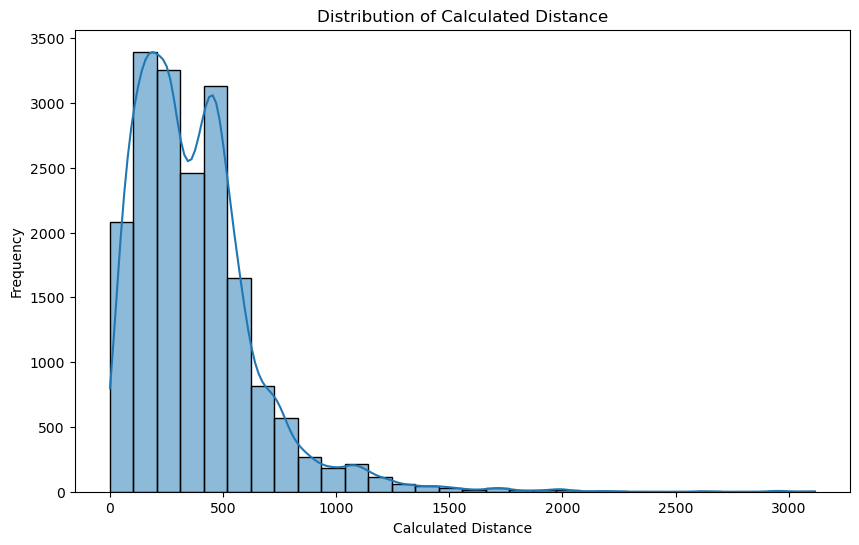

In [517]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(trips['calculated_distance'], bins=30, kde=True)
plt.title('Distribution of Calculated Distance')
plt.xlabel('Calculated Distance')
plt.ylabel('Frequency')
plt.show()

In [518]:
trips['calculated_distance'].describe()


count   18,365.00
mean       377.25
std        275.15
min          0.00
25%        177.80
50%        334.73
75%        496.89
max      3,114.26
Name: calculated_distance, dtype: float64

In [519]:
trips_consignments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18487 entries, 0 to 18486
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   trip_id         18487 non-null  object
 1   consignment_id  18487 non-null  object
dtypes: object(2)
memory usage: 289.0+ KB


In [520]:
trips_consignments.nunique()

trip_id           17931
consignment_id    17068
dtype: int64

In [521]:
# Merge trips_consignments with consignments
consignments_trips_consignments = pd.merge(trips_consignments, consignments, on='consignment_id')
consignments_trips_consignments.head() 

trip_id                        consignment_id  \
0  12502290-06db-4b00-843b-3d3741e633b4  57bb0a44-7e86-42d6-b4a6-b3345fec8946   
1  12631671-fe22-4547-9dba-39ea678d02f4  ada354fe-30be-4f79-9eaf-d419b9ae01db   
2  175b062e-9edc-452f-a846-40eea9871351  2a4ea7a3-19b0-4280-a7c9-759da6a328ad   
3  17598dd1-5037-45e2-b89c-acff6a69bbc9  73d21c7f-0a30-478f-9ece-8b493ce76663   
4  1240a4a4-656a-4cba-9304-c3367c28c5f1  0408d4a0-6ab3-45d8-aede-4b41972d5d08   

                status  consignment_combined  
0  partially_completed                 False  
1  partially_completed                  True  
2  partially_completed                 False  
3  partially_completed                 False  
4            completed                  True

In [522]:
consignments_trips_consignments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trip_id               18400 non-null  object
 1   consignment_id        18400 non-null  object
 2   status                18400 non-null  object
 3   consignment_combined  18400 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 449.3+ KB


In [523]:
consignments_trips_consignments.nunique()

trip_id                 17844
consignment_id          16985
status                      6
consignment_combined        2
dtype: int64

In [524]:
pivot_goods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 270d424a-279d-4d02-93a6-9c4f20007e6e to 8d3ebd86-74ef-42f9-9889-b905b25ab06e
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_goods_count   9593 non-null   int64  
 1   total_goods_weight  9593 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 224.8+ KB


In [525]:
pivot_goods

total_goods_count  total_goods_weight
consignment_id                                                             
270d424a-279d-4d02-93a6-9c4f20007e6e                  2        2,498,891.00
42a60c93-76ec-4d44-925a-1997ebdc1250                  2          262,143.00
c793133c-cf14-45cd-bafd-2121ede73c4d                  2          170,922.00
18689e7e-76b7-4bc2-a19a-3717dfb87b88                 10          153,431.00
58a99ee7-e600-4f6b-a302-7b0f7e12aa69                  5          101,198.00
...                                                 ...                 ...
3e2e0d1e-a17a-46f4-9fb2-9fb13e2d6e0e                  1              796.00
3e5a6475-f352-4454-9351-567715a73cab                  1              796.00
91bfce1d-1a4d-4671-afd9-19fb6a85642a                  1               13.49
08502a40-750a-42a8-879d-8046ab515cf1                  1                2.84
8d3ebd86-74ef-42f9-9889-b905b25ab06e                  1                0.00

[9593 rows x 2 columns]

In [526]:
#Merge trips_consignments with goods table
goods_trips_consignments = pd.merge(consignments_trips_consignments, pivot_goods, on='consignment_id', how='left')
goods_trips_consignments.head()

trip_id                        consignment_id  \
0  12502290-06db-4b00-843b-3d3741e633b4  57bb0a44-7e86-42d6-b4a6-b3345fec8946   
1  12631671-fe22-4547-9dba-39ea678d02f4  ada354fe-30be-4f79-9eaf-d419b9ae01db   
2  175b062e-9edc-452f-a846-40eea9871351  2a4ea7a3-19b0-4280-a7c9-759da6a328ad   
3  17598dd1-5037-45e2-b89c-acff6a69bbc9  73d21c7f-0a30-478f-9ece-8b493ce76663   
4  1240a4a4-656a-4cba-9304-c3367c28c5f1  0408d4a0-6ab3-45d8-aede-4b41972d5d08   

                status  consignment_combined  total_goods_count  \
0  partially_completed                 False               2.00   
1  partially_completed                  True               1.00   
2  partially_completed                 False               2.00   
3  partially_completed                 False               2.00   
4            completed                  True               5.00   

   total_goods_weight  
0           33,685.00  
1           17,701.00  
2           27,904.00  
3           33,784.00  
4           25,411.00

In [527]:
goods_trips_consignments.fillna(0, inplace=True)

In [528]:
goods_trips_consignments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trip_id               18400 non-null  object 
 1   consignment_id        18400 non-null  object 
 2   status                18400 non-null  object 
 3   consignment_combined  18400 non-null  bool   
 4   total_goods_count     18400 non-null  float64
 5   total_goods_weight    18400 non-null  float64
dtypes: bool(1), float64(2), object(3)
memory usage: 736.8+ KB


In [529]:
goods_trips_consignments.nunique()

trip_id                 17844
consignment_id          16985
status                      6
consignment_combined        2
total_goods_count          19
total_goods_weight       3543
dtype: int64

In [530]:
#Pivot goods_trips_consignments so for every trip we can calculate how many it has consignments & the total_goods_weight
# Grouping by 'trip_id' and aggregating
pivot_goods_trips_consignments = goods_trips_consignments.groupby('trip_id').agg(
    count=('consignment_id', 'size'),  # Count how many consignment per trip_id
    total_goods_count=('total_goods_count', 'sum'),  # Sum of 'total_goods_count' column
    total_goods_weight=('total_goods_weight', 'sum')  # Sum of 'total_goods_weight' column
).reset_index()

# Display the pivot table
pivot_goods_trips_consignments

trip_id  count  total_goods_count  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d      1               0.00   
1      00083fdb-5f49-401a-b718-7e4ca8525b88      1               0.00   
2      000e4ee9-8768-42fd-95b2-27bb4904a969      1               2.00   
3      000fa903-a8c7-49fe-801a-9828e9224efd      1               1.00   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3      1               0.00   
...                                     ...    ...                ...   
17839  fff26ade-c7b7-4fe2-af69-85a679b97778      1               0.00   
17840  fff34c8f-b719-440e-853b-88e0bc329f4a      1               0.00   
17841  fff6efd5-1dc7-431e-8b46-fcb657cd7be4      1               2.00   
17842  fff8e1a1-1d11-4d27-ae88-f0b061ed427e      1               0.00   
17843  fffb1581-e0d2-42bf-bc08-3744ed5e45d1      1               2.00   

       total_goods_weight  
0                    0.00  
1                    0.00  
2               31,274.00  
3               12,000.00  
4                    0.00  
...                   ...  
17839                0.00  
17840                0.00  
17841           26,514.00  
17842                0.00  
17843           17,554.00  

[17844 rows x 4 columns]

In [531]:
#Rename & sort the pivot table
pivot_goods_trips_consignments = pivot_goods_trips_consignments.rename(columns = {'count':'consignments_count'})
pivot_goods_trips_consignments = pivot_goods_trips_consignments.sort_values(by='consignments_count',ascending=False)
pivot_goods_trips_consignments

trip_id  consignments_count  \
9658   8a9568a8-33bb-424d-bbf5-061729f96833                   8   
7796   6f1a133a-f97d-40d0-8d36-de9bde2bdf8d                   7   
13967  c8171038-fa21-4807-b783-e306c20c9b28                   7   
16944  f2e34376-7dfb-4336-bc39-08ccf386ce54                   7   
12330  b090f4f2-17c9-4f27-85c3-5430e6743241                   7   
...                                     ...                 ...   
5998   55305829-8d1a-4fc5-a41d-7fa72e846a44                   1   
5999   5545c731-1364-4400-8cd1-75956c98972a                   1   
6000   555289e6-aee2-4e60-9e0e-8c576e54f02f                   1   
6001   5555d0dd-3493-4fc8-af86-ee83f6600858                   1   
17843  fffb1581-e0d2-42bf-bc08-3744ed5e45d1                   1   

       total_goods_count  total_goods_weight  
9658               16.00          233,472.00  
7796               14.00          204,288.00  
13967               7.00           62,328.00  
16944               7.00          134,068.00  
12330               7.00           77,808.00  
...                  ...                 ...  
5998                2.00           32,585.00  
5999                2.00           29,404.00  
6000                0.00                0.00  
6001                0.00                0.00  
17843               2.00           17,554.00  

[17844 rows x 4 columns]

In [532]:
pivot_goods_trips_consignments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17844 entries, 9658 to 17843
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_id             17844 non-null  object 
 1   consignments_count  17844 non-null  int64  
 2   total_goods_count   17844 non-null  float64
 3   total_goods_weight  17844 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 697.0+ KB


In [533]:
#Lookup with trips table, know weight per trip
merged_trips = pd.merge(trips, pivot_goods_trips_consignments, on='trip_id', how='left')
merged_trips.head()

trip_id     status  linked_trip  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3  000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   

               trip_start_date                trip_end_date  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   

   calculated_distance  consignments_count  total_goods_count  \
0               397.54                1.00               0.00   
1               603.60                1.00               0.00   
2                25.30                1.00               2.00   
3               412.53                1.00               1.00   
4             1,067.07                1.00               0.00   

   total_goods_weight  
0                0.00  
1                0.00  
2           31,274.00  
3           12,000.00  
4                0.00

In [534]:
merged_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18365 entries, 0 to 18364
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              18365 non-null  object 
 1   status               18365 non-null  object 
 2   linked_trip          18365 non-null  bool   
 3   trip_start_date      18365 non-null  object 
 4   trip_end_date        18339 non-null  object 
 5   calculated_distance  18365 non-null  float64
 6   consignments_count   17844 non-null  float64
 7   total_goods_count    17844 non-null  float64
 8   total_goods_weight   17844 non-null  float64
dtypes: bool(1), float64(4), object(4)
memory usage: 1.1+ MB


In [535]:
merged_trips.isnull().sum()

trip_id                  0
status                   0
linked_trip              0
trip_start_date          0
trip_end_date           26
calculated_distance      0
consignments_count     521
total_goods_count      521
total_goods_weight     521
dtype: int64

In [536]:
#Check trip with null weight
trips_with_nan = merged_trips[merged_trips['total_goods_weight'].isnull()]
trips_with_nan

trip_id     status  linked_trip  \
30     007aa0a8-bd82-4e60-bf0e-c2d6e73c8b87  cancelled        False   
109    0188c10b-010c-4c9f-b538-946dbba79e3e  completed        False   
177    024286b0-d025-4af7-8c1a-95b59a2e3aa7  completed        False   
199    028d89a4-0189-40fe-878b-a98119c9b725  completed        False   
220    02d289ac-bc95-4ec8-af1f-5261aff5ba41  completed        False   
...                                     ...        ...          ...   
18237  fe187a40-e7dd-4fcb-b111-922fb93b9a90  completed        False   
18279  feafe9b0-1142-4906-9d56-2eb7a8567909  completed        False   
18291  fee6353e-5a9d-4d57-a017-a45167f579ef  completed        False   
18336  ff96b7e5-c4f7-47ee-8153-e6dd6e790383  completed        False   
18341  ff9f13c6-87b4-4cfb-88cd-289ff7d89a61  completed        False   

                   trip_start_date                trip_end_date  \
30     2023-01-05 11:25:20.0000000  2023-01-05 11:28:17.0000000   
109    2023-01-03 15:11:34.0000000  2023-01-04 16:22:18.0000000   
177    2023-01-05 12:06:58.0000000  2023-01-05 19:46:17.0000000   
199    2023-01-06 19:43:15.0000000  2023-01-09 13:18:34.0000000   
220    2023-01-03 09:23:19.0000000  2023-01-04 07:07:11.0000000   
...                            ...                          ...   
18237  2023-01-05 09:12:35.0000000  2023-01-08 17:03:07.0000000   
18279  2023-01-02 15:27:28.0000000  2023-01-04 09:45:08.0000000   
18291  2023-01-09 14:48:33.0000000  2023-01-10 07:01:40.0000000   
18336  2023-02-10 16:14:09.0000000  2023-02-13 15:50:23.0000000   
18341  2023-01-02 14:11:14.0000000  2023-01-03 16:02:37.0000000   

       calculated_distance  consignments_count  total_goods_count  \
30                  846.10                 NaN                NaN   
109                 251.77                 NaN                NaN   
177                 356.45                 NaN                NaN   
199                 172.80                 NaN                NaN   
220                 101.88                 NaN                NaN   
...                    ...                 ...                ...   
18237               904.02                 NaN                NaN   
18279               644.61                 NaN                NaN   
18291               192.88                 NaN                NaN   
18336               516.90                 NaN                NaN   
18341               311.32                 NaN                NaN   

       total_goods_weight  
30                    NaN  
109                   NaN  
177                   NaN  
199                   NaN  
220                   NaN  
...                   ...  
18237                 NaN  
18279                 NaN  
18291                 NaN  
18336                 NaN  
18341                 NaN  

[521 rows x 9 columns]

In [537]:
#Check trips status
status_merged_trips = merged_trips['status'].value_counts()
status_merged_trips

status
completed     16035
cancelled      2304
in_transit       25
accepted          1
Name: count, dtype: int64

In [538]:
#Remove cancelled trips
merged_trips = merged_trips[merged_trips['status'] != 'cancelled']
merged_trips

trip_id     status  linked_trip  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1      00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2      000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3      000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   
...                                     ...        ...          ...   
18358  ffebb253-eebc-4c3d-a654-5429d5815841  completed         True   
18359  fff0370d-fbc4-40e4-aff2-7e45b8267aee  completed        False   
18362  fff6efd5-1dc7-431e-8b46-fcb657cd7be4  completed         True   
18363  fff8e1a1-1d11-4d27-ae88-f0b061ed427e  completed        False   
18364  fffb1581-e0d2-42bf-bc08-3744ed5e45d1  completed        False   

                   trip_start_date                trip_end_date  \
0      2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1      2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2      2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3      2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4      2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   
...                            ...                          ...   
18358  2023-06-19 20:08:31.0000000  2023-06-20 17:49:37.0000000   
18359  2023-02-07 16:08:54.0000000  2023-02-08 16:57:48.0000000   
18362  2023-07-03 11:48:21.0000000  2023-07-04 09:19:51.0000000   
18363  2023-08-14 08:59:53.0000000  2023-08-15 07:57:33.0000000   
18364  2023-08-14 05:43:13.0000000  2023-08-15 05:56:56.0000000   

       calculated_distance  consignments_count  total_goods_count  \
0                   397.54                1.00               0.00   
1                   603.60                1.00               0.00   
2                    25.30                1.00               2.00   
3                   412.53                1.00               1.00   
4                 1,067.07                1.00               0.00   
...                    ...                 ...                ...   
18358               397.60                1.00               0.00   
18359               363.08                1.00               0.00   
18362               355.12                1.00               2.00   
18363               286.62                1.00               0.00   
18364               477.86                1.00               2.00   

       total_goods_weight  
0                    0.00  
1                    0.00  
2               31,274.00  
3               12,000.00  
4                    0.00  
...                   ...  
18358                0.00  
18359                0.00  
18362           26,514.00  
18363                0.00  
18364           17,554.00  

[16061 rows x 9 columns]

In [539]:
merged_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16061 entries, 0 to 18364
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              16061 non-null  object 
 1   status               16061 non-null  object 
 2   linked_trip          16061 non-null  bool   
 3   trip_start_date      16061 non-null  object 
 4   trip_end_date        16035 non-null  object 
 5   calculated_distance  16061 non-null  float64
 6   consignments_count   15660 non-null  float64
 7   total_goods_count    15660 non-null  float64
 8   total_goods_weight   15660 non-null  float64
dtypes: bool(1), float64(4), object(4)
memory usage: 1.1+ MB


In [540]:
#Check trip with null weight
trips_with_nan = merged_trips[merged_trips['total_goods_weight'].isnull()]
trips_with_nan

trip_id     status  linked_trip  \
109    0188c10b-010c-4c9f-b538-946dbba79e3e  completed        False   
177    024286b0-d025-4af7-8c1a-95b59a2e3aa7  completed        False   
199    028d89a4-0189-40fe-878b-a98119c9b725  completed        False   
220    02d289ac-bc95-4ec8-af1f-5261aff5ba41  completed        False   
276    039594be-124a-4d36-937e-6ebc8818494c  completed        False   
...                                     ...        ...          ...   
18237  fe187a40-e7dd-4fcb-b111-922fb93b9a90  completed        False   
18279  feafe9b0-1142-4906-9d56-2eb7a8567909  completed        False   
18291  fee6353e-5a9d-4d57-a017-a45167f579ef  completed        False   
18336  ff96b7e5-c4f7-47ee-8153-e6dd6e790383  completed        False   
18341  ff9f13c6-87b4-4cfb-88cd-289ff7d89a61  completed        False   

                   trip_start_date                trip_end_date  \
109    2023-01-03 15:11:34.0000000  2023-01-04 16:22:18.0000000   
177    2023-01-05 12:06:58.0000000  2023-01-05 19:46:17.0000000   
199    2023-01-06 19:43:15.0000000  2023-01-09 13:18:34.0000000   
220    2023-01-03 09:23:19.0000000  2023-01-04 07:07:11.0000000   
276    2023-01-04 13:11:48.0000000  2023-01-05 09:04:58.0000000   
...                            ...                          ...   
18237  2023-01-05 09:12:35.0000000  2023-01-08 17:03:07.0000000   
18279  2023-01-02 15:27:28.0000000  2023-01-04 09:45:08.0000000   
18291  2023-01-09 14:48:33.0000000  2023-01-10 07:01:40.0000000   
18336  2023-02-10 16:14:09.0000000  2023-02-13 15:50:23.0000000   
18341  2023-01-02 14:11:14.0000000  2023-01-03 16:02:37.0000000   

       calculated_distance  consignments_count  total_goods_count  \
109                 251.77                 NaN                NaN   
177                 356.45                 NaN                NaN   
199                 172.80                 NaN                NaN   
220                 101.88                 NaN                NaN   
276                   2.39                 NaN                NaN   
...                    ...                 ...                ...   
18237               904.02                 NaN                NaN   
18279               644.61                 NaN                NaN   
18291               192.88                 NaN                NaN   
18336               516.90                 NaN                NaN   
18341               311.32                 NaN                NaN   

       total_goods_weight  
109                   NaN  
177                   NaN  
199                   NaN  
220                   NaN  
276                   NaN  
...                   ...  
18237                 NaN  
18279                 NaN  
18291                 NaN  
18336                 NaN  
18341                 NaN  

[401 rows x 9 columns]

In [541]:
# Impute trips with null consignment and goods with value 0, as it assumes that the truck moving without any load
merged_trips.fillna(0, inplace=True)
merged_trips.head()

trip_id     status  linked_trip  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3  000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   

               trip_start_date                trip_end_date  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   

   calculated_distance  consignments_count  total_goods_count  \
0               397.54                1.00               0.00   
1               603.60                1.00               0.00   
2                25.30                1.00               2.00   
3               412.53                1.00               1.00   
4             1,067.07                1.00               0.00   

   total_goods_weight  
0                0.00  
1                0.00  
2           31,274.00  
3           12,000.00  
4                0.00

In [542]:
merged_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16061 entries, 0 to 18364
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              16061 non-null  object 
 1   status               16061 non-null  object 
 2   linked_trip          16061 non-null  bool   
 3   trip_start_date      16061 non-null  object 
 4   trip_end_date        16061 non-null  object 
 5   calculated_distance  16061 non-null  float64
 6   consignments_count   16061 non-null  float64
 7   total_goods_count    16061 non-null  float64
 8   total_goods_weight   16061 non-null  float64
dtypes: bool(1), float64(4), object(4)
memory usage: 1.1+ MB


## Clean Vehicle Table

In [543]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vehicle_id            99 non-null     object 
 1   vehicle_name          99 non-null     object 
 2   emission_standard     99 non-null     object 
 3   fuel_type             98 non-null     object 
 4   vehicle_empty_weight  64 non-null     float64
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [544]:
# Check Vehicle Name
unique_vehicles = vehicles['vehicle_name'].unique()
print(unique_vehicles)

['PO 9HL65' 'WPR 7139P' 'PO 9HL75' 'PNT 87913' 'WPR 7149P' 'PO 9HL74'
 'PNT 90693' 'WPR 7135P' 'PNT 87901' 'WPR 7137P' 'WGM 92378' 'WGM 50823'
 'WGM 51750' 'PNT 87904' 'PNT 87902' 'WGM 5206F' 'WGM 92377' 'PO 9HL62'
 'PNT 87906' 'PNT 87911' 'WGM 92380' 'WPR 7134P' 'PNT 90696' 'PNT 87907'
 'WGM 50824' 'FG 0382N' 'FG 0383N' 'PNT 90694' 'PNT 87910' 'PO 9HL68'
 'WPR 7148P' 'WGM 51747' 'WGM 51746' 'FG 0381N' 'PNT 90698' 'WPR 7129P'
 'WPR 7136P' 'WGM 5205F' 'PNT 87918' 'FG 0379N' 'PNT 87903' 'WPR 7147P'
 'WPR 7138P' 'WGM 51749' 'WPR 7130P' 'PNT 87908' 'PNT 87919' 'WGM 50821'
 'PO 9HL72' 'FG 0378N' 'PNT 87920' 'WPR 7142P' 'WPR 7133P' 'FG 0376N'
 'PNT 90692' 'PNT 87916' 'WGM 5207F' 'PNT 87912' 'FG 0380N' 'DEMO'
 'PNT 90697' 'WGM 51748' 'PNT 90695' 'WPR 7145P' 'WPR 7131P' 'WGM 92379'
 'PNT 87917' 'WPR 7140P' 'FG 0384N' 'FG 0377N' 'PNT 87909' 'WPR 7132P'
 'WPR 7150P' 'PO 9HL64' 'FG 0385N' 'ZZ-DEMOBOX' 'WGM 50825' 'PO 9HL67'
 'PO 9HL73' 'WGM 50822' 'PO 9HL71' 'WPR 7146P' 'WPR 7144P' 'WPR 7143P'
 '

In [545]:
#Remove 'DEMO' and 'Dummy' data

vehicles = vehicles[~vehicles['vehicle_name'].isin(['DEMO', 'Dummy5', 'Dummy4', 'Dummy3','Dummy2', 'Dummy1', 'Dummy22','ZZ-DEMOBOX'])]
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 92
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vehicle_id            91 non-null     object 
 1   vehicle_name          91 non-null     object 
 2   emission_standard     91 non-null     object 
 3   fuel_type             90 non-null     object 
 4   vehicle_empty_weight  64 non-null     float64
dtypes: float64(1), object(4)
memory usage: 4.3+ KB


In [546]:
# Filter rows where 'fuel_type' is NaN
null_fuel_type = vehicles[vehicles['fuel_type'].isna()]
null_fuel_type

vehicle_id vehicle_name emission_standard  \
53  b355ab04-3f0f-4fe9-9cab-bb7408da1adf     FG 0376N             euro1   

   fuel_type  vehicle_empty_weight  
53       NaN                   NaN

In [547]:
#Check fuel_type name
status_fuel_type = vehicles['fuel_type'].value_counts()
status_fuel_type

fuel_type
liquidGas    59
diesel       31
Name: count, dtype: int64

In [548]:
#euro1 is old diesel emission standard, change the fuel type to diesel
vehicles['fuel_type'] = vehicles['fuel_type'].fillna('diesel')  # Here we are filling NaN with 0
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 92
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vehicle_id            91 non-null     object 
 1   vehicle_name          91 non-null     object 
 2   emission_standard     91 non-null     object 
 3   fuel_type             91 non-null     object 
 4   vehicle_empty_weight  64 non-null     float64
dtypes: float64(1), object(4)
memory usage: 4.3+ KB


In [549]:
missing_values = vehicles.isnull().sum()
print(missing_values)

vehicle_id               0
vehicle_name             0
emission_standard        0
fuel_type                0
vehicle_empty_weight    27
dtype: int64


In [550]:
vehicle_weight = vehicles['vehicle_empty_weight'].value_counts()
vehicle_weight

vehicle_empty_weight
8,157.00    28
7,528.00    17
8,013.00    15
8,325.00     3
6,500.00     1
Name: count, dtype: int64

In [551]:
vehicles.head()

vehicle_id vehicle_name emission_standard  \
0  f75daff4-19b5-412f-960f-d6bc1b39d3c9     PO 9HL65             euro6   
1  f09db318-549e-4d51-a711-5c0a341a69a6    WPR 7139P             euro6   
2  bd4e7a7c-bedc-4be0-89d1-24354215c7e4     PO 9HL75             euro6   
3  ca4f57d7-7afb-49de-a2b8-24887dcb246f    PNT 87913             euro6   
4  b2493d27-e3a1-4f59-9b56-656c322e303a    WPR 7149P             euro6   

   fuel_type  vehicle_empty_weight  
0  liquidGas              8,013.00  
1     diesel                   NaN  
2  liquidGas              8,013.00  
3  liquidGas              8,157.00  
4     diesel                   NaN

Descriptive statistics before imputation:
count      64.00
mean    7,938.16
std       328.59
min     6,500.00
25%     7,528.00
50%     8,013.00
75%     8,157.00
max     8,325.00
Name: vehicle_empty_weight, dtype: float64


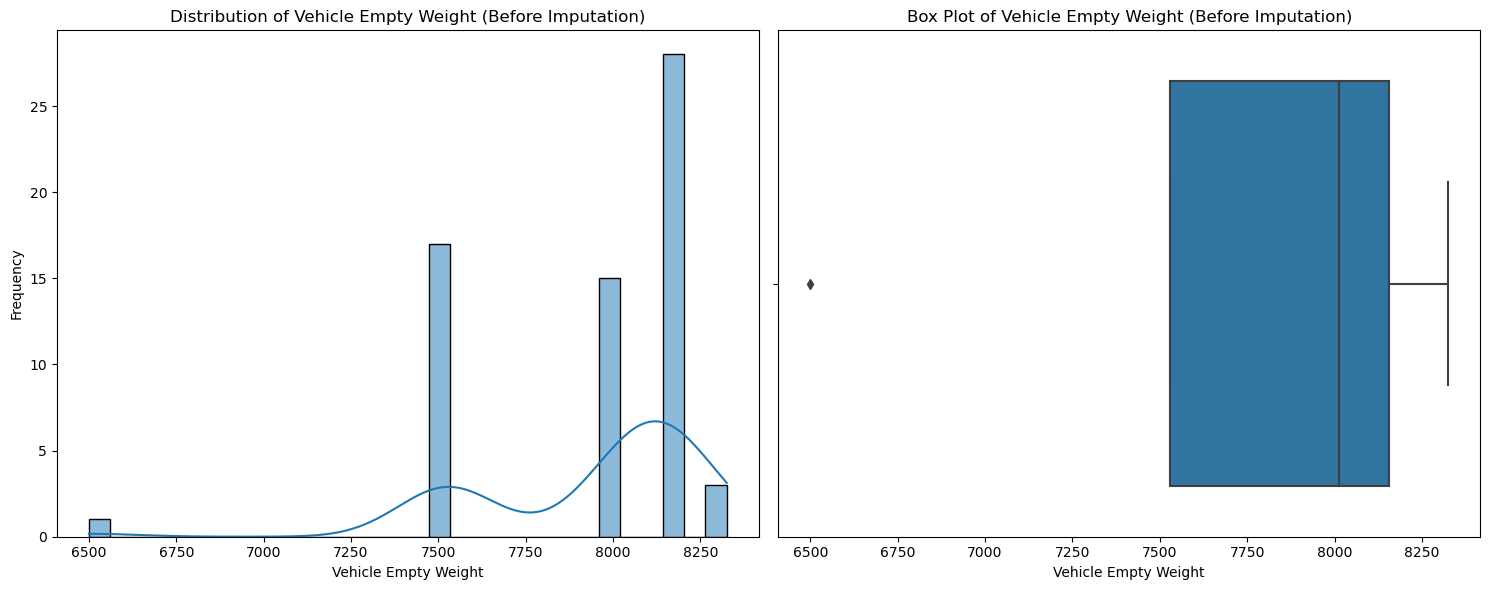

In [552]:
# Descriptive statistics before imputation
desc_before_imputation = vehicles['vehicle_empty_weight'].describe()
print('Descriptive statistics before imputation:')
print(desc_before_imputation)

# Visualize the distribution before imputation
plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(vehicles['vehicle_empty_weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Vehicle Empty Weight (Before Imputation)')
plt.xlabel('Vehicle Empty Weight')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=vehicles['vehicle_empty_weight'].dropna())
plt.title('Box Plot of Vehicle Empty Weight (Before Imputation)')
plt.xlabel('Vehicle Empty Weight')

plt.tight_layout()
plt.show()

In [553]:
#Impute vehicle_empty_weight with average weight
mean_weight = vehicles['vehicle_empty_weight'].mean()

# Display the mean weight
print(f'mean weight {mean_weight}')

# Impute missing values in 'price' column with the mean price
vehicles['vehicle_empty_weight'] = vehicles['vehicle_empty_weight'].fillna(mean_weight)
vehicles.head()

mean weight 7938.15625


vehicle_id vehicle_name emission_standard  \
0  f75daff4-19b5-412f-960f-d6bc1b39d3c9     PO 9HL65             euro6   
1  f09db318-549e-4d51-a711-5c0a341a69a6    WPR 7139P             euro6   
2  bd4e7a7c-bedc-4be0-89d1-24354215c7e4     PO 9HL75             euro6   
3  ca4f57d7-7afb-49de-a2b8-24887dcb246f    PNT 87913             euro6   
4  b2493d27-e3a1-4f59-9b56-656c322e303a    WPR 7149P             euro6   

   fuel_type  vehicle_empty_weight  
0  liquidGas              8,013.00  
1     diesel              7,938.16  
2  liquidGas              8,013.00  
3  liquidGas              8,157.00  
4     diesel              7,938.16

In [554]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 92
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vehicle_id            91 non-null     object 
 1   vehicle_name          91 non-null     object 
 2   emission_standard     91 non-null     object 
 3   fuel_type             91 non-null     object 
 4   vehicle_empty_weight  91 non-null     float64
dtypes: float64(1), object(4)
memory usage: 4.3+ KB


Descriptive statistics after imputation:
count      91.00
mean    7,938.16
std       274.92
min     6,500.00
25%     7,938.16
50%     8,013.00
75%     8,157.00
max     8,325.00
Name: vehicle_empty_weight, dtype: float64


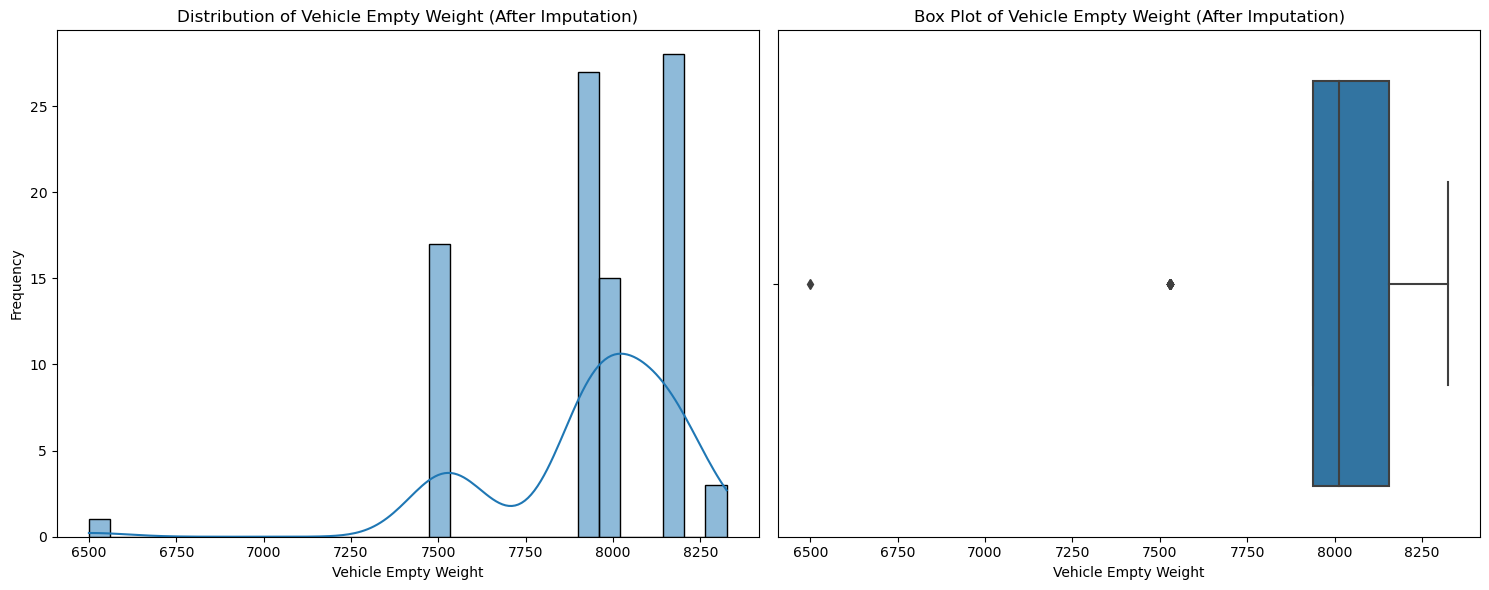

In [555]:
# Descriptive statistics after imputation
desc_after_imputation = vehicles['vehicle_empty_weight'].describe()
print('Descriptive statistics after imputation:')
print(desc_after_imputation)

# Visualize the distribution after imputation
plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(vehicles['vehicle_empty_weight'], bins=30, kde=True)
plt.title('Distribution of Vehicle Empty Weight (After Imputation)')
plt.xlabel('Vehicle Empty Weight')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=vehicles['vehicle_empty_weight'])
plt.title('Box Plot of Vehicle Empty Weight (After Imputation)')
plt.xlabel('Vehicle Empty Weight')

plt.tight_layout()
plt.show()

In [556]:
# Combine the results into a single DataFrame for comparison
desc_comparison = pd.DataFrame({
    'Before Imputation': desc_before_imputation,
    'After Imputation': desc_after_imputation
})

# Set display option to avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format

print('Comparison of Descriptive Statistics:')
desc_comparison

Comparison of Descriptive Statistics:


Before Imputation  After Imputation
count              64.00             91.00
mean            7,938.16          7,938.16
std               328.59            274.92
min             6,500.00          6,500.00
25%             7,528.00          7,938.16
50%             8,013.00          8,013.00
75%             8,157.00          8,157.00
max             8,325.00          8,325.00

## The Final Merges

In [557]:
trips_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18365 entries, 0 to 18364
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trip_id     18365 non-null  object
 1   vehicle_id  18365 non-null  object
dtypes: object(2)
memory usage: 287.1+ KB


In [558]:
trips_vehicles.nunique()

trip_id       18365
vehicle_id       90
dtype: int64

In [559]:
#Merge trips_vehicles with vehicles

In [560]:
merged_vehicles = pd.merge(trips_vehicles, vehicles, on='vehicle_id')
merged_vehicles.head()

trip_id                            vehicle_id  \
0  12502290-06db-4b00-843b-3d3741e633b4  86dc70fe-b754-46b1-ab01-6f5ceee92f92   
1  0ad8516e-e133-40d3-bd70-0e8d4f8f5b4f  86dc70fe-b754-46b1-ab01-6f5ceee92f92   
2  11e335d1-c1b6-4130-8c2b-dd3692abd7fa  86dc70fe-b754-46b1-ab01-6f5ceee92f92   
3  05850d57-24f7-4bd5-883e-f7b09d2103b3  86dc70fe-b754-46b1-ab01-6f5ceee92f92   
4  2efb698d-2a1e-4f9d-8d54-4977d80f86c2  86dc70fe-b754-46b1-ab01-6f5ceee92f92   

  vehicle_name emission_standard  fuel_type  vehicle_empty_weight  
0     PO 9HL72             euro6  liquidGas              8,013.00  
1     PO 9HL72             euro6  liquidGas              8,013.00  
2     PO 9HL72             euro6  liquidGas              8,013.00  
3     PO 9HL72             euro6  liquidGas              8,013.00  
4     PO 9HL72             euro6  liquidGas              8,013.00

In [561]:
merged_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18339 entries, 0 to 18338
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trip_id               18339 non-null  object 
 1   vehicle_id            18339 non-null  object 
 2   vehicle_name          18339 non-null  object 
 3   emission_standard     18339 non-null  object 
 4   fuel_type             18339 non-null  object 
 5   vehicle_empty_weight  18339 non-null  float64
dtypes: float64(1), object(5)
memory usage: 859.8+ KB


In [562]:
#Final merge between trips & vehicle
maindata = pd.merge(merged_trips, merged_vehicles, on='trip_id')
maindata.head()

trip_id     status  linked_trip  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3  000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   

               trip_start_date                trip_end_date  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   

   calculated_distance  consignments_count  total_goods_count  \
0               397.54                1.00               0.00   
1               603.60                1.00               0.00   
2                25.30                1.00               2.00   
3               412.53                1.00               1.00   
4             1,067.07                1.00               0.00   

   total_goods_weight                            vehicle_id vehicle_name  \
0                0.00  55573865-5602-4722-9836-795ed46e9b55    WPR 7129P   
1                0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219    WGM 51747   
2           31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92     PO 9HL72   
3           12,000.00  a64e303f-690a-474d-af32-23c22a95fa82    PNT 87912   
4                0.00  7685cb7a-0c23-4731-8feb-34492ec20a18    WGM 92377   

  emission_standard  fuel_type  vehicle_empty_weight  
0             euro6     diesel              7,528.00  
1             euro6  liquidGas              8,013.00  
2             euro6  liquidGas              8,013.00  
3             euro6  liquidGas              8,157.00  
4             euro6     diesel              8,325.00

In [563]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16054 entries, 0 to 16053
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trip_id               16054 non-null  object 
 1   status                16054 non-null  object 
 2   linked_trip           16054 non-null  bool   
 3   trip_start_date       16054 non-null  object 
 4   trip_end_date         16054 non-null  object 
 5   calculated_distance   16054 non-null  float64
 6   consignments_count    16054 non-null  float64
 7   total_goods_count     16054 non-null  float64
 8   total_goods_weight    16054 non-null  float64
 9   vehicle_id            16054 non-null  object 
 10  vehicle_name          16054 non-null  object 
 11  emission_standard     16054 non-null  object 
 12  fuel_type             16054 non-null  object 
 13  vehicle_empty_weight  16054 non-null  float64
dtypes: bool(1), float64(5), object(8)
memory usage: 1.6+ MB


In [564]:
maindata.nunique()

trip_id                 16054
status                      3
linked_trip                 2
trip_start_date         16047
trip_end_date           16021
calculated_distance     11887
consignments_count          9
total_goods_count          19
total_goods_weight       3413
vehicle_id                 87
vehicle_name               87
emission_standard           2
fuel_type                   2
vehicle_empty_weight        6
dtype: int64

In [565]:
#By this, we already have unique non-cancelled 16054 trips
#With their related consignment, vehicles, distance, goods weight, and empty weight
maindata.describe()

calculated_distance  consignments_count  total_goods_count  \
count            16,054.00           16,054.00          16,054.00   
mean                380.41                1.01               1.08   
std                 275.74                0.33               1.28   
min                   0.00                0.00               0.00   
25%                 180.95                1.00               0.00   
50%                 341.23                1.00               1.00   
75%                 499.45                1.00               2.00   
max               3,114.26                8.00              38.00   

       total_goods_weight  vehicle_empty_weight  
count           16,054.00             16,054.00  
mean            14,525.72              7,936.22  
std             25,612.37                283.40  
min                  0.00              6,500.00  
25%                  0.00              7,938.16  
50%              8,904.00              8,013.00  
75%             29,092.00              8,157.00  
max          2,498,891.00              8,325.00

In [566]:
unique_values = maindata.nunique()
print(unique_values)

trip_id                 16054
status                      3
linked_trip                 2
trip_start_date         16047
trip_end_date           16021
calculated_distance     11887
consignments_count          9
total_goods_count          19
total_goods_weight       3413
vehicle_id                 87
vehicle_name               87
emission_standard           2
fuel_type                   2
vehicle_empty_weight        6
dtype: int64


In [567]:
# check the amount of missing values
missing_values = maindata.isnull().sum()
print(missing_values)

trip_id                 0
status                  0
linked_trip             0
trip_start_date         0
trip_end_date           0
calculated_distance     0
consignments_count      0
total_goods_count       0
total_goods_weight      0
vehicle_id              0
vehicle_name            0
emission_standard       0
fuel_type               0
vehicle_empty_weight    0
dtype: int64


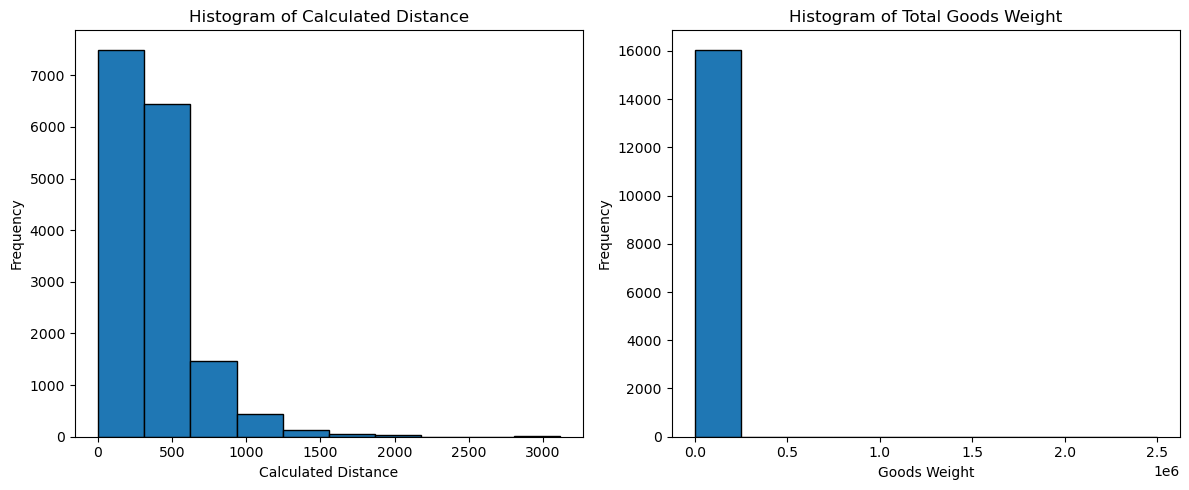

In [568]:
import matplotlib.pyplot as plt
# Plotting the histogram for 'calculated_distance'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(maindata['calculated_distance'], edgecolor='black')
plt.title('Histogram of Calculated Distance')
plt.xlabel('Calculated Distance')
plt.ylabel('Frequency')

# Plotting the histogram for 'goods_weight'
plt.subplot(1, 2, 2)
plt.hist(maindata['total_goods_weight'], edgecolor='black')
plt.title('Histogram of Total Goods Weight')
plt.xlabel('Goods Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [569]:
maindata.describe()

calculated_distance  consignments_count  total_goods_count  \
count            16,054.00           16,054.00          16,054.00   
mean                380.41                1.01               1.08   
std                 275.74                0.33               1.28   
min                   0.00                0.00               0.00   
25%                 180.95                1.00               0.00   
50%                 341.23                1.00               1.00   
75%                 499.45                1.00               2.00   
max               3,114.26                8.00              38.00   

       total_goods_weight  vehicle_empty_weight  
count           16,054.00             16,054.00  
mean            14,525.72              7,936.22  
std             25,612.37                283.40  
min                  0.00              6,500.00  
25%                  0.00              7,938.16  
50%              8,904.00              8,013.00  
75%             29,092.00              8,157.00  
max          2,498,891.00              8,325.00

In [570]:
sorted_df = maindata.sort_values(by='total_goods_weight', ascending=False)
sorted_df.head(10)

trip_id     status  linked_trip  \
4351   452c1e50-cb43-450c-a98a-06245ae28aff  completed        False   
13516  d70b8f19-0f8c-424c-a8eb-2582f9436d4e  completed        False   
8688   8a9568a8-33bb-424d-bbf5-061729f96833  completed         True   
7013   6f1a133a-f97d-40d0-8d36-de9bde2bdf8d  completed         True   
10128  a19688c7-7447-402b-a30e-a9455651e9b7  completed         True   
14933  eda9238b-0040-423e-ba19-0d1d9177024c  completed         True   
7260   72caefc3-e2ac-49e6-aa80-97620b930d5d  completed         True   
15789  fb8a1158-d312-4824-90d9-9e0a9ff7acfd  completed         True   
13146  d182ee49-88f8-4721-9542-15e3b090ccd7  completed         True   
9006   8fb9af85-5409-4d9a-b935-54fa8e336df2  completed        False   

                   trip_start_date                trip_end_date  \
4351   2023-03-17 13:03:47.0000000  2023-03-20 11:44:50.0000000   
13516  2023-03-06 17:47:02.0000000  2023-03-07 12:12:04.0000000   
8688   2023-07-24 09:48:56.0000000  2023-07-25 16:32:06.0000000   
7013   2023-07-25 15:58:59.0000000  2023-07-26 16:00:05.0000000   
10128  2023-07-21 21:09:26.0000000  2023-07-24 12:39:20.0000000   
14933  2023-07-22 07:43:36.0000000  2023-07-24 15:12:41.0000000   
7260   2023-07-25 16:06:26.0000000  2023-07-26 16:01:09.0000000   
15789  2023-07-22 12:30:34.0000000  2023-07-24 13:05:36.0000000   
13146  2023-04-20 06:12:11.0000000  2023-04-20 12:44:18.0000000   
9006   2023-02-09 20:38:53.0000000  2023-02-10 12:58:19.0000000   

       calculated_distance  consignments_count  total_goods_count  \
4351                560.88                1.00               2.00   
13516               229.93                1.00               2.00   
8688                392.64                8.00              16.00   
7013                386.55                7.00              14.00   
10128               612.08                6.00              12.00   
14933               392.53                6.00              12.00   
7260                386.55                6.00              12.00   
15789               392.64                6.00              12.00   
13146               120.19                1.00               2.00   
9006                401.11                1.00              10.00   

       total_goods_weight                            vehicle_id vehicle_name  \
4351         2,498,891.00  21a05fbf-11ed-4ca9-b915-9f72f21dedc5    PNT 87905   
13516          262,143.00  b027ccfb-2fd4-46d0-9366-4f63e1ded5ec    WPR 7135P   
8688           233,472.00  975f42c8-f46a-4339-b0f6-27041ca62a8a     FG 0385N   
7013           204,288.00  9e3395b0-a9fd-4dcd-933a-97d1f4bb09f8     FG 0384N   
10128          175,104.00  54ae1d51-da9c-46ae-bd32-05021898c265    PNT 87904   
14933          175,104.00  9e3395b0-a9fd-4dcd-933a-97d1f4bb09f8     FG 0384N   
7260           175,104.00  54ae1d51-da9c-46ae-bd32-05021898c265    PNT 87904   
15789          175,104.00  520380da-cf11-4ed7-bd8d-54fac5612c27    WPR 7146P   
13146          170,922.00  94bf002e-3086-4a0d-992e-b9ce1e24bd54    WGM 50825   
9006           153,431.00  b2493d27-e3a1-4f59-9b56-656c322e303a    WPR 7149P   

      emission_standard  fuel_type  vehicle_empty_weight  
4351              euro6  liquidGas              8,157.00  
13516             euro6     diesel              7,938.16  
8688              euro6  liquidGas              7,938.16  
7013              euro6  liquidGas              8,157.00  
10128             euro6  liquidGas              7,938.16  
14933             euro6  liquidGas              8,157.00  
7260              euro6  liquidGas              7,938.16  
15789             euro6     diesel              7,938.16  
13146             euro6  liquidGas              8,013.00  
9006              euro6     diesel              7,938.16

In [571]:
#Based on International Transport Forum (https://www.itf-oecd.org/permissible-maximum-weights-lorries-europe)
#Maximum load per truck is 50 ton = 50,000 kg
#There is some unrealistically high load above that limit, assumption there is an error during input data
#Impute the anomaly data until it become lower than 50 ton by divide it by 10
maindata_weight_before = maindata[maindata['total_goods_weight'] > 50000].shape[0]
maindata.loc[maindata['total_goods_weight'] > 50000, 'total_goods_weight'] /= 10

# Count the number of rows where 'price' is still greater than 50 ton after imputation
maindata_weight_after = maindata[maindata['total_goods_weight'] > 50000].shape[0]

# Number of rows affected by the imputation process
rows_affected = maindata_weight_before - maindata_weight_after

# Display the number of rows affected
print(f"\nNumber of rows affected by the imputation process: {rows_affected}")


Number of rows affected by the imputation process: 277


In [572]:
sorted_df = maindata.sort_values(by='total_goods_weight', ascending=False)
sorted_df.head(10)

trip_id     status  linked_trip  \
4351   452c1e50-cb43-450c-a98a-06245ae28aff  completed        False   
13335  d4714992-69c6-44c6-a015-982247d4f3c6  completed        False   
5731   5adb8fd5-5506-49cb-adfb-6d30449c381d  completed         True   
2578   28c1d6be-959d-4c49-8c93-61d614bf1bd1  completed         True   
8081   805c64ec-c541-406c-bb55-a8c10152e364  completed         True   
10824  aca40191-a4bc-4365-b796-43c0cb407d73  completed        False   
6660   69d5499d-afb8-410b-b332-e657dfd77095  completed        False   
12867  cd0ce3e1-e859-4b17-af91-8b6c9df11cb6  completed        False   
6599   68baa4fe-7e2d-4583-8454-176bc80b734c  completed        False   
11690  b9ea6680-5189-4e95-8ef3-936a41ab5251  completed        False   

                   trip_start_date                trip_end_date  \
4351   2023-03-17 13:03:47.0000000  2023-03-20 11:44:50.0000000   
13335  2023-02-02 16:45:14.0000000  2023-02-03 13:21:12.0000000   
5731   2023-09-26 11:05:37.0000000  2023-09-27 12:43:50.0000000   
2578   2023-03-24 15:28:32.0000000  2023-03-27 17:29:44.0000000   
8081   2023-05-02 18:09:24.0000000  2023-05-04 08:50:22.0000000   
10824  2023-02-28 19:33:44.0000000  2023-03-02 06:47:28.0000000   
6660   2023-03-08 16:31:34.0000000  2023-03-09 16:05:26.0000000   
12867  2023-02-06 10:03:25.0000000  2023-02-07 16:21:03.0000000   
6599   2023-02-20 18:27:03.0000000  2023-02-22 17:28:45.0000000   
11690  2023-01-19 16:18:06.0000000  2023-01-24 07:12:24.0000000   

       calculated_distance  consignments_count  total_goods_count  \
4351                560.88                1.00               2.00   
13335               509.14                1.00               3.00   
5731                741.46                2.00               2.00   
2578                480.51                1.00               2.00   
8081                384.36                1.00               2.00   
10824               427.82                1.00               3.00   
6660                240.16                1.00               2.00   
12867             2,363.55                1.00               3.00   
6599                438.89                1.00               3.00   
11690               948.14                1.00               3.00   

       total_goods_weight                            vehicle_id vehicle_name  \
4351           249,889.10  21a05fbf-11ed-4ca9-b915-9f72f21dedc5    PNT 87905   
13335           49,862.00  4399eeb3-ecf3-4f73-847c-04d60d61a128    WGM 51748   
5731            49,754.00  15c6ef8a-0d39-4dc0-9136-0e20f2f682a3    WPR 7150P   
2578            49,675.00  eb667bb7-b1ad-4953-bb9d-3260859e007a    WGM 50821   
8081            49,643.00  12bf885d-d49d-4ebf-ad9e-1022cb538219    WGM 51747   
10824           49,609.70  21a05fbf-11ed-4ca9-b915-9f72f21dedc5    PNT 87905   
6660            49,578.00  eb667bb7-b1ad-4953-bb9d-3260859e007a    WGM 50821   
12867           49,404.00  0493ec7b-5625-46f7-a239-6a3f2c831f5e    WGM 51749   
6599            49,354.75  f75daff4-19b5-412f-960f-d6bc1b39d3c9     PO 9HL65   
11690           49,331.19  784a59e4-9304-48cb-9371-a0ac65390131    WGM 92380   

      emission_standard  fuel_type  vehicle_empty_weight  
4351              euro6  liquidGas              8,157.00  
13335             euro6  liquidGas              8,013.00  
5731              euro6     diesel              7,528.00  
2578              euro6  liquidGas              8,013.00  
8081              euro6  liquidGas              8,013.00  
10824             euro6  liquidGas              8,157.00  
6660              euro6  liquidGas              8,013.00  
12867             euro6  liquidGas              8,013.00  
6599              euro6  liquidGas              8,013.00  
11690             euro6     diesel              8,325.00

In [573]:
#Run again because there's still value above 50 ton
#Impute the anomaly data until it become lower than 50 ton by divide it by 10
maindata_weight_before = maindata[maindata['total_goods_weight'] > 50000].shape[0]
maindata.loc[maindata['total_goods_weight'] > 50000, 'total_goods_weight'] /= 10

# Count the number of rows where 'price' is still greater than 50 ton after imputation
maindata_weight_after = maindata[maindata['total_goods_weight'] > 50000].shape[0]

# Number of rows affected by the imputation process
rows_affected = maindata_weight_before - maindata_weight_after

# Display the number of rows affected
print(f"\nNumber of rows affected by the imputation process: {rows_affected}")


Number of rows affected by the imputation process: 1


In [574]:
maindata.describe()

calculated_distance  consignments_count  total_goods_count  \
count            16,054.00           16,054.00          16,054.00   
mean                380.41                1.01               1.08   
std                 275.74                0.33               1.28   
min                   0.00                0.00               0.00   
25%                 180.95                1.00               0.00   
50%                 341.23                1.00               1.00   
75%                 499.45                1.00               2.00   
max               3,114.26                8.00              38.00   

       total_goods_weight  vehicle_empty_weight  
count           16,054.00             16,054.00  
mean            13,300.19              7,936.22  
std             14,312.38                283.40  
min                  0.00              6,500.00  
25%                  0.00              7,938.16  
50%              8,904.00              8,013.00  
75%             28,870.25              8,157.00  
max             49,862.00              8,325.00

In [575]:
#Add New Column total_weight as sum of total_goods_weight & vehicle_empty_weight
maindata['total_weight'] = maindata['total_goods_weight'] + maindata['vehicle_empty_weight']
maindata

trip_id     status  linked_trip  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1      00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2      000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3      000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   
...                                     ...        ...          ...   
16049  ffebb253-eebc-4c3d-a654-5429d5815841  completed         True   
16050  fff0370d-fbc4-40e4-aff2-7e45b8267aee  completed        False   
16051  fff6efd5-1dc7-431e-8b46-fcb657cd7be4  completed         True   
16052  fff8e1a1-1d11-4d27-ae88-f0b061ed427e  completed        False   
16053  fffb1581-e0d2-42bf-bc08-3744ed5e45d1  completed        False   

                   trip_start_date                trip_end_date  \
0      2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1      2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2      2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3      2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4      2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   
...                            ...                          ...   
16049  2023-06-19 20:08:31.0000000  2023-06-20 17:49:37.0000000   
16050  2023-02-07 16:08:54.0000000  2023-02-08 16:57:48.0000000   
16051  2023-07-03 11:48:21.0000000  2023-07-04 09:19:51.0000000   
16052  2023-08-14 08:59:53.0000000  2023-08-15 07:57:33.0000000   
16053  2023-08-14 05:43:13.0000000  2023-08-15 05:56:56.0000000   

       calculated_distance  consignments_count  total_goods_count  \
0                   397.54                1.00               0.00   
1                   603.60                1.00               0.00   
2                    25.30                1.00               2.00   
3                   412.53                1.00               1.00   
4                 1,067.07                1.00               0.00   
...                    ...                 ...                ...   
16049               397.60                1.00               0.00   
16050               363.08                1.00               0.00   
16051               355.12                1.00               2.00   
16052               286.62                1.00               0.00   
16053               477.86                1.00               2.00   

       total_goods_weight                            vehicle_id vehicle_name  \
0                    0.00  55573865-5602-4722-9836-795ed46e9b55    WPR 7129P   
1                    0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219    WGM 51747   
2               31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92     PO 9HL72   
3               12,000.00  a64e303f-690a-474d-af32-23c22a95fa82    PNT 87912   
4                    0.00  7685cb7a-0c23-4731-8feb-34492ec20a18    WGM 92377   
...                   ...                                   ...          ...   
16049                0.00  59e311c1-3b20-4416-8f7e-59d550260247    PNT 87911   
16050                0.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3    WPR 7138P   
16051           26,514.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3    WPR 7138P   
16052                0.00  2e67cec5-3d1b-428a-a0a8-ef6bf846e121    PNT 87907   
16053           17,554.00  f75daff4-19b5-412f-960f-d6bc1b39d3c9     PO 9HL65   

      emission_standard  fuel_type  vehicle_empty_weight  total_weight  
0                 euro6     diesel              7,528.00      7,528.00  
1                 euro6  liquidGas              8,013.00      8,013.00  
2                 euro6  liquidGas              8,013.00     39,287.00  
3                 euro6  liquidGas              8,157.00     20,157.00  
4                 euro6     diesel              8,325.00      8,325.00  
...                 ...        ...                   ...           ...  
16049             euro6  liquidGas              7,938.16      7,938.16  
1605

In [576]:
maindata.describe()

calculated_distance  consignments_count  total_goods_count  \
count            16,054.00           16,054.00          16,054.00   
mean                380.41                1.01               1.08   
std                 275.74                0.33               1.28   
min                   0.00                0.00               0.00   
25%                 180.95                1.00               0.00   
50%                 341.23                1.00               1.00   
75%                 499.45                1.00               2.00   
max               3,114.26                8.00              38.00   

       total_goods_weight  vehicle_empty_weight  total_weight  
count           16,054.00             16,054.00     16,054.00  
mean            13,300.19              7,936.22     21,236.41  
std             14,312.38                283.40     14,287.10  
min                  0.00              6,500.00      6,500.00  
25%                  0.00              7,938.16      8,013.00  
50%              8,904.00              8,013.00     16,842.16  
75%             28,870.25              8,157.00     36,464.00  
max             49,862.00              8,325.00     57,875.00

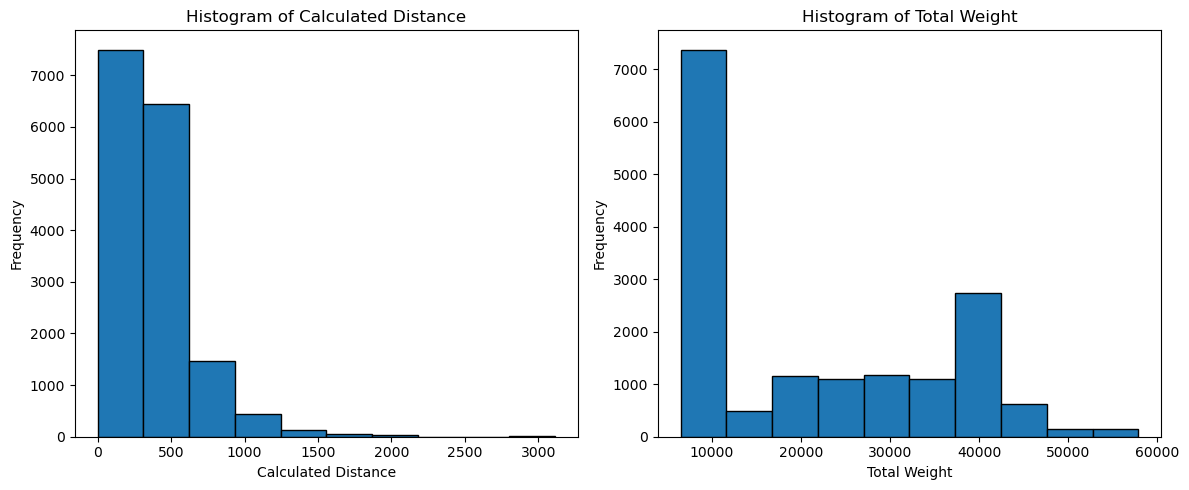

In [578]:
# Plotting the histogram for 'calculated_distance'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(maindata['calculated_distance'], edgecolor='black')
plt.title('Histogram of Calculated Distance')
plt.xlabel('Calculated Distance')
plt.ylabel('Frequency')

# Plotting the histogram for 'goods_weight'
plt.subplot(1, 2, 2)
plt.hist(maindata['total_weight'], edgecolor='black')
plt.title('Histogram of Total Weight')
plt.xlabel('Total Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/var/folders/wb/gbvs_htj4cx1497v9jtbfx2r0000gn/T/ipykernel_6999/1858273157.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(maindata[x], bins = ceil(sqrt(len(maindata[x]))+1))
/var/folders/wb/gbvs_htj4cx1497v9jtbfx2r0000gn/T/ipykernel_6999/1858273157.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

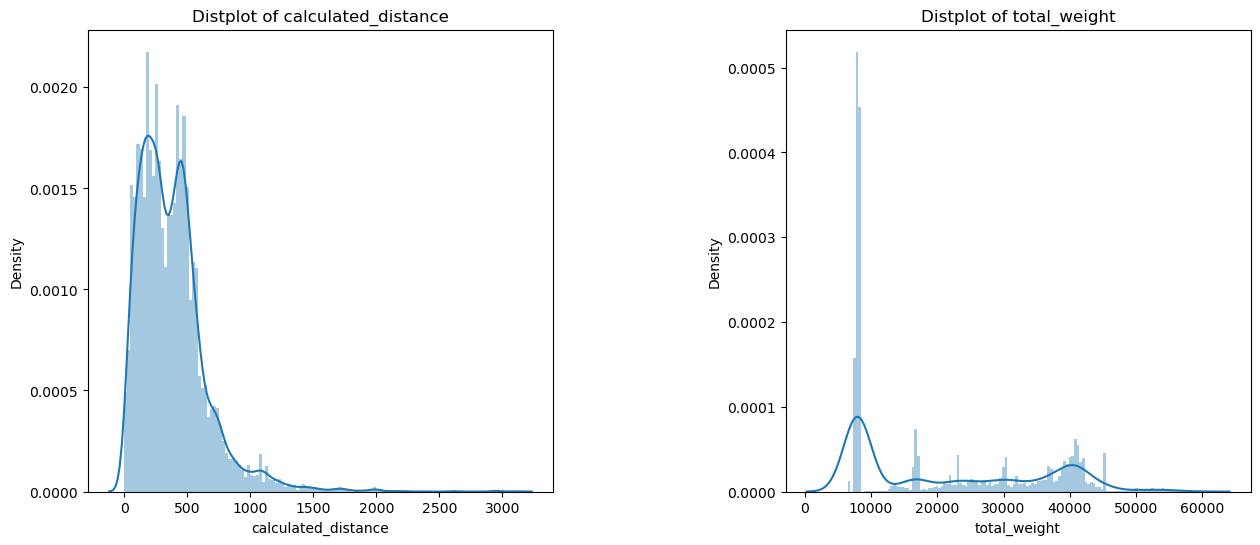

In [579]:
from math import ceil, sqrt, log2

plt.figure(1, figsize = (15 , 6))
n = 0 
for x in ['calculated_distance', 'total_weight']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(maindata[x], bins = ceil(sqrt(len(maindata[x]))+1))
    plt.title('Distplot of {}'.format(x))
plt.show()

/Users/eetueronen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


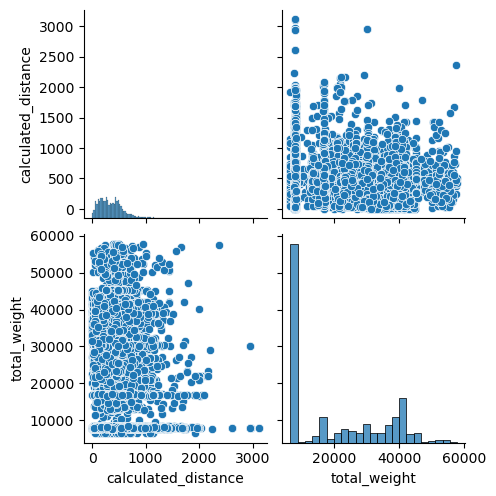

In [580]:
sns.pairplot(maindata, vars = ['calculated_distance', 'total_weight'])

## Locations

In [581]:
trips_stops = trips_stops[["id", "tripId", 'actionStartTime', 'actionEndTime', 'tripSequenceNr', 'administrativeReferenceLocationId']]
trips_stops = trips_stops.rename(columns = {'id':'stop_id', 'tripId':'trip_id', 'actionStartTime':'action_start_time', 'actionEndTime':'action_end_time', 'tripSequenceNr':'trip_sequence_number', 'administrativeReferenceLocationId':'location_id'})
print(trips_stops.shape)
trips_stops.head()

(46686, 6)


stop_id                               trip_id  \
0  6439750f-b03b-49b8-a623-2199265f459c  12502290-06db-4b00-843b-3d3741e633b4   
1  8c3a2abf-c176-4c6f-8490-490291d770a8  12502290-06db-4b00-843b-3d3741e633b4   
2  3e0bebe3-79e8-497a-9347-94eb59f7f2d7  12631671-fe22-4547-9dba-39ea678d02f4   
3  0a6a66b7-0947-492b-ad9d-1f89a3c6987a  12631671-fe22-4547-9dba-39ea678d02f4   
4  237d5159-5008-4e22-b2dc-36842bad2ee7  175b062e-9edc-452f-a846-40eea9871351   

             action_start_time              action_end_time  \
0  2023-10-10 12:51:53.0000000  2023-10-10 12:52:14.0000000   
1  2023-10-11 07:58:09.0000000  2023-10-11 08:02:25.0000000   
2  2023-05-02 09:08:00.0000000  2023-05-02 11:08:00.0000000   
3  2023-05-02 17:00:00.0000000  2023-05-02 18:08:50.0000000   
4  2023-04-13 06:56:09.0000000  2023-04-13 08:08:13.0000000   

   trip_sequence_number                           location_id  
0                     0  2dc5247b-57a5-42c2-845f-5f103423b39e  
1                     1  c4922ef0-f8a1-401c-b13d-4c07823b1e06  
2                     0  f164bc1a-787e-4742-8faf-debe95ecfb93  
3                     1  196e5c48-bd02-4a3c-a460-c50a23882bc9  
4                     0  1702d933-1a8f-4b56-96ca-23b78066be70

In [582]:
# Merge the trips_stops DataFrame on 'trip_id'
stop_locations = pd.merge(trips_stops, locations, on='location_id', how='left')
stop_locations.head()
print(stop_locations.shape)

(46686, 11)


In [583]:
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point

# Sort the GeoDataFrame by the attribute and timestamp
gdf = gpd.GeoDataFrame(stop_locations, geometry=gpd.points_from_xy(stop_locations.lon, stop_locations.lat))
gdf_sorted = gdf.sort_values(['trip_id', 'action_start_time'])



gdf_sorted.head()

stop_id  \
32104  26b5517d-2890-4cd7-a7fb-56bf418220b3   
32105  cdb9bea6-1c62-4e62-8607-e383da44b250   
32106  13dac77e-2bc2-4f2e-90d2-6eda917b8787   
27020  c8dc9b07-7f35-4017-a93b-86139f779145   
27019  7f1bc292-6066-4d0c-97e8-4e228a075d19   

                                    trip_id            action_start_time  \
32104  0004120d-7bc0-441a-b4a7-0f560159bf2d  2023-10-11 06:56:08.0000000   
32105  0004120d-7bc0-441a-b4a7-0f560159bf2d  2023-10-11 13:24:54.0000000   
32106  0004120d-7bc0-441a-b4a7-0f560159bf2d  2023-10-11 19:21:23.0000000   
27020  00083fdb-5f49-401a-b718-7e4ca8525b88  2023-05-10 10:12:39.0000000   
27019  00083fdb-5f49-401a-b718-7e4ca8525b88  2023-05-11 05:52:21.0000000   

                   action_end_time  trip_sequence_number  \
32104  2023-10-11 06:56:13.0000000                     0   
32105  2023-10-11 16:52:44.0000000                     1   
32106  2023-10-11 19:28:38.0000000                     2   
27020  2023-05-10 10:12:40.0000000                     0   
27019  2023-05-11 05:52:22.0000000                     1   

                                location_id                  locationName  \
32104  3c23bf30-2ef8-40a3-858b-63ff0f5e51d8  DFDS (VLAARDINGEN-IMMINGHAM)   
32105  da39943f-cd13-491a-a6c5-876d0bd079e6                  LGI-SHIPSIDE   
32106  3c23bf30-2ef8-40a3-858b-63ff0f5e51d8  DFDS (VLAARDINGEN-IMMINGHAM)   
27020  cf64f7a8-6512-4f90-a351-53107b61875d         AB INBEV BECKS GROSSE   
27019  62d3eaee-c576-4d90-a243-ff9738579e21                  DIT Duisburg   

        lat  lon         city country                  geometry  
32104 51.91 4.36  Vlaardingen     NaN  POINT (4.35822 51.90701)  
32105 51.63 6.69        Hünxe     NaN  POINT (6.69345 51.63253)  
32106 51.91 4.36  Vlaardingen     NaN  POINT (4.35822 51.90701)  
27020 53.08 8.79       BREMEN      DE  POINT (8.79001 53.07584)  
27019 51.39 6.73     Duisburg      DE  POINT (6.72929 51.39109)

In [584]:
filtered_gdf = gdf_sorted[gdf_sorted['trip_id'].isin(maindata['trip_id'])]
filtered_gdf.shape

(43255, 12)

In [585]:
# Checking for any null values across the entire DataFrame
null_check_result = filtered_gdf.isnull().any()
print("Null check across DataFrame:", null_check_result)

null_values_per_column = filtered_gdf.isnull().sum()
print("Null values per column:\n", null_values_per_column)


Null check across DataFrame: stop_id                 False
trip_id                 False
action_start_time        True
action_end_time          True
trip_sequence_number    False
location_id              True
locationName             True
lat                      True
lon                      True
city                     True
country                  True
geometry                False
dtype: bool
Null values per column:
 stop_id                    0
trip_id                    0
action_start_time        949
action_end_time         1185
trip_sequence_number       0
location_id               13
locationName             373
lat                      366
lon                      366
city                     371
country                 4077
geometry                   0
dtype: int64


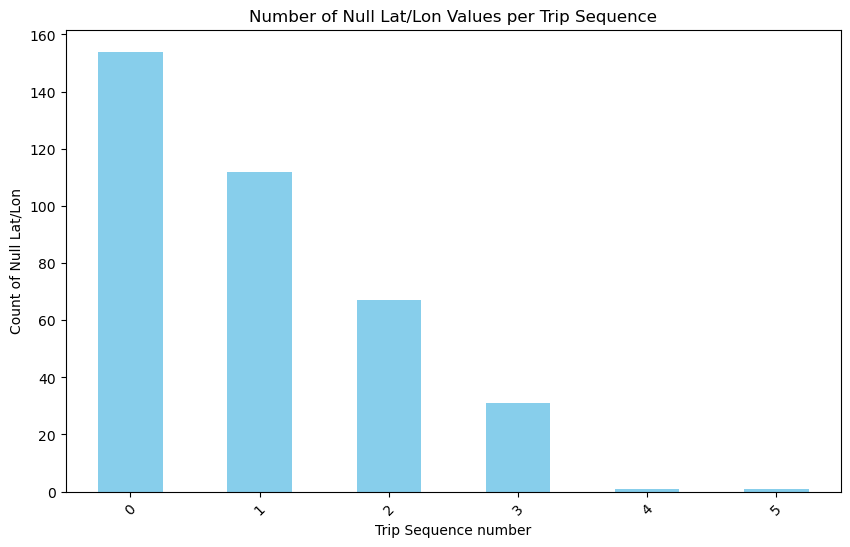

In [586]:
null_lat_lon = filtered_gdf[filtered_gdf['lat'].isnull() | filtered_gdf['lon'].isnull()]

# Step 2: Group by 'trip_sequence' and count nulls
null_counts = null_lat_lon.groupby('trip_sequence_number').size()

# Step 3: Plot
null_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Null Lat/Lon Values per Trip Sequence')
plt.xlabel('Trip Sequence number')
plt.ylabel('Count of Null Lat/Lon')
plt.xticks(rotation=45)
plt.show()

/Users/eetueronen/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


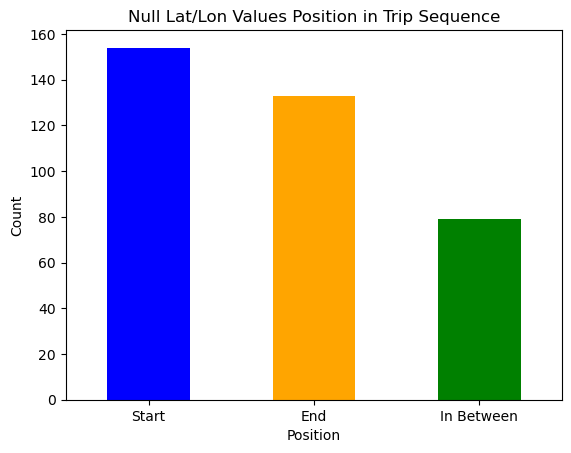

In [587]:
null_lat_lon = filtered_gdf[filtered_gdf['lat'].isnull() | filtered_gdf['lon'].isnull()]

# Step 2: Find min and max 'trip_sequence' for each 'trip_id'
trip_seq_bounds = filtered_gdf.groupby('trip_id')['trip_sequence_number'].agg(['min', 'max'])

# Step 3: Classify null positions
def classify_null_position(row):
    if row['trip_sequence_number'] == trip_seq_bounds.loc[row['trip_id'], 'min']:
        return 'Start'
    elif row['trip_sequence_number'] == trip_seq_bounds.loc[row['trip_id'], 'max']:
        return 'End'
    else:
        return 'In Between'

null_lat_lon['Position'] = null_lat_lon.apply(classify_null_position, axis=1)

# Step 4: Aggregate and plot
position_counts = null_lat_lon['Position'].value_counts()

position_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Null Lat/Lon Values Position in Trip Sequence')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [588]:
# Define central Netherlands coordinates
central_netherlands_lat = 52.1326
central_netherlands_lon = 5.2913

# Update start and end positions with null lat/lon to central Netherlands coordinates
for index, row in filtered_gdf.iterrows():
    if pd.isnull(row['lat']) or pd.isnull(row['lon']):
        if row['trip_sequence_number'] == trip_seq_bounds.loc[row['trip_id'], 'min'] or \
           row['trip_sequence_number'] == trip_seq_bounds.loc[row['trip_id'], 'max']:
            filtered_gdf.at[index, 'lat'] = central_netherlands_lat
            filtered_gdf.at[index, 'lon'] = central_netherlands_lon



In [589]:
# Checking for any null values across the entire DataFrame
null_check_result = filtered_gdf.isnull().any()
print("Null check across DataFrame:", null_check_result)

null_values_per_column = filtered_gdf.isnull().sum()
print("Null values per column:\n", null_values_per_column)



Null check across DataFrame: stop_id                 False
trip_id                 False
action_start_time        True
action_end_time          True
trip_sequence_number    False
location_id              True
locationName             True
lat                      True
lon                      True
city                     True
country                  True
geometry                False
dtype: bool
Null values per column:
 stop_id                    0
trip_id                    0
action_start_time        949
action_end_time         1185
trip_sequence_number       0
location_id               13
locationName             373
lat                       79
lon                       79
city                     371
country                 4077
geometry                   0
dtype: int64


In [590]:
# Update all positions with null lat/lon to central Netherlands coordinates
filtered_gdf.loc[filtered_gdf['lat'].isnull(), 'lat'] = central_netherlands_lat
filtered_gdf.loc[filtered_gdf['lon'].isnull(), 'lon'] = central_netherlands_lon


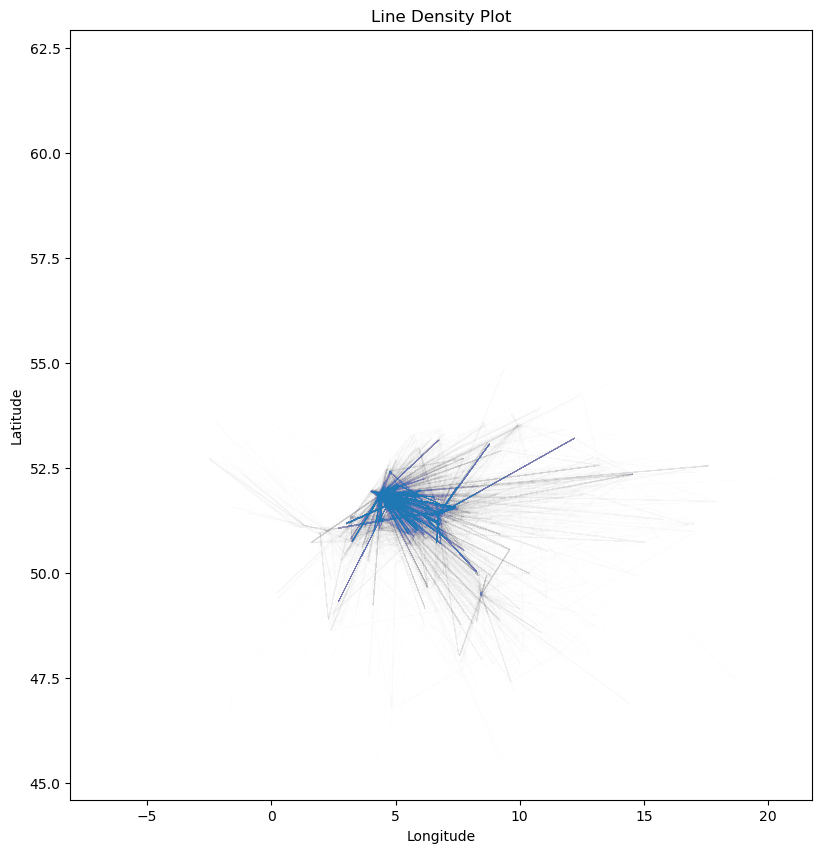

In [591]:
from shapely.geometry import LineString

# Convert 'action_start_time' to datetime if it's not already
gdf['action_start_time'] = pd.to_datetime(gdf['action_start_time'])

# Sort the DataFrame by 'trip_id' and 'action_start_time'
gdf_sorted = gdf.sort_values(by=['trip_id', 'action_start_time'])

# Group by 'trip_id' and create LineStrings, but only for groups with more than one point
lines = gdf_sorted.groupby('trip_id').filter(lambda x: len(x) > 1).groupby('trip_id').apply(lambda x: LineString(zip(x.lon, x.lat)))

# Create a GeoDataFrame for the lines
gdf_lines = gpd.GeoDataFrame(geometry=lines, crs="EPSG:4326")

# Plot line density
fig, ax = plt.subplots(figsize=(10, 10))
gdf_lines.plot(ax=ax, linewidth=1, alpha=0.005)

ax.set_title('Line Density Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [592]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter out only European countries
europe = world[world['continent'] == 'Europe']

# Initialize a dictionary to hold trip information
trip_countries = {}

# Iterate through each trip in gdf_lines
for index, trip in gdf_lines.iterrows():
    # Check if the trip geometry is valid
    if trip.geometry and trip.geometry.is_valid:
        # Initialize a dictionary to hold intersecting countries and their lengths
        intersecting_countries = {}
        # Calculate the total length of the trip
        total_length = trip.geometry.length
        # Assume initially that the entire trip is over water
        water_body_length = total_length

        # Check for intersections with European countries
        for country in europe.itertuples():
            if trip.geometry.intersects(country.geometry):
                # Calculate the length of the intersection
                intersection_length = trip.geometry.intersection(country.geometry).length
                # Update the intersecting country's length
                intersecting_countries[country.name] = intersecting_countries.get(country.name, 0) + intersection_length
                # Subtract the intersection length from the water body length
                water_body_length -= intersection_length

        # If there's a water body between countries, distribute its length evenly among intersecting countries
        if water_body_length > 0 and len(intersecting_countries) > 0:
            per_country_addition = water_body_length / len(intersecting_countries)
            for country in intersecting_countries:
                intersecting_countries[country] += per_country_addition

        # Normalize the lengths to get the share for each country
        total_adjusted_length = sum(intersecting_countries.values())
        for country in intersecting_countries:
            intersecting_countries[country] /= total_adjusted_length

        # Store the countries and their shares for each trip
        trip_countries[index] = [(country, share) for country, share in intersecting_countries.items()]
    else:
        # For invalid geometries, assume the trip passes through the Netherlands
        trip_countries[index] = [('Netherlands', 1.0)]

# Convert the trip_countries dictionary to a DataFrame
trip_countries_df = pd.DataFrame([
    {'trip_id': trip_id, 'countries_shares': countries_shares}
    for trip_id, countries_shares in trip_countries.items()
])

# Display the resulting DataFrame
print(trip_countries_df)

/var/folders/wb/gbvs_htj4cx1497v9jtbfx2r0000gn/T/ipykernel_6999/2778684812.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


                                    trip_id  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d   
1      00083fdb-5f49-401a-b718-7e4ca8525b88   
2      000e4ee9-8768-42fd-95b2-27bb4904a969   
3      000fa903-a8c7-49fe-801a-9828e9224efd   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3   
...                                     ...   
17324  fff0370d-fbc4-40e4-aff2-7e45b8267aee   
17325  fff34c8f-b719-440e-853b-88e0bc329f4a   
17326  fff6efd5-1dc7-431e-8b46-fcb657cd7be4   
17327  fff8e1a1-1d11-4d27-ae88-f0b061ed427e   
17328  fffb1581-e0d2-42bf-bc08-3744ed5e45d1   

                                        countries_shares  
0      [(Germany, 0.3961381208092792), (Netherlands, ...  
1                                       [(Germany, 1.0)]  
2                                       [(Germany, 1.0)]  
3      [(Belgium, 0.45880156892112756), (Netherlands,...  
4      [(Germany, 0.5032726018979098), (Belgium, 0.28...  
...                                                  ...  
17324  [(Germany, 0.27

In [593]:
trip_countries_df.head()

trip_id  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d   
1  00083fdb-5f49-401a-b718-7e4ca8525b88   
2  000e4ee9-8768-42fd-95b2-27bb4904a969   
3  000fa903-a8c7-49fe-801a-9828e9224efd   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3   

                                    countries_shares  
0  [(Germany, 0.3961381208092792), (Netherlands, ...  
1                                   [(Germany, 1.0)]  
2                                   [(Germany, 1.0)]  
3  [(Belgium, 0.45880156892112756), (Netherlands,...  
4  [(Germany, 0.5032726018979098), (Belgium, 0.28...

In [594]:
# Step 1: Create a list of tuples from the provided data
country_data = [
    (6.18, "NL"),
    (6.05, "PT"),
    (5.96, "FR"),
    (5.89, "AT"),
    (5.63, "ES"),
    (5.57, "SE"),
    (5.55, "DK"),
    (5.49, "HR"),
    (5.46, "DE"),
    (5.34, "LU"),
    (5.26, "FI"),
    (5.22, "CY"),
    (5.17, "UK"),
    (4.73, "EL"),
    (4.7, "LT"),
    (4.68, "EE"),
    (4.66, "SI"),
    (4.48, "IE"),
    (4.39, "IT"),
    (4.39, "BE"),
    (4.14, "PL"),
    (3.96, "SK"),
    (3.95, "CZ"),
    (3.89, "HU"),
    (3.52, "BG"),
    (3.45, "LV"),
    (3.24, "MT"),
    (2.96, "RO")
]

# Step 2: Map of country codes to their full English names
country_names = {
    "NL": "Netherlands",
    "PT": "Portugal",
    "FR": "France",
    "AT": "Austria",
    "ES": "Spain",
    "SE": "Sweden",
    "DK": "Denmark",
    "HR": "Croatia",
    "DE": "Germany",
    "LU": "Luxembourg",
    "FI": "Finland",
    "CY": "Cyprus",
    "UK": "United Kingdom",
    "EL": "Greece",
    "LT": "Lithuania",
    "EE": "Estonia",
    "SI": "Slovenia",
    "IE": "Ireland",
    "IT": "Italy",
    "BE": "Belgium",
    "PL": "Poland",
    "SK": "Slovakia",
    "CZ": "Czech Republic",
    "HU": "Hungary",
    "BG": "Bulgaria",
    "LV": "Latvia",
    "MT": "Malta",
    "RO": "Romania"
}

# Step 3: Transform the list using the mapping
transformed_data = [(value, country_names[code]) for value, code in country_data]

# Print the transformed list
for item in transformed_data:
    print(item)

(6.18, 'Netherlands')
(6.05, 'Portugal')
(5.96, 'France')
(5.89, 'Austria')
(5.63, 'Spain')
(5.57, 'Sweden')
(5.55, 'Denmark')
(5.49, 'Croatia')
(5.46, 'Germany')
(5.34, 'Luxembourg')
(5.26, 'Finland')
(5.22, 'Cyprus')
(5.17, 'United Kingdom')
(4.73, 'Greece')
(4.7, 'Lithuania')
(4.68, 'Estonia')
(4.66, 'Slovenia')
(4.48, 'Ireland')
(4.39, 'Italy')
(4.39, 'Belgium')
(4.14, 'Poland')
(3.96, 'Slovakia')
(3.95, 'Czech Republic')
(3.89, 'Hungary')
(3.52, 'Bulgaria')
(3.45, 'Latvia')
(3.24, 'Malta')
(2.96, 'Romania')


In [595]:
from sklearn.preprocessing import MinMaxScaler
# Directly adjust and invert the scores according to the new requirement
adjusted_scores = [(2 - ((value - 1) / 6), country) for value, country in transformed_data]

# Sort the list based on the new scores so that the lowest (best) scores are first
adjusted_scores.sort()
# Convert list of tuples into a dictionary
adjusted_scores_dict = {country: score for score, country in adjusted_scores}

# Now adjusted_scores_dict can be used for lookups
print(adjusted_scores_dict)

{'Netherlands': 1.1366666666666667, 'Portugal': 1.1583333333333332, 'France': 1.1733333333333333, 'Austria': 1.185, 'Spain': 1.2283333333333335, 'Sweden': 1.2383333333333333, 'Denmark': 1.2416666666666667, 'Croatia': 1.2516666666666665, 'Germany': 1.2566666666666668, 'Luxembourg': 1.2766666666666668, 'Finland': 1.29, 'Cyprus': 1.2966666666666669, 'United Kingdom': 1.3050000000000002, 'Greece': 1.3783333333333334, 'Lithuania': 1.3833333333333333, 'Estonia': 1.3866666666666667, 'Slovenia': 1.3900000000000001, 'Ireland': 1.42, 'Belgium': 1.435, 'Italy': 1.435, 'Poland': 1.4766666666666666, 'Slovakia': 1.5066666666666666, 'Czech Republic': 1.5083333333333333, 'Hungary': 1.5183333333333333, 'Bulgaria': 1.58, 'Latvia': 1.5916666666666666, 'Malta': 1.6266666666666667, 'Romania': 1.6733333333333333}


In [596]:
def calculate_trip_multiplier(row):
    trip_multiplier = 1.0
    countries_shares = row['countries_shares']
    # Debug print
    print(f"Processing row: {row['trip_id']}, countries_shares: {countries_shares}")
    
    # Convert list of tuples to dictionary if it's not already a dictionary
    if isinstance(countries_shares, list):
        countries_shares = dict(countries_shares)
    elif not isinstance(countries_shares, dict):
        print("countries_shares is neither a list of tuples nor a dictionary. Skipping...")
        return trip_multiplier
    
    for country, share in countries_shares.items():
        if country in adjusted_scores_dict:
            # Debug print
            print(f"Adjusting for {country} with share {share} and score {adjusted_scores_dict[country]}")
            trip_multiplier *= (1 + (adjusted_scores_dict[country] - 1) * share)
        else:
            print(f"{country} not found in adjusted_scores.")
    
    return trip_multiplier

# Assuming adjusted_scores is defined somewhere in your notebook
# Example: adjusted_scores = {'Germany': 1.05, 'France': 1.02}

# Calculate new multipliers using apply
trip_countries_df['new_multiplier'] = trip_countries_df.apply(calculate_trip_multiplier, axis=1)

# Print the DataFrame to verify the results
print(trip_countries_df[['trip_id', 'new_multiplier']])
trip_countries_df.head()

Processing row: 0004120d-7bc0-441a-b4a7-0f560159bf2d, countries_shares: [('Germany', 0.3961381208092792), ('Netherlands', 0.6038618791907209)]
Adjusting for Germany with share 0.3961381208092792 and score 1.2566666666666668
Adjusting for Netherlands with share 0.6038618791907209 and score 1.1366666666666667
Processing row: 00083fdb-5f49-401a-b718-7e4ca8525b88, countries_shares: [('Germany', 1.0)]
Adjusting for Germany with share 1.0 and score 1.2566666666666668
Processing row: 000e4ee9-8768-42fd-95b2-27bb4904a969, countries_shares: [('Germany', 1.0)]
Adjusting for Germany with share 1.0 and score 1.2566666666666668
Processing row: 000fa903-a8c7-49fe-801a-9828e9224efd, countries_shares: [('Belgium', 0.45880156892112756), ('Netherlands', 0.5411984310788724)]
Adjusting for Belgium with share 0.45880156892112756 and score 1.435
Adjusting for Netherlands with share 0.5411984310788724 and score 1.1366666666666667
Processing row: 001507c0-f94c-4e4b-b4b1-d6540ebe64b3, countries_shares: [('Germ

trip_id  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d   
1  00083fdb-5f49-401a-b718-7e4ca8525b88   
2  000e4ee9-8768-42fd-95b2-27bb4904a969   
3  000fa903-a8c7-49fe-801a-9828e9224efd   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3   

                                    countries_shares  new_multiplier  
0  [(Germany, 0.3961381208092792), (Netherlands, ...            1.19  
1                                   [(Germany, 1.0)]            1.26  
2                                   [(Germany, 1.0)]            1.26  
3  [(Belgium, 0.45880156892112756), (Netherlands,...            1.29  
4  [(Germany, 0.5032726018979098), (Belgium, 0.28...            1.31

In [597]:
from collections import Counter

# Assuming countries_share is a column in trip_countries_df containing lists of tuples
countries_share = trip_countries_df['countries_shares']

# Step 1: Extract country names from each tuple in each list
country_names = [country for sublist in countries_share for country, share in sublist]

# Step 2 and 3 are combined here: Flatten the list and count occurrences
country_counts = Counter(country_names)

# Step 4: Find the most common country
most_common_country, count = country_counts.most_common(1)[0]

print(f"The most common country is {most_common_country} appearing {count} times.")

The most common country is Netherlands appearing 13918 times.


In [598]:
# Step 1: Merge DataFrames
merged_data = pd.merge(maindata, trip_countries_df[['trip_id', 'new_multiplier']], on='trip_id', how='left')

# Step 2: Set Default Multiplier for Netherlands
default_multiplier_netherlands = 1.1366666666666667
merged_data['new_multiplier'].fillna(default_multiplier_netherlands, inplace=True)

# Step 3: Calculate weighted_distance
merged_data['weighted_distance'] = merged_data['calculated_distance'] * merged_data['new_multiplier']

# Update maindata with the new weighted_distance column
maindata['weighted_distance'] = merged_data['weighted_distance']

# Now maindata has a new column 'weighted_distance' with the calculated values

maindata.head()

trip_id     status  linked_trip  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3  000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   

               trip_start_date                trip_end_date  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   

   calculated_distance  consignments_count  total_goods_count  \
0               397.54                1.00               0.00   
1               603.60                1.00               0.00   
2                25.30                1.00               2.00   
3               412.53                1.00               1.00   
4             1,067.07                1.00               0.00   

   total_goods_weight                            vehicle_id vehicle_name  \
0                0.00  55573865-5602-4722-9836-795ed46e9b55    WPR 7129P   
1                0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219    WGM 51747   
2           31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92     PO 9HL72   
3           12,000.00  a64e303f-690a-474d-af32-23c22a95fa82    PNT 87912   
4                0.00  7685cb7a-0c23-4731-8feb-34492ec20a18    WGM 92377   

  emission_standard  fuel_type  vehicle_empty_weight  total_weight  \
0             euro6     diesel              7,528.00      7,528.00   
1             euro6  liquidGas              8,013.00      8,013.00   
2             euro6  liquidGas              8,013.00     39,287.00   
3             euro6  liquidGas              8,157.00     20,157.00   
4             euro6     diesel              8,325.00      8,325.00   

   weighted_distance  
0             474.10  
1             758.52  
2              31.79  
3             531.46  
4           1,394.70

## Building the Models

## Model 1: K-means clustering using the calculated distances and total weights

In [599]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X1 = maindata[['calculated_distance', 'total_weight']].iloc[: , :].values
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X1_scaled)
    inertia.append(algorithm.inertia_)

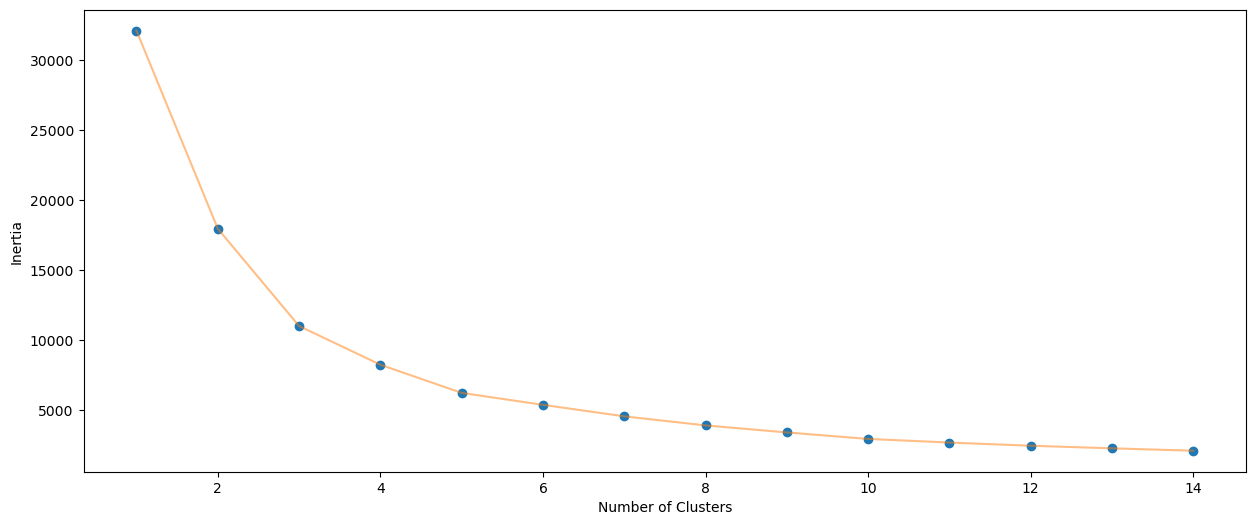

In [600]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1, 15) , inertia, 'o')
plt.plot(np.arange(1, 15) , inertia, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [601]:
# Based on the figre above, k=5 might be the best value for k.

# This is setting up the algortihm for k=5, then fitting in the data (X1_scaled)

k = 5
algorithm = (KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X1_scaled)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [602]:
# This is arranging infromation to be plotted in the graph below!

h = 0.02
x_min, x_max = X1_scaled[:, 0].min() - 1, X1_scaled[:, 0].max() + 1
y_min, y_max = X1_scaled[:, 1].min() - 1, X1_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

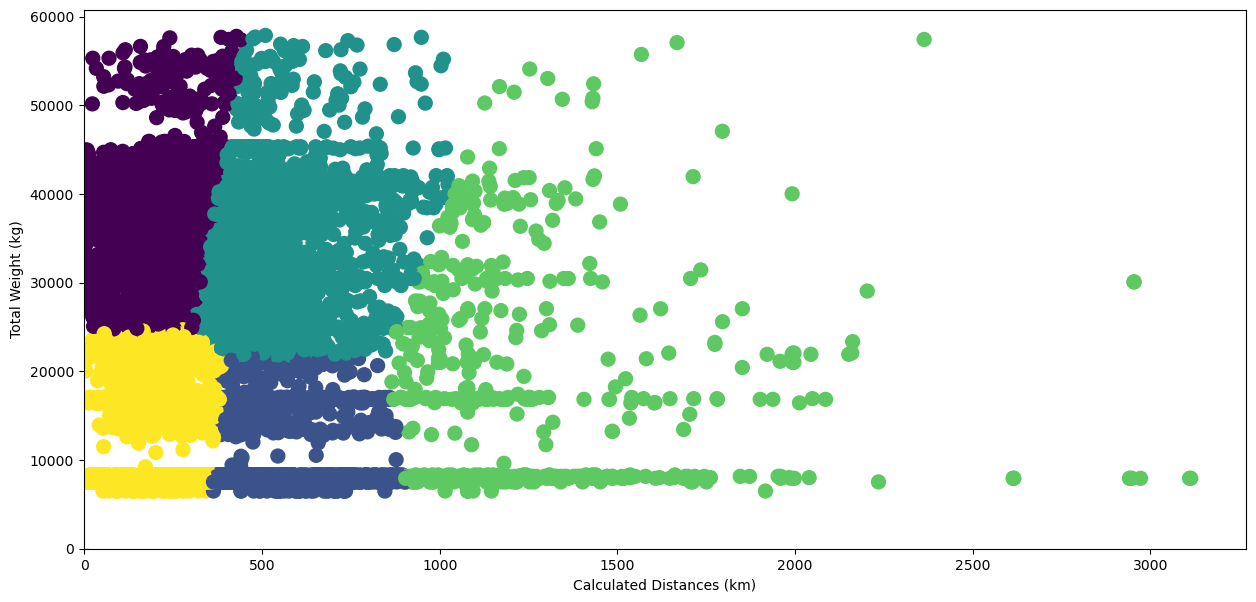

In [603]:
# This uses the set up above and build in with the centroids, and fitting from the algorithm...

plt.figure(1, figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
sc = plt.scatter(x = 'calculated_distance', y = 'total_weight', data = maindata, c = labels1, s = 100)
plt.ylabel('Total Weight (kg)'), plt.xlabel('Calculated Distances (km)')
plt.show()

In [604]:
# Map Clusters to the table
y_kmeans = algorithm.predict(X1_scaled)
maindata['model1_cluster'] = pd.DataFrame(y_kmeans)
maindata.head()

trip_id     status  linked_trip  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3  000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   

               trip_start_date                trip_end_date  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   

   calculated_distance  consignments_count  total_goods_count  \
0               397.54                1.00               0.00   
1               603.60                1.00               0.00   
2                25.30                1.00               2.00   
3               412.53                1.00               1.00   
4             1,067.07                1.00               0.00   

   total_goods_weight                            vehicle_id vehicle_name  \
0                0.00  55573865-5602-4722-9836-795ed46e9b55    WPR 7129P   
1                0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219    WGM 51747   
2           31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92     PO 9HL72   
3           12,000.00  a64e303f-690a-474d-af32-23c22a95fa82    PNT 87912   
4                0.00  7685cb7a-0c23-4731-8feb-34492ec20a18    WGM 92377   

  emission_standard  fuel_type  vehicle_empty_weight  total_weight  \
0             euro6     diesel              7,528.00      7,528.00   
1             euro6  liquidGas              8,013.00      8,013.00   
2             euro6  liquidGas              8,013.00     39,287.00   
3             euro6  liquidGas              8,157.00     20,157.00   
4             euro6     diesel              8,325.00      8,325.00   

   weighted_distance  model1_cluster  
0             474.10               1  
1             758.52               1  
2              31.79               0  
3             531.46               1  
4           1,394.70               3

## Model 2: K-means clustering using the weighted distances and total weights

In [605]:
X2 = maindata[['weighted_distance', 'total_weight']].iloc[: , :].values
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
    algorithm.fit(X1_scaled)
    inertia.append(algorithm.inertia_)

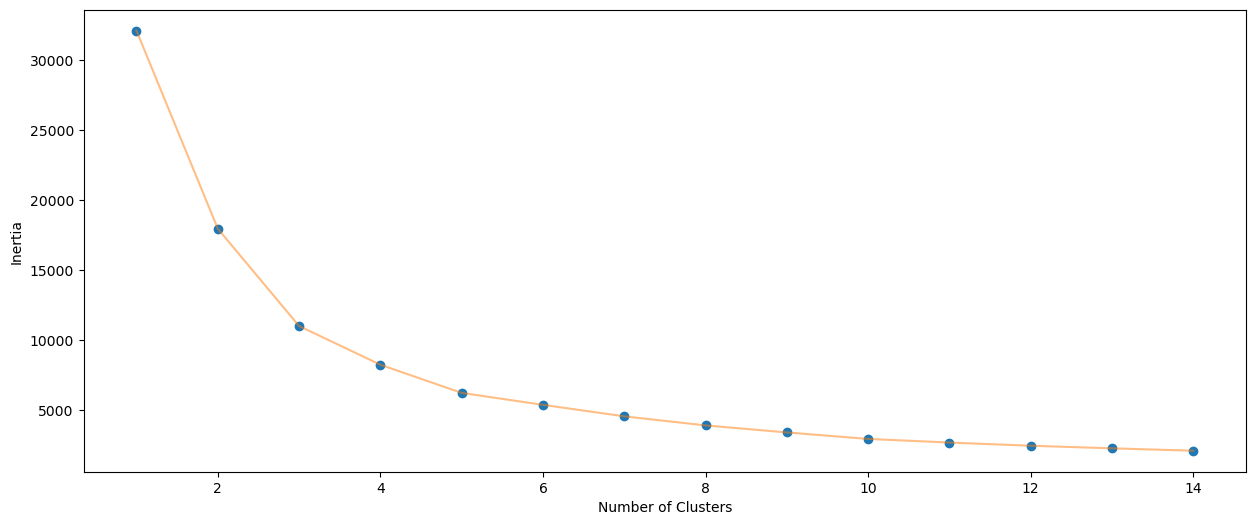

In [606]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1, 15) , inertia, 'o')
plt.plot(np.arange(1, 15) , inertia, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [607]:
# For this too, seems like the best value for k is 5.

# This is setting up the algortihm for k=5, then fitting in the data (X1)

k = 5
algorithm = (KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 42))
algorithm.fit(X2_scaled)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [608]:
# This is arranging infromation to be plotted in the graph below!

h = 0.02
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

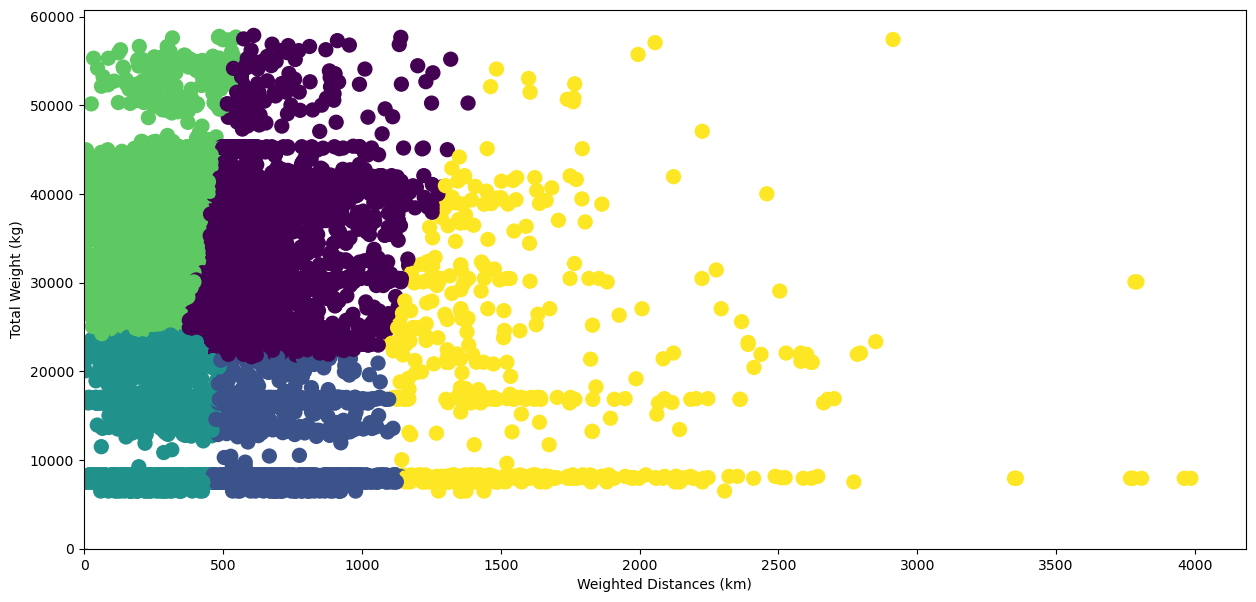

In [609]:
# This uses the set up above and build in with the centroids, and fitting from the algorithm...

plt.figure(1, figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, 
           aspect = 'auto', origin='lower')
sc = plt.scatter(x = 'weighted_distance', y = 'total_weight', data = maindata, c = labels1, s = 100)
plt.ylabel('Total Weight (kg)'), plt.xlabel('Weighted Distances (km)')
plt.show()

In [610]:
#Map Clusters to the table
y_kmeans = algorithm.predict(X2_scaled)
maindata['model2_cluster'] = pd.DataFrame(y_kmeans)
maindata.head()

trip_id     status  linked_trip  \
0  0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1  00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2  000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3  000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4  001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   

               trip_start_date                trip_end_date  \
0  2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1  2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2  2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3  2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4  2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   

   calculated_distance  consignments_count  total_goods_count  \
0               397.54                1.00               0.00   
1               603.60                1.00               0.00   
2                25.30                1.00               2.00   
3               412.53                1.00               1.00   
4             1,067.07                1.00               0.00   

   total_goods_weight                            vehicle_id vehicle_name  \
0                0.00  55573865-5602-4722-9836-795ed46e9b55    WPR 7129P   
1                0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219    WGM 51747   
2           31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92     PO 9HL72   
3           12,000.00  a64e303f-690a-474d-af32-23c22a95fa82    PNT 87912   
4                0.00  7685cb7a-0c23-4731-8feb-34492ec20a18    WGM 92377   

  emission_standard  fuel_type  vehicle_empty_weight  total_weight  \
0             euro6     diesel              7,528.00      7,528.00   
1             euro6  liquidGas              8,013.00      8,013.00   
2             euro6  liquidGas              8,013.00     39,287.00   
3             euro6  liquidGas              8,157.00     20,157.00   
4             euro6     diesel              8,325.00      8,325.00   

   weighted_distance  model1_cluster  model2_cluster  
0             474.10               1               1  
1             758.52               1               1  
2              31.79               0               3  
3             531.46               1               1  
4           1,394.70               3               4

In [611]:
# Export to Excel file
# maindata.to_excel('maindata_new.xlsx', index=False, engine='openpyxl')

## Model 3: Hierarchical Clustering using the calculated distances and total weights

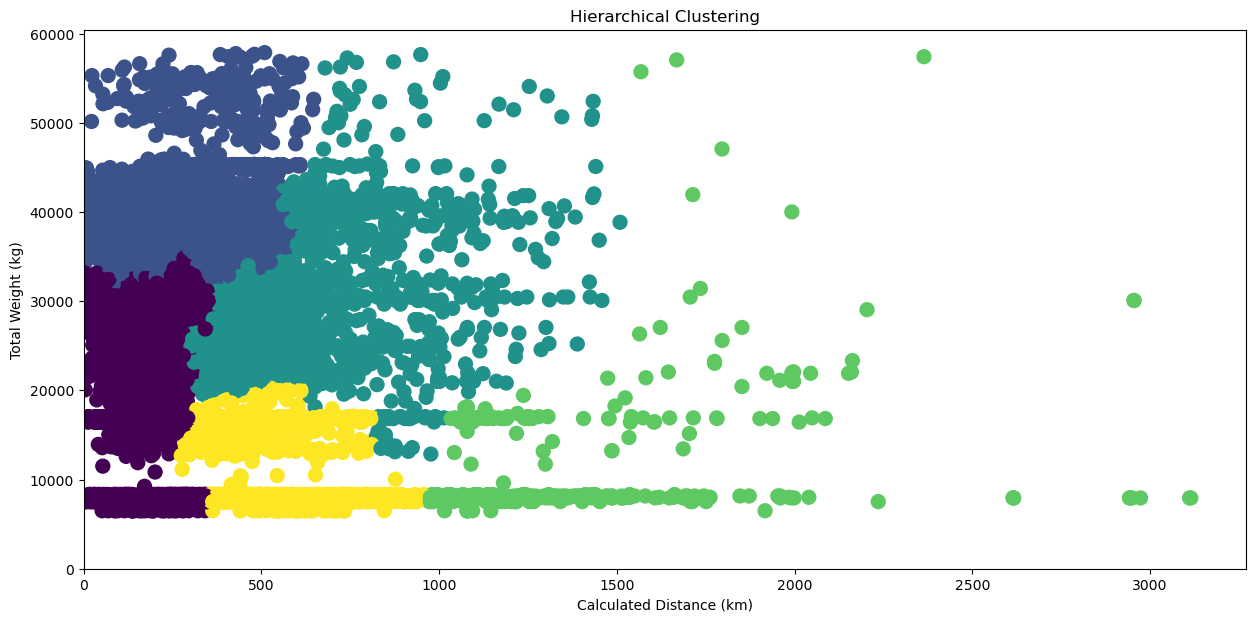

In [612]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical/agglomerative clustering
hierarchical_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_hc = hierarchical_model.fit_predict(X1_scaled)

# Plotting the results
plt.figure(figsize=(15, 7))
plt.scatter(x = 'calculated_distance', y = 'total_weight', data = maindata, c=labels_hc, s = 100)
plt.title("Hierarchical Clustering")
plt.xlabel('Calculated Distance (km)')
plt.ylabel('Total Weight (kg)')
# Set x-axis and y-axis limits to the min and max of the data
plt.xlim(0)
plt.ylim(0)
plt.show()

# Add the cluster labels to the DataFrame
maindata['hc1_cluster'] = labels_hc


## Model 4: Hierarchical Clustering using the weighted distances and total weights

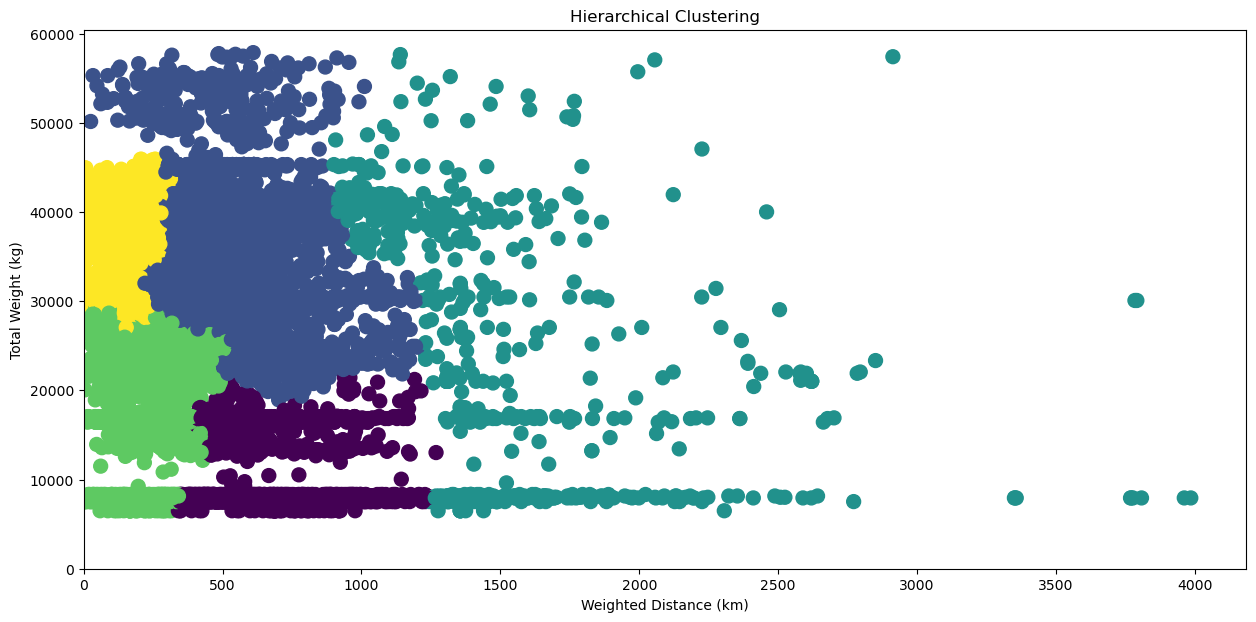

In [613]:
# Perform hierarchical/agglomerative clustering
hierarchical_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_hc = hierarchical_model.fit_predict(X2_scaled)

# Plotting the results
plt.figure(figsize=(15, 7))
plt.scatter(x = 'weighted_distance', y = 'total_weight', data = maindata, c=labels_hc, s = 100)
plt.title("Hierarchical Clustering")
plt.xlabel('Weighted Distance (km)')
plt.ylabel('Total Weight (kg)')
# Set x-axis and y-axis limits to the min and max of the data
plt.xlim(0)
plt.ylim(0)
plt.show()

# Add the cluster labels to the DataFrame
maindata['hc2_cluster'] = labels_hc

## Model 5: DBSCAN using the calculated distances and total weights

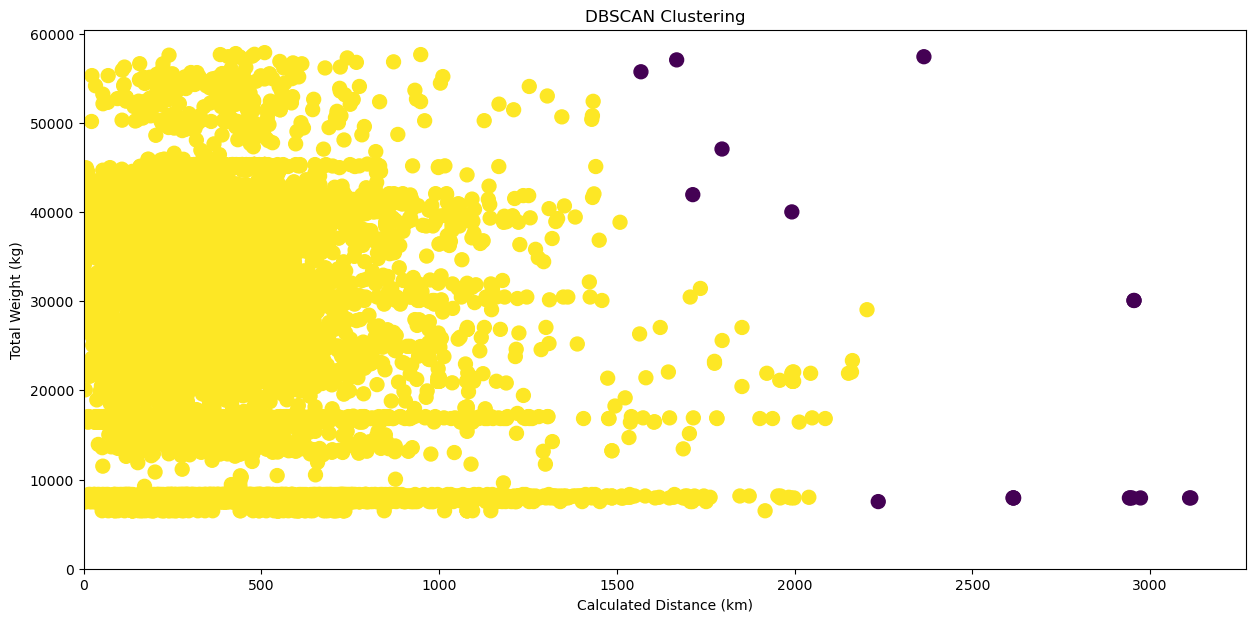

In [614]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan_model.fit_predict(X1_scaled)

# Plotting the results
plt.figure(figsize=(15, 7))
plt.scatter(x = 'calculated_distance', y = 'total_weight', data = maindata, c=labels_db, s = 100)
plt.title("DBSCAN Clustering")
plt.xlabel('Calculated Distance (km)')
plt.ylabel('Total Weight (kg)')
# Set x-axis and y-axis limits to the min and max of the data
plt.xlim(0)
plt.ylim(0)
plt.show()

# Add the cluster labels to the DataFrame
maindata['dbscan1_cluster'] = labels_db


## Model 6: DBSCAN using the weighted distances and total weights

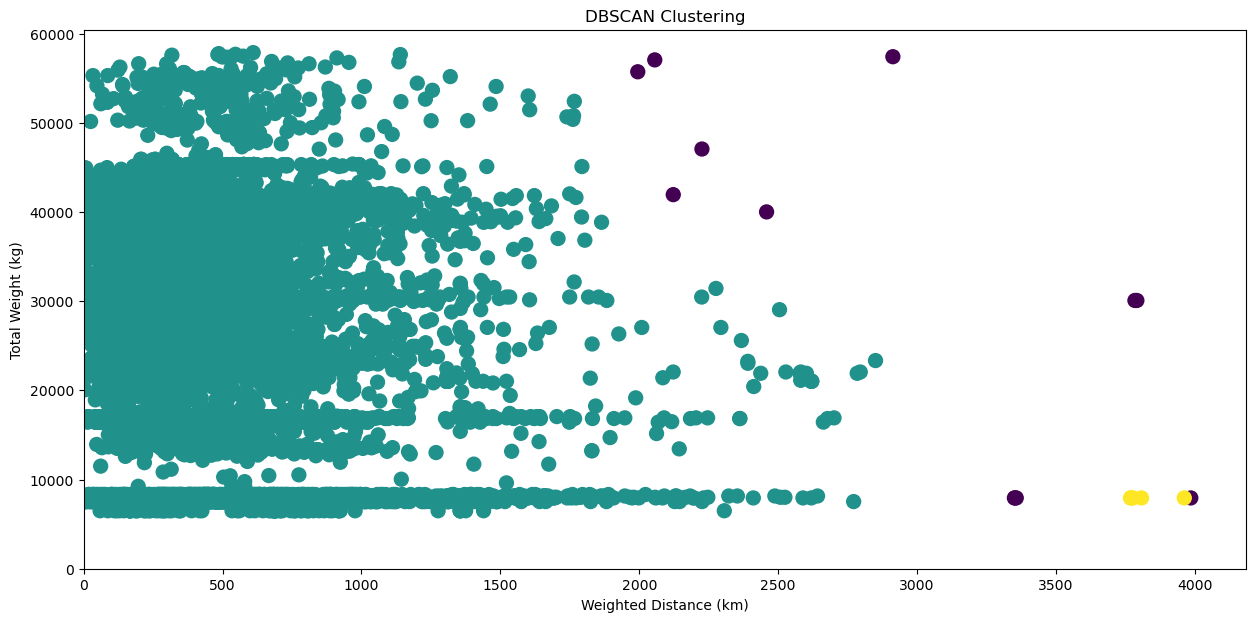

In [615]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan_model.fit_predict(X2_scaled)

# Plotting the results
plt.figure(figsize=(15, 7))
plt.scatter(x = 'weighted_distance', y = 'total_weight', data = maindata, c=labels_db, s = 100)
plt.title("DBSCAN Clustering")
plt.xlabel('Weighted Distance (km)')
plt.ylabel('Total Weight (kg)')
# Set x-axis and y-axis limits to the min and max of the data
plt.xlim(0)
plt.ylim(0)
plt.show()



# Add the cluster labels to the DataFrame
maindata['dbscan2_cluster'] = labels_db


## Model Evaluation and Analysis

In [616]:
# Next, let's analyze the clusters of each model. DBSCAN results will be left out of further analysis because simply based on the scatter plots,
# DBSCAN is not as good a clustering algorithm for our dataset as the other used algorithms.

# By comparing the scatter plots of the k-means models and hierarchical clustering models together, it looks like the k-means models give us better clusters.
# In the k-mean models, the clusters seem to have clearer characteristics that in the hierarchical models' clusters.
# Hence, we will focus on using the k-means models (models 1 & 2) on our final analysis


# Model 1

#Statistical Analysis per cluster
cluster_stats1 = maindata.groupby('model1_cluster').agg(
    count=('model1_cluster', 'size'),
    min_weight=('total_weight', 'min'),
    avg_weight=('total_weight', 'mean'),
    max_weight=('total_weight', 'max'),
    min_distance=('calculated_distance', 'min'),
    avg_distance=('calculated_distance', 'mean'),
    max_distance=('calculated_distance', 'max')
).reset_index()

# Sort by avg_weight in descending order
cluster_stats1 = cluster_stats1.sort_values(by='avg_weight', ascending=False).reset_index(drop=True)

cluster_stats1

model1_cluster  count  min_weight  avg_weight  max_weight  min_distance  \
0               0   3978   24,477.16   38,319.28   57,766.70          1.24   
1               2   2587   21,831.00   34,364.86   57,875.00        310.50   
2               3    677    6,500.00   16,309.44   57,417.00        865.33   
3               4   4564    6,500.00   10,941.13   24,705.00          0.00   
4               1   4248    6,500.00    9,090.53   21,675.00        361.19   

   avg_distance  max_distance  
0        184.02        439.06  
1        527.46      1,023.26  
2      1,235.59      3,114.26  
3        200.55        386.40  
4        531.72        902.71

In [617]:
# Based on this paper: https://journals.sagepub.com/doi/pdf/10.1177/0954407018795278,
# Load weight & distance travelled are factor that impacted tire material fatigue
# This clustering analysis is used to hypotethically modelling trips based on kiad weight & distance factor to categorize the trip using 5 level
# Each level is translated to a 'fatigue factor', and after reach certain value, means that the tire needs to be checked/ replaced
# In order to do that, we need to hypothetically assign fatigue factor value for each trips cluster:

# Short Distance & High Load --> Fatigue Factor: 1.3 --> Cluster 0 
# Short Distance & Low Load --> Fatigue Factor: 1   --> Cluster 1
# Medium Distance & High Load --> Fatigue Factor: 1.5    --> Cluster 2
# Medium Distance & Low Load --> Fatigue Factor: 1.3  --> Cluster 4
# Long Distance Trips --> Fatigue Factor: 1.5  --> Cluster 3

#Assign this value to maindata table:
cluster_fatigue = {
    0: 1.3,  # Fatigue value for cluster 0
    1: 1,  # Fatigue value for cluster 1
    2: 1.5,  # Fatigue value for cluster 2
    3: 1.5,  # Fatigue value for cluster 3
    4: 1.3   # Fatigue value for cluster 4
}

maindata['model1_fatigue_value'] = maindata['model1_cluster'].map(cluster_fatigue)
maindata

trip_id     status  linked_trip  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1      00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2      000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3      000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   
...                                     ...        ...          ...   
16049  ffebb253-eebc-4c3d-a654-5429d5815841  completed         True   
16050  fff0370d-fbc4-40e4-aff2-7e45b8267aee  completed        False   
16051  fff6efd5-1dc7-431e-8b46-fcb657cd7be4  completed         True   
16052  fff8e1a1-1d11-4d27-ae88-f0b061ed427e  completed        False   
16053  fffb1581-e0d2-42bf-bc08-3744ed5e45d1  completed        False   

                   trip_start_date                trip_end_date  \
0      2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1      2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2      2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3      2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4      2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   
...                            ...                          ...   
16049  2023-06-19 20:08:31.0000000  2023-06-20 17:49:37.0000000   
16050  2023-02-07 16:08:54.0000000  2023-02-08 16:57:48.0000000   
16051  2023-07-03 11:48:21.0000000  2023-07-04 09:19:51.0000000   
16052  2023-08-14 08:59:53.0000000  2023-08-15 07:57:33.0000000   
16053  2023-08-14 05:43:13.0000000  2023-08-15 05:56:56.0000000   

       calculated_distance  consignments_count  total_goods_count  \
0                   397.54                1.00               0.00   
1                   603.60                1.00               0.00   
2                    25.30                1.00               2.00   
3                   412.53                1.00               1.00   
4                 1,067.07                1.00               0.00   
...                    ...                 ...                ...   
16049               397.60                1.00               0.00   
16050               363.08                1.00               0.00   
16051               355.12                1.00               2.00   
16052               286.62                1.00               0.00   
16053               477.86                1.00               2.00   

       total_goods_weight                            vehicle_id  ...  \
0                    0.00  55573865-5602-4722-9836-795ed46e9b55  ...   
1                    0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219  ...   
2               31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92  ...   
3               12,000.00  a64e303f-690a-474d-af32-23c22a95fa82  ...   
4                    0.00  7685cb7a-0c23-4731-8feb-34492ec20a18  ...   
...                   ...                                   ...  ...   
16049                0.00  59e311c1-3b20-4416-8f7e-59d550260247  ...   
16050                0.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16051           26,514.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16052                0.00  2e67cec5-3d1b-428a-a0a8-ef6bf846e121  ...   
16053           17,554.00  f75daff4-19b5-412f-960f-d6bc1b39d3c9  ...   

      vehicle_empty_weight total_weight weighted_distance  model1_cluster  \
0                 7,528.00     7,528.00            474.10               1   
1                 8,013.00     8,013.00            758.52               1   
2                 8,013.00    39,287.00             31.79               0   
3                 8,157.00    20,157.00            531.46               1   
4                 8,325.00     8,325.00          1,394.70               3   
...                    ...          ...               ...             ...   
16049             7,938.16     7,938.16            474.18               1   
16050             7,528.00     7,528.00            427.18           

In [618]:
# Model 2

cluster_stats2 = maindata.groupby('model2_cluster').agg(
    count=('model2_cluster', 'size'),
    min_weight=('total_weight', 'min'),
    avg_weight=('total_weight', 'mean'),
    max_weight=('total_weight', 'max'),
    min_distance=('calculated_distance', 'min'),
    avg_distance=('calculated_distance', 'mean'),
    max_distance=('calculated_distance', 'max')
).reset_index()

# Sort by avg_weight in descending order
cluster_stats2 = cluster_stats2.sort_values(by='avg_weight', ascending=False).reset_index(drop=True)

cluster_stats2

model2_cluster  count  min_weight  avg_weight  max_weight  min_distance  \
0               3   4015   24,227.00   38,346.82   57,766.70          1.24   
1               0   2558   21,582.00   34,246.79   57,875.00        259.97   
2               4    665    6,500.00   16,342.51   57,417.00        819.70   
3               2   4835    6,500.00   10,808.25   24,705.00          0.00   
4               1   3981    6,500.00    9,102.72   21,675.00        331.30   

   avg_distance  max_distance  
0        185.89        480.51  
1        528.98      1,126.69  
2      1,239.07      3,114.26  
3        211.16        425.31  
4        543.25        975.19

In [619]:
# Short Distance & High Load --> Fatigue Factor: 1.3 --> Cluster 3 
# Short Distance & Low Load --> Fatigue Factor: 1   --> Cluster 1
# Medium Distance & High Load --> Fatigue Factor: 1.5    --> Cluster 0
# Medium Distance & Low Load --> Fatigue Factor: 1.3  --> Cluster 2
# Long Distance Trips --> Fatigue Factor: 1.5  --> Cluster 4

#Assign this value to maindata table:
cluster_fatigue = {
    0: 1.5,  # Fatigue value for cluster 0
    1: 1,  # Fatigue value for cluster 1
    2: 1.3,  # Fatigue value for cluster 2
    3: 1.3,  # Fatigue value for cluster 3
    4: 1.5   # Fatigue value for cluster 4
}

maindata['model2_fatigue_value'] = maindata['model2_cluster'].map(cluster_fatigue)
maindata

trip_id     status  linked_trip  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1      00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2      000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3      000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   
...                                     ...        ...          ...   
16049  ffebb253-eebc-4c3d-a654-5429d5815841  completed         True   
16050  fff0370d-fbc4-40e4-aff2-7e45b8267aee  completed        False   
16051  fff6efd5-1dc7-431e-8b46-fcb657cd7be4  completed         True   
16052  fff8e1a1-1d11-4d27-ae88-f0b061ed427e  completed        False   
16053  fffb1581-e0d2-42bf-bc08-3744ed5e45d1  completed        False   

                   trip_start_date                trip_end_date  \
0      2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1      2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2      2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3      2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4      2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   
...                            ...                          ...   
16049  2023-06-19 20:08:31.0000000  2023-06-20 17:49:37.0000000   
16050  2023-02-07 16:08:54.0000000  2023-02-08 16:57:48.0000000   
16051  2023-07-03 11:48:21.0000000  2023-07-04 09:19:51.0000000   
16052  2023-08-14 08:59:53.0000000  2023-08-15 07:57:33.0000000   
16053  2023-08-14 05:43:13.0000000  2023-08-15 05:56:56.0000000   

       calculated_distance  consignments_count  total_goods_count  \
0                   397.54                1.00               0.00   
1                   603.60                1.00               0.00   
2                    25.30                1.00               2.00   
3                   412.53                1.00               1.00   
4                 1,067.07                1.00               0.00   
...                    ...                 ...                ...   
16049               397.60                1.00               0.00   
16050               363.08                1.00               0.00   
16051               355.12                1.00               2.00   
16052               286.62                1.00               0.00   
16053               477.86                1.00               2.00   

       total_goods_weight                            vehicle_id  ...  \
0                    0.00  55573865-5602-4722-9836-795ed46e9b55  ...   
1                    0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219  ...   
2               31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92  ...   
3               12,000.00  a64e303f-690a-474d-af32-23c22a95fa82  ...   
4                    0.00  7685cb7a-0c23-4731-8feb-34492ec20a18  ...   
...                   ...                                   ...  ...   
16049                0.00  59e311c1-3b20-4416-8f7e-59d550260247  ...   
16050                0.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16051           26,514.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16052                0.00  2e67cec5-3d1b-428a-a0a8-ef6bf846e121  ...   
16053           17,554.00  f75daff4-19b5-412f-960f-d6bc1b39d3c9  ...   

      total_weight weighted_distance model1_cluster  model2_cluster  \
0         7,528.00            474.10              1               1   
1         8,013.00            758.52              1               1   
2        39,287.00             31.79              0               3   
3        20,157.00            531.46              1               1   
4         8,325.00          1,394.70              3               4   
...            ...               ...            ...             ...   
16049     7,938.16            474.18              1               1   
16050     7,528.00            427.18              1               2   
16051    34,042.00            403.65         

In [620]:
# Model 3

cluster_stats3 = maindata.groupby('hc1_cluster').agg(
    count=('hc1_cluster', 'size'),
    min_weight=('total_weight', 'min'),
    avg_weight=('total_weight', 'mean'),
    max_weight=('total_weight', 'max'),
    min_distance=('calculated_distance', 'min'),
    avg_distance=('calculated_distance', 'mean'),
    max_distance=('calculated_distance', 'max')
).reset_index()

# Sort by avg_weight in descending order
cluster_stats3 = cluster_stats3.sort_values(by='avg_weight', ascending=False).reset_index(drop=True)

cluster_stats3

hc1_cluster  count  min_weight  avg_weight  max_weight  min_distance  \
0            1   4176   31,432.00   40,624.02   57,875.00          1.24   
1            2   1888   12,858.40   29,630.66   57,656.19        287.74   
2            0   5064    6,500.00   13,735.20   35,061.00          0.00   
3            3    428    6,500.00   11,053.62   57,417.00        971.79   
4            4   4498    6,500.00    9,127.34   20,619.16        262.64   

   avg_distance  max_distance  
0        249.68        647.00  
1        622.99      1,508.73  
2        189.72        359.51  
3      1,340.13      3,114.26  
4        523.33        964.89

In [621]:
# Short Distance & High Load --> Fatigue Factor: 1.3 --> Cluster 1
# Short Distance & Low Load --> Fatigue Factor: 1   --> Cluster 0
# Medium Distance & High Load --> Fatigue Factor: 1.5    --> Cluster 2
# Medium Distance & Low Load --> Fatigue Factor: 1.3  --> Cluster 4
# Long Distance Trips --> Fatigue Factor: 1.5  --> Cluster 3

#Assign this value to maindata table:
cluster_fatigue = {
    0: 1,  # Fatigue value for cluster 0
    1: 1.3,  # Fatigue value for cluster 1
    2: 1.5,  # Fatigue value for cluster 2
    3: 1.5,  # Fatigue value for cluster 3
    4: 1.3   # Fatigue value for cluster 4
}

maindata['model3_fatigue_value'] = maindata['hc1_cluster'].map(cluster_fatigue)
maindata

trip_id     status  linked_trip  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1      00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2      000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3      000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   
...                                     ...        ...          ...   
16049  ffebb253-eebc-4c3d-a654-5429d5815841  completed         True   
16050  fff0370d-fbc4-40e4-aff2-7e45b8267aee  completed        False   
16051  fff6efd5-1dc7-431e-8b46-fcb657cd7be4  completed         True   
16052  fff8e1a1-1d11-4d27-ae88-f0b061ed427e  completed        False   
16053  fffb1581-e0d2-42bf-bc08-3744ed5e45d1  completed        False   

                   trip_start_date                trip_end_date  \
0      2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1      2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2      2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3      2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4      2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   
...                            ...                          ...   
16049  2023-06-19 20:08:31.0000000  2023-06-20 17:49:37.0000000   
16050  2023-02-07 16:08:54.0000000  2023-02-08 16:57:48.0000000   
16051  2023-07-03 11:48:21.0000000  2023-07-04 09:19:51.0000000   
16052  2023-08-14 08:59:53.0000000  2023-08-15 07:57:33.0000000   
16053  2023-08-14 05:43:13.0000000  2023-08-15 05:56:56.0000000   

       calculated_distance  consignments_count  total_goods_count  \
0                   397.54                1.00               0.00   
1                   603.60                1.00               0.00   
2                    25.30                1.00               2.00   
3                   412.53                1.00               1.00   
4                 1,067.07                1.00               0.00   
...                    ...                 ...                ...   
16049               397.60                1.00               0.00   
16050               363.08                1.00               0.00   
16051               355.12                1.00               2.00   
16052               286.62                1.00               0.00   
16053               477.86                1.00               2.00   

       total_goods_weight                            vehicle_id  ...  \
0                    0.00  55573865-5602-4722-9836-795ed46e9b55  ...   
1                    0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219  ...   
2               31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92  ...   
3               12,000.00  a64e303f-690a-474d-af32-23c22a95fa82  ...   
4                    0.00  7685cb7a-0c23-4731-8feb-34492ec20a18  ...   
...                   ...                                   ...  ...   
16049                0.00  59e311c1-3b20-4416-8f7e-59d550260247  ...   
16050                0.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16051           26,514.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16052                0.00  2e67cec5-3d1b-428a-a0a8-ef6bf846e121  ...   
16053           17,554.00  f75daff4-19b5-412f-960f-d6bc1b39d3c9  ...   

      weighted_distance model1_cluster model2_cluster  hc1_cluster  \
0                474.10              1              1            4   
1                758.52              1              1            4   
2                 31.79              0              3            1   
3                531.46              1              1            2   
4              1,394.70              3              4            3   
...                 ...            ...            ...          ...   
16049            474.18              1              1            4   
16050            427.18              1              2            4   
16051            403.65              2              3 

In [622]:
# Model 4

cluster_stats4 = maindata.groupby('hc2_cluster').agg(
    count=('hc2_cluster', 'size'),
    min_weight=('total_weight', 'min'),
    avg_weight=('total_weight', 'mean'),
    max_weight=('total_weight', 'max'),
    min_distance=('calculated_distance', 'min'),
    avg_distance=('calculated_distance', 'mean'),
    max_distance=('calculated_distance', 'max')
).reset_index()

# Sort by avg_weight in descending order
cluster_stats4 = cluster_stats4.sort_values(by='avg_weight', ascending=False).reset_index(drop=True)

cluster_stats4

hc2_cluster  count  min_weight  avg_weight  max_weight  min_distance  \
0            4   2360   27,000.00   38,568.23   45,917.00          1.24   
1            1   3767   18,942.16   36,229.19   57,875.00         22.10   
2            2    707    6,500.00   21,930.33   57,656.19        668.29   
3            3   4130    6,500.00   12,655.16   29,188.00          0.00   
4            0   5090    6,500.00    8,971.01   21,432.00        238.79   

   avg_distance  max_distance  
0        126.68        272.42  
1        435.43      1,002.06  
2      1,203.83      3,114.26  
3        179.35        441.56  
4        506.10      1,061.80

In [623]:
# Short Distance & High Load --> Fatigue Factor: 1.3 --> Cluster 4
# Short Distance & Low Load --> Fatigue Factor: 1   --> Cluster 3
# Medium Distance & High Load --> Fatigue Factor: 1.5    --> Cluster 1
# Medium Distance & Low Load --> Fatigue Factor: 1.3  --> Cluster 0
# Long Distance Trips --> Fatigue Factor: 1.5  --> Cluster 2

#Assign this value to maindata table:
cluster_fatigue = {
    0: 1.3,  # Fatigue value for cluster 0
    1: 1.5,  # Fatigue value for cluster 1
    2: 1.5,  # Fatigue value for cluster 2
    3: 1,  # Fatigue value for cluster 3
    4: 1.3   # Fatigue value for cluster 4
}

maindata['model4_fatigue_value'] = maindata['hc2_cluster'].map(cluster_fatigue)
maindata

trip_id     status  linked_trip  \
0      0004120d-7bc0-441a-b4a7-0f560159bf2d  completed         True   
1      00083fdb-5f49-401a-b718-7e4ca8525b88  completed         True   
2      000e4ee9-8768-42fd-95b2-27bb4904a969  completed         True   
3      000fa903-a8c7-49fe-801a-9828e9224efd  completed        False   
4      001507c0-f94c-4e4b-b4b1-d6540ebe64b3  completed         True   
...                                     ...        ...          ...   
16049  ffebb253-eebc-4c3d-a654-5429d5815841  completed         True   
16050  fff0370d-fbc4-40e4-aff2-7e45b8267aee  completed        False   
16051  fff6efd5-1dc7-431e-8b46-fcb657cd7be4  completed         True   
16052  fff8e1a1-1d11-4d27-ae88-f0b061ed427e  completed        False   
16053  fffb1581-e0d2-42bf-bc08-3744ed5e45d1  completed        False   

                   trip_start_date                trip_end_date  \
0      2023-10-11 06:55:31.0000000  2023-10-12 06:45:00.0000000   
1      2023-05-09 15:13:03.0000000  2023-05-11 05:52:26.0000000   
2      2023-05-15 11:57:35.0000000  2023-05-16 10:46:20.0000000   
3      2023-01-13 08:03:17.0000000  2023-01-13 19:47:06.0000000   
4      2023-08-12 07:13:54.0000000  2023-08-15 16:24:03.0000000   
...                            ...                          ...   
16049  2023-06-19 20:08:31.0000000  2023-06-20 17:49:37.0000000   
16050  2023-02-07 16:08:54.0000000  2023-02-08 16:57:48.0000000   
16051  2023-07-03 11:48:21.0000000  2023-07-04 09:19:51.0000000   
16052  2023-08-14 08:59:53.0000000  2023-08-15 07:57:33.0000000   
16053  2023-08-14 05:43:13.0000000  2023-08-15 05:56:56.0000000   

       calculated_distance  consignments_count  total_goods_count  \
0                   397.54                1.00               0.00   
1                   603.60                1.00               0.00   
2                    25.30                1.00               2.00   
3                   412.53                1.00               1.00   
4                 1,067.07                1.00               0.00   
...                    ...                 ...                ...   
16049               397.60                1.00               0.00   
16050               363.08                1.00               0.00   
16051               355.12                1.00               2.00   
16052               286.62                1.00               0.00   
16053               477.86                1.00               2.00   

       total_goods_weight                            vehicle_id  ...  \
0                    0.00  55573865-5602-4722-9836-795ed46e9b55  ...   
1                    0.00  12bf885d-d49d-4ebf-ad9e-1022cb538219  ...   
2               31,274.00  86dc70fe-b754-46b1-ab01-6f5ceee92f92  ...   
3               12,000.00  a64e303f-690a-474d-af32-23c22a95fa82  ...   
4                    0.00  7685cb7a-0c23-4731-8feb-34492ec20a18  ...   
...                   ...                                   ...  ...   
16049                0.00  59e311c1-3b20-4416-8f7e-59d550260247  ...   
16050                0.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16051           26,514.00  01d7ff72-30f9-4014-8ff5-b07a07d6b9d3  ...   
16052                0.00  2e67cec5-3d1b-428a-a0a8-ef6bf846e121  ...   
16053           17,554.00  f75daff4-19b5-412f-960f-d6bc1b39d3c9  ...   

      model1_cluster model2_cluster hc1_cluster  hc2_cluster  dbscan1_cluster  \
0                  1              1           4            0                0   
1                  1              1           4            0                0   
2                  0              3           1            4                0   
3                  1              1           2            0                0   
4                  3              4           3            2                0   
...              ...            ...         ...          ...              ...   
16049              1              1           4            0                0   
16050              1              2 

In [624]:
#Check Total Fatigue Value per Vehicles
vehicle_value = maindata.groupby('vehicle_name').agg(
    model1_total_fatigue_value=('model1_fatigue_value', 'sum'),
    model2_total_fatigue_value=('model2_fatigue_value', 'sum'),
    model3_total_fatigue_value=('model3_fatigue_value', 'sum'),
    model4_total_fatigue_value=('model4_fatigue_value', 'sum'),
    trip_count=('trip_id', 'size'))

# Sort by total value in descending order and get top 20 vehicles
#top_vehicles = vehicle_value.sort_values(by='model1_total_fatigue_value', ascending=False).head(20)

#top_vehicles

In [625]:
vehicle_value.describe()

model1_total_fatigue_value  model2_total_fatigue_value  \
count                       87.00                       87.00   
mean                       232.74                      233.57   
std                         43.87                       43.73   
min                        104.60                      104.90   
25%                        206.25                      206.45   
50%                        229.90                      230.60   
75%                        260.30                      259.90   
max                        336.00                      335.60   

       model3_total_fatigue_value  model4_total_fatigue_value  trip_count  
count                       87.00                       87.00       87.00  
mean                       227.75                      235.93      184.53  
std                         36.81                       38.83       31.95  
min                         97.90                      101.40       78.00  
25%                        210.05                      214.75      169.00  
50%                        230.40                      236.80      183.00  
75%                        250.80                      259.10      205.00  
max                        320.40                      331.70      255.00

In [626]:
#Define Treshold, if exceed the treshold then the tire need to be checked/ replaced
treshold = 250

# Define the function to determine tire need replacement
def tire_maintenance(total_fatigue_value):
    return True if total_fatigue_value >= treshold else False

# Apply the function to create a new tire_need_maintenance column
vehicle_value['model1_tire_need_maintenance'] = vehicle_value['model1_total_fatigue_value'].apply(tire_maintenance)
vehicle_value['model2_tire_need_maintenance'] = vehicle_value['model2_total_fatigue_value'].apply(tire_maintenance)
vehicle_value['model3_tire_need_maintenance'] = vehicle_value['model3_total_fatigue_value'].apply(tire_maintenance)
vehicle_value['model4_tire_need_maintenance'] = vehicle_value['model4_total_fatigue_value'].apply(tire_maintenance)

vehicle_value

model1_total_fatigue_value  model2_total_fatigue_value  \
vehicle_name                                                           
FG 0376N                          104.60                      104.90   
FG 0377N                          222.20                      221.90   
FG 0378N                          277.80                      278.40   
FG 0379N                          256.90                      259.00   
FG 0380N                          220.60                      222.70   
...                                  ...                         ...   
WPR 7146P                         224.30                      225.80   
WPR 7147P                         220.40                      221.30   
WPR 7148P                         241.70                      241.60   
WPR 7149P                         234.10                      235.70   
WPR 7150P                         211.00                      212.00   

              model3_total_fatigue_value  model4_total_fatigue_value  \
vehicle_name                                                           
FG 0376N                           97.90                      101.40   
FG 0377N                          219.20                      228.60   
FG 0378N                          269.50                      282.20   
FG 0379N                          254.30                      265.90   
FG 0380N                          233.20                      241.10   
...                                  ...                         ...   
WPR 7146P                         219.10                      222.60   
WPR 7147P                         205.70                      213.50   
WPR 7148P                         232.60                      242.20   
WPR 7149P                         217.50                      225.70   
WPR 7150P                         211.80                      220.50   

              trip_count  model1_tire_need_maintenance  \
vehicle_name                                             
FG 0376N              78                         False   
FG 0377N             175                         False   
FG 0378N             212                          True   
FG 0379N             213                          True   
FG 0380N             189                         False   
...                  ...                           ...   
WPR 7146P            172                         False   
WPR 7147P            178                         False   
WPR 7148P            187                         False   
WPR 7149P            180                         False   
WPR 7150P            165                         False   

              model2_tire_need_maintenance  model3_tire_need_maintenance  \
vehicle_name                                                               
FG 0376N                             False                         False   
FG 0377N                             False                         False   
FG 0378N                              True                          True   
FG 0379N                              True                          True   
FG 0380N                             False                         False   
...                                    ...                           ...   
WPR 7146P                            False                         False   
WPR 7147P                            False                         False   
WPR 7148P                            False                         False   
WPR 7149P                            False                         False   
WPR 7150P                            False                         False   

              model4_tire_need_maintenance  
vehicle_name                                
FG 0376N                             False  
FG 0377N                             False  
FG 0378N                              True  
FG 0379N                              True  
FG 0380N                             False  
...                                    ...  
WPR 7146P                           

In [627]:
top_vehicles = vehicle_value.sort_values(by='model1_total_fatigue_value', ascending=False).head(20)
top_vehicles

model1_total_fatigue_value  model2_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         336.00                      335.60   
PNT 90695                         323.80                      325.60   
FG 0382N                          316.90                      316.90   
WPR 7145P                         310.10                      310.50   
FG 0383N                          304.90                      305.70   
PNT 90692                         299.40                      300.30   
WPR 7141P                         296.20                      295.90   
WPR 7129P                         294.80                      293.80   
PNT 87908                         292.00                      292.70   
WGM 5206F                         289.60                      290.90   
PNT 87916                         288.20                      288.50   
PO 9HL65                          283.80                      284.20   
FG 0378N                          277.80                      278.40   
PNT 87901                         276.70                      278.20   
WPR 7132P                         275.40                      275.30   
FG 0381N                          271.60                      271.40   
WGM 51748                         267.10                      267.00   
PNT 90693                         266.80                      268.20   
PO 9HL75                          266.60                      267.30   
PNT 87917                         264.00                      264.30   

              model3_total_fatigue_value  model4_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         320.40                      331.70   
PNT 90695                         290.10                      302.50   
FG 0382N                          277.30                      283.00   
WPR 7145P                         293.80                      305.80   
FG 0383N                          265.50                      271.80   
PNT 90692                         287.20                      301.40   
WPR 7141P                         265.40                      272.90   
WPR 7129P                         271.80                      281.20   
PNT 87908                         274.50                      291.70   
WGM 5206F                         262.00                      276.60   
PNT 87916                         272.80                      288.70   
PO 9HL65                          273.20                      287.80   
FG 0378N                          269.50                      282.20   
PNT 87901                         267.20                      279.10   
WPR 7132P                         257.70                      266.40   
FG 0381N                          264.10                      276.80   
WGM 51748                         252.70                      263.40   
PNT 90693                         266.70                      276.10   
PO 9HL75                          243.70                      253.00   
PNT 87917                         255.20                      264.40   

              trip_count  model1_tire_need_maintenance  \
vehicle_name                                             
WPR 7134P            251                          True   
PNT 90695            255                          True   
FG 0382N             253                          True   
WPR 7145P            231                          True   
FG 0383N             242                          True   
PNT 90692            226                          True   
WPR 7141P            226                          True   
WPR 7129P            240                          True   
PNT 87908            222                          True   
WGM 5206F            226                          True   
PNT 87916            221                          True   
PO 9HL65             213                          True   
FG 0378N             212        

In [628]:
top_vehicles = vehicle_value.sort_values(by='model2_total_fatigue_value', ascending=False).head(20)
top_vehicles

model1_total_fatigue_value  model2_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         336.00                      335.60   
PNT 90695                         323.80                      325.60   
FG 0382N                          316.90                      316.90   
WPR 7145P                         310.10                      310.50   
FG 0383N                          304.90                      305.70   
PNT 90692                         299.40                      300.30   
WPR 7141P                         296.20                      295.90   
WPR 7129P                         294.80                      293.80   
PNT 87908                         292.00                      292.70   
WGM 5206F                         289.60                      290.90   
PNT 87916                         288.20                      288.50   
PO 9HL65                          283.80                      284.20   
FG 0378N                          277.80                      278.40   
PNT 87901                         276.70                      278.20   
WPR 7132P                         275.40                      275.30   
FG 0381N                          271.60                      271.40   
PNT 90693                         266.80                      268.20   
PO 9HL75                          266.60                      267.30   
WGM 51748                         267.10                      267.00   
WGM 5207F                         263.20                      264.60   

              model3_total_fatigue_value  model4_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         320.40                      331.70   
PNT 90695                         290.10                      302.50   
FG 0382N                          277.30                      283.00   
WPR 7145P                         293.80                      305.80   
FG 0383N                          265.50                      271.80   
PNT 90692                         287.20                      301.40   
WPR 7141P                         265.40                      272.90   
WPR 7129P                         271.80                      281.20   
PNT 87908                         274.50                      291.70   
WGM 5206F                         262.00                      276.60   
PNT 87916                         272.80                      288.70   
PO 9HL65                          273.20                      287.80   
FG 0378N                          269.50                      282.20   
PNT 87901                         267.20                      279.10   
WPR 7132P                         257.70                      266.40   
FG 0381N                          264.10                      276.80   
PNT 90693                         266.70                      276.10   
PO 9HL75                          243.70                      253.00   
WGM 51748                         252.70                      263.40   
WGM 5207F                         253.40                      259.50   

              trip_count  model1_tire_need_maintenance  \
vehicle_name                                             
WPR 7134P            251                          True   
PNT 90695            255                          True   
FG 0382N             253                          True   
WPR 7145P            231                          True   
FG 0383N             242                          True   
PNT 90692            226                          True   
WPR 7141P            226                          True   
WPR 7129P            240                          True   
PNT 87908            222                          True   
WGM 5206F            226                          True   
PNT 87916            221                          True   
PO 9HL65             213                          True   
FG 0378N             212        

In [629]:
top_vehicles = vehicle_value.sort_values(by='model3_total_fatigue_value', ascending=False).head(20)
top_vehicles

model1_total_fatigue_value  model2_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         336.00                      335.60   
WPR 7145P                         310.10                      310.50   
PNT 90695                         323.80                      325.60   
PNT 90692                         299.40                      300.30   
FG 0382N                          316.90                      316.90   
PNT 87908                         292.00                      292.70   
PO 9HL65                          283.80                      284.20   
PNT 87916                         288.20                      288.50   
WPR 7129P                         294.80                      293.80   
FG 0378N                          277.80                      278.40   
PNT 87901                         276.70                      278.20   
PNT 90693                         266.80                      268.20   
FG 0383N                          304.90                      305.70   
WPR 7141P                         296.20                      295.90   
FG 0381N                          271.60                      271.40   
WGM 5206F                         289.60                      290.90   
WPR 7132P                         275.40                      275.30   
PNT 87904                         261.10                      260.50   
PNT 87917                         264.00                      264.30   
FG 0379N                          256.90                      259.00   

              model3_total_fatigue_value  model4_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         320.40                      331.70   
WPR 7145P                         293.80                      305.80   
PNT 90695                         290.10                      302.50   
PNT 90692                         287.20                      301.40   
FG 0382N                          277.30                      283.00   
PNT 87908                         274.50                      291.70   
PO 9HL65                          273.20                      287.80   
PNT 87916                         272.80                      288.70   
WPR 7129P                         271.80                      281.20   
FG 0378N                          269.50                      282.20   
PNT 87901                         267.20                      279.10   
PNT 90693                         266.70                      276.10   
FG 0383N                          265.50                      271.80   
WPR 7141P                         265.40                      272.90   
FG 0381N                          264.10                      276.80   
WGM 5206F                         262.00                      276.60   
WPR 7132P                         257.70                      266.40   
PNT 87904                         255.90                      261.50   
PNT 87917                         255.20                      264.40   
FG 0379N                          254.30                      265.90   

              trip_count  model1_tire_need_maintenance  \
vehicle_name                                             
WPR 7134P            251                          True   
WPR 7145P            231                          True   
PNT 90695            255                          True   
PNT 90692            226                          True   
FG 0382N             253                          True   
PNT 87908            222                          True   
PO 9HL65             213                          True   
PNT 87916            221                          True   
WPR 7129P            240                          True   
FG 0378N             212                          True   
PNT 87901            218                          True   
PNT 90693            215                          True   
FG 0383N             242        

In [630]:
top_vehicles = vehicle_value.sort_values(by='model4_total_fatigue_value', ascending=False).head(20)
top_vehicles

model1_total_fatigue_value  model2_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         336.00                      335.60   
WPR 7145P                         310.10                      310.50   
PNT 90695                         323.80                      325.60   
PNT 90692                         299.40                      300.30   
PNT 87908                         292.00                      292.70   
PNT 87916                         288.20                      288.50   
PO 9HL65                          283.80                      284.20   
FG 0382N                          316.90                      316.90   
FG 0378N                          277.80                      278.40   
WPR 7129P                         294.80                      293.80   
PNT 87901                         276.70                      278.20   
FG 0381N                          271.60                      271.40   
WGM 5206F                         289.60                      290.90   
PNT 90693                         266.80                      268.20   
WPR 7141P                         296.20                      295.90   
FG 0383N                          304.90                      305.70   
WPR 7132P                         275.40                      275.30   
FG 0379N                          256.90                      259.00   
PNT 87917                         264.00                      264.30   
WGM 51748                         267.10                      267.00   

              model3_total_fatigue_value  model4_total_fatigue_value  \
vehicle_name                                                           
WPR 7134P                         320.40                      331.70   
WPR 7145P                         293.80                      305.80   
PNT 90695                         290.10                      302.50   
PNT 90692                         287.20                      301.40   
PNT 87908                         274.50                      291.70   
PNT 87916                         272.80                      288.70   
PO 9HL65                          273.20                      287.80   
FG 0382N                          277.30                      283.00   
FG 0378N                          269.50                      282.20   
WPR 7129P                         271.80                      281.20   
PNT 87901                         267.20                      279.10   
FG 0381N                          264.10                      276.80   
WGM 5206F                         262.00                      276.60   
PNT 90693                         266.70                      276.10   
WPR 7141P                         265.40                      272.90   
FG 0383N                          265.50                      271.80   
WPR 7132P                         257.70                      266.40   
FG 0379N                          254.30                      265.90   
PNT 87917                         255.20                      264.40   
WGM 51748                         252.70                      263.40   

              trip_count  model1_tire_need_maintenance  \
vehicle_name                                             
WPR 7134P            251                          True   
WPR 7145P            231                          True   
PNT 90695            255                          True   
PNT 90692            226                          True   
PNT 87908            222                          True   
PNT 87916            221                          True   
PO 9HL65             213                          True   
FG 0382N             253                          True   
FG 0378N             212                          True   
WPR 7129P            240                          True   
PNT 87901            218                          True   
FG 0381N             207                          True   
WGM 5206F            226        

In [631]:
#Count vehicles that requires tire maintenance
model1_vehicle_need_maintenance = vehicle_value['model1_tire_need_maintenance'].value_counts()
model1_vehicle_need_maintenance

# Tyres of 30 vehicles need maintenance

model1_tire_need_maintenance
False    57
True     30
Name: count, dtype: int64

In [632]:
#Count vehicles that requires tire maintenance
model2_vehicle_need_maintenance = vehicle_value['model2_tire_need_maintenance'].value_counts()
model2_vehicle_need_maintenance

# Tyres of 30 vehicles need maintenance

model2_tire_need_maintenance
False    57
True     30
Name: count, dtype: int64

In [633]:
#Count vehicles that requires tire maintenance
model3_vehicle_need_maintenance = vehicle_value['model3_tire_need_maintenance'].value_counts()
model3_vehicle_need_maintenance

# Tyres of 22 vehicles need maintenance

model3_tire_need_maintenance
False    65
True     22
Name: count, dtype: int64

In [634]:
#Count vehicles that requires tire maintenance
model4_vehicle_need_maintenance = vehicle_value['model4_tire_need_maintenance'].value_counts()
model4_vehicle_need_maintenance

# Tyres of 34 vehicles need maintenance

model4_tire_need_maintenance
False    53
True     34
Name: count, dtype: int64

tire_need_maintenance
False    74
True     13
Name: count, dtype: int64